<div>
<table style="width:100%; background-color:transparent;">
  <tr style="background-color:transparent;">
     <td align="left"; style="background-color:transparent; width: 33%;"><a href="http://www.math-evry.cnrs.fr/departement/doku.php?id=formation:master:m2ds"><img src="https://github.com/ramp-kits/scMARK_classification/raw/main/evry_logo.png" width="65%"></a></td>
    <td align="center"; style="background-color:transparent; width: 33%;"><a href = "https://dataia.eu/"><img src="https://github.com/ramp-kits/bovine_embryo_survival_prediction/raw/main/DATAIA-h.png" width="80%"></a></td>
    <td align="right"; style="background-color:transparent; width: 33%;"><a href="https://www.inrae.fr"><img src="https://www.inrae.fr/themes/custom/inrae_socle/logo.svg" width="40%"></a></td>
  </tr>
</table>
</div>


<center><h1>Single-cell RNA-seq classification</h1></center>

<center><h3>A RAMP data-challenge on the prediction of cellular types based on genes expression level </h3></center>
<br/>


<center><i>Nicolas Jouvin (MIA Paris-Saclay, Associate Professor @ Univ. Paris-Saclay), François Caud (DATAIA, Univ. Paris-Saclay) </i></center>

<center><h4> This data-challenge was created for the data-camp course of the Master 2 Data-Science of Université Évry (Paris-Saclay) </h4></center>

# Introduction

Biologically, [it is known that](https://www.ncbi.nlm.nih.gov/books/NBK26885/), while cells carry (almost) the same genomic information, they tend to *express* only a fraction of their genes leading to specialization into specific *types* with different biological functions. Thus, cell-types study and classification is of primary interest for many biological and medical applications. In the past decade, measuring genes expression level at the scale of a unique cell has become possible with the rise of high-throughput technologies named single-cell RNA-seq (scRNA-seq).

The goal of this data challenge is the **supervised** classification of cell-types thanks to the **scMARK** benchmark dataset from [Mendonca et. al](https://www.biorxiv.org/content/10.1101/2021.12.08.471773v1). The authors compiled 100, 000 cells expression from 10 different studies to serve as a comparison for different machine learning approaches, in an analogy with the MNIST benchmark dataset for computer vision.

This data-challenge uses a small extraction with only 4 cell-types (the labels to predict) from **scMARK**:

    1. Cancer_cells
    2. NK_cells
    3. T_cells_CD4+
    4. T_cells_CD8+
    
The public dataset contains 1500 points splitted in 1000 training points and 500 test points. It will serve as your local benchmark for developing your submissions. On the server side, your submission will use the whole 1500 public points as the training set, and another **private and unavailable test** dataset, containing 1500 supplementary test points, will be used for the ranking of participants. The labels' distribution in the public (resp. private) training and testing datasets are the same.

# Setup

If marked as `code`, the two following cells will

* install the required package dependencies
* download the public data on OSF

They are disabled by default since you only have to call these command once (in your dedicated Python env). You can examine the file, `requirements.txt`, included in the repo to view the list of dependencies.

<div class="alert alert-block alert-info">
<b>Info:</b> Due to the structure of the challenge, libraries not included in `requirements.txt` will need to be added via a pull request to the <a href=https://github.com/ramp-kits/scMARK_classification> GitHub repo </a>.
</div>

In [1]:
import os, sys, glob
from google.colab import drive

# === 1. Mount Google Drive ===
drive.mount('/content/drive')

# === 2. Locate & Configure Project Directory ===
# Search for 'scMARK' folders in MyDrive root or one level deep
candidates = glob.glob('/content/drive/MyDrive/scMARK*') + \
             glob.glob('/content/drive/MyDrive/*/scMARK*')

if not candidates:
    raise FileNotFoundError("No folder starting with 'scMARK' found in MyDrive.")

# Pick the most likely folder (shortest path), set as WD, and add to path
project_dir = sorted(candidates, key=len)[0]
os.chdir(project_dir)
if project_dir not in sys.path:
    sys.path.append(project_dir)

print(f"Working Directory: {os.getcwd()}")

# === 3. Install Dependencies ===
if os.path.exists('requirements.txt'):
    print("Installing dependencies from requirements.txt...")
    !pip install -q -r requirements.txt
else:
    print("requirements.txt not found. Installing default packages...")
    !pip install -q numpy pandas scipy scikit-learn matplotlib anndata scanpy

# === 4. Download Data (Optional) ===
if os.path.exists('download_data.py'):
    print("Executing download_data.py...")
    !python download_data.py

# === 5. Verify Import ===
try:
    from problem import get_train_data, get_test_data
    print("Success: Functions from 'problem.py' are imported.")

    # Optional: Quick check
    X_train, y_train = get_train_data()
    print(f"Train data shape: {X_train.shape}")
except ImportError as e:
    print("Error: Could not import 'problem.py'. Please check directory contents.")
    raise e

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Working Directory: /content/drive/MyDrive/scMARK_classification_2025_jan
Installing dependencies from requirements.txt...
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.30.0 requires matplotlib>=3.7.1, but you have matplotlib 3.6.3 which is incompatible.
inequality 1.1.2 requires matplotlib>=3.8, but you have matplotlib 3.6.3 which is incompatible.
arviz 0.22.0 requires matplotlib>=3.8, but you have matplotlib 3.6.3 which is incompatible.
plotnine 0.14.5 requires matplotlib>=3.8.0, but you have matplotlib 3.6.3 which is incompatible.
Executing download_data.py...
/content/drive/MyDrive/scMARK_classification_2025_jan/data directory is not empty. Please empty it or select another destination for LOCAL_DATA if you wish to pr

/usr/local/lib/python3.12/dist-packages/scanpy/_utils/__init__.py:35: FutureWarning: `__version__` is deprecated, use `importlib.metadata.version('anndata')` instead.
  from anndata import __version__ as anndata_version
/usr/local/lib/python3.12/dist-packages/scanpy/__init__.py:24: FutureWarning: `__version__` is deprecated, use `importlib.metadata.version('anndata')` instead.
  if Version(anndata.__version__) >= Version("0.11.0rc2"):
/usr/local/lib/python3.12/dist-packages/scanpy/readwrite.py:15: FutureWarning: `__version__` is deprecated, use `importlib.metadata.version('anndata')` instead.
  if Version(anndata.__version__) >= Version("0.11.0rc2"):


**Process**

In [5]:
!pip install scvi-tools
!pip install --upgrade scanpy
!pip install --upgrade tqdm

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 641.1/641.1 kB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 846.0/846.0 kB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.4/259.4 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.0/183.0 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.5/849.5 kB 38.1 MB/s eta 0:00:00
  Created wheel for docrep: filename=docrep-0.3.2-py3-none-any.whl size=19876 sha256=2c140ce396b20243758e9a23f9f147999ce087897aa508bd05c4f53705f0e9b5
  Stor

In [ ]:
# --- Cell 1: Imports and Data Loading ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_validate, StratifiedKFold, train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, balanced_accuracy_score

# Try loading the data (ensure problem.py is in the Colab file list)
try:
    from problem import get_train_data
    X, y = get_train_data()
    print("Successfully loaded the real dataset")
except ImportError:
    print("problem.py not found, using simulated data for demonstration...")
    from sklearn.datasets import make_classification
    X, y = make_classification(
        n_samples=1000, n_features=2000, n_informative=50,
        n_classes=4, random_state=42
    )

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print(f"Data shape: {X.shape}, Classes: {le.classes_}")

# Define a consistent cross-validation strategy (5-fold)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Set plotting style
sns.set_style("whitegrid")


Successfully loaded the real dataset
Data shape: (1000, 14059), Classes: ['Cancer_cells' 'NK_cells' 'T_cells_CD4+' 'T_cells_CD8+']


k=100: Acc=0.7911
k=200: Acc=0.8023
k=300: Acc=0.8152
k=400: Acc=0.8078
k=500: Acc=0.8096
k=600: Acc=0.8266
k=700: Acc=0.8254
k=800: Acc=0.8291
k=900: Acc=0.8295
k=1000: Acc=0.8463
k=1100: Acc=0.8397
k=1200: Acc=0.8349
k=1300: Acc=0.8269
k=1500: Acc=0.8317
k=1800: Acc=0.8261
k=2000: Acc=0.8302
k=3000: Acc=0.8271


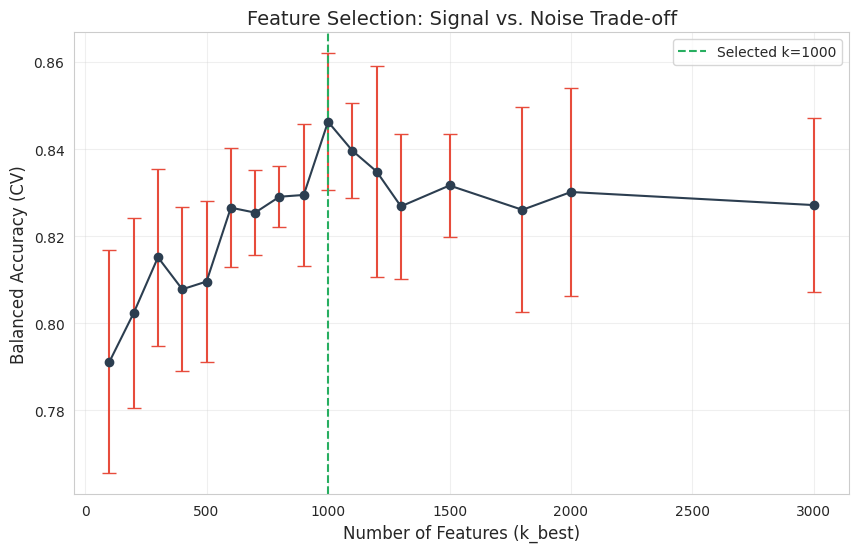

In [ ]:
# --- nombre de traits dessines contre courbe de precision ---
k_values = [100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1500,1800,2000,3000]
mean_scores = []
std_scores = []

for k in k_values:
    pipe = Pipeline([
        ('selector', SelectKBest(f_classif, k=k)),
        ('clf', XGBClassifier(n_estimators=100, max_depth=3, eval_metric='mlogloss', use_label_encoder=False))
    ])

    scores = cross_validate(pipe, X, y_encoded, cv=cv, scoring='balanced_accuracy', n_jobs=-1)
    mean_scores.append(np.mean(scores['test_score']))
    std_scores.append(np.std(scores['test_score']))
    print(f"k={k}: Acc={mean_scores[-1]:.4f}")

plt.figure(figsize=(10, 6))
plt.errorbar(k_values, mean_scores, yerr=std_scores, fmt='-o', capsize=5, color='#2c3e50', ecolor='#e74c3c')
plt.axvline(x=1000, color='#27ae60', linestyle='--', label='Selected k=1000')
plt.title("Feature Selection: Signal vs. Noise Trade-off", fontsize=14)
plt.xlabel("Number of Features (k_best)", fontsize=12)
plt.ylabel("Balanced Accuracy (CV)", fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# ===============================
# Complete Pipeline: scVI + XGBoost + grid search (This will take 40 minutes)
# ===============================

In [ ]:

# --- 1. Imports ---
import numpy as np
import pandas as pd
from scipy import sparse

# sklearn
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import StratifiedKFold, ParameterGrid
from sklearn.metrics import balanced_accuracy_score

# XGBoost
from xgboost import XGBClassifier

# scVI / AnnData
import anndata
from scvi.model import SCVI

# Progress bar
from tqdm import tqdm
import random

# ===============================
# 2. Define Searchable Classifier
# ===============================
class SearchableClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self,
                 k_best=800,
                 n_latent=16,
                 xgb_n_estimators=1000,
                 xgb_max_depth=3,
                 xgb_learning_rate=0.01,
                 xgb_gamma=1.0,
                 xgb_min_child_weight=3,
                 xgb_reg_alpha=1.0,
                 xgb_reg_lambda=2.0
                 ):
        # Save parameters
        self.k_best = k_best
        self.n_latent = n_latent
        self.xgb_n_estimators = xgb_n_estimators
        self.xgb_max_depth = xgb_max_depth
        self.xgb_learning_rate = xgb_learning_rate
        self.xgb_gamma = xgb_gamma
        self.xgb_min_child_weight = xgb_min_child_weight
        self.xgb_reg_alpha = xgb_reg_alpha
        self.xgb_reg_lambda = xgb_reg_lambda

        # Internal state
        self.le = LabelEncoder()
        self.vae = None
        self.xgb_clf = None
        self.selector = None
        self.selected_indices = None

        # Fixed VAE parameters
        self.n_hidden = 64
        self.n_layers = 2
        self.dropout_rate = 0.3
        self.max_epochs = 200  # Can reduce during search

    def fit(self, X, y):
        y_encoded = self.le.fit_transform(y)

        # 1. Feature selection
        if sparse.issparse(X):
            X_dense = X.toarray()
        else:
            X_dense = X
        X_log = np.log1p(X_dense)

        self.selector = SelectKBest(f_classif, k=self.k_best)
        self.selector.fit(X_log, y_encoded)
        mask = self.selector.get_support()
        self.selected_indices = np.where(mask)[0]

        # 2. scVI training
        X_filtered = X[:, self.selected_indices]
        adata = anndata.AnnData(X=X_filtered)
        adata.obs['cell_type'] = y_encoded
        adata.obs['batch'] = 'train_batch'
        SCVI.setup_anndata(adata, batch_key='batch', labels_key='cell_type')

        self.vae = SCVI(
            adata,
            n_layers=self.n_layers,
            n_hidden=self.n_hidden,
            n_latent=self.n_latent,
            dropout_rate=self.dropout_rate
        )

        self.vae.train(
            max_epochs=self.max_epochs,
            early_stopping_patience=10,
            check_val_every_n_epoch=1,
            accelerator='auto',
            devices='auto'
        )

        # 3. XGBoost training
        X_vae = self.vae.get_latent_representation(adata)

        self.xgb_clf = XGBClassifier(
            n_estimators=self.xgb_n_estimators,
            max_depth=self.xgb_max_depth,
            learning_rate=self.xgb_learning_rate,
            gamma=self.xgb_gamma,
            min_child_weight=self.xgb_min_child_weight,
            reg_alpha=self.xgb_reg_alpha,
            reg_lambda=self.xgb_reg_lambda,
            subsample=0.7,
            colsample_bytree=0.5,
            objective='multi:softprob',
            eval_metric='mlogloss',
            use_label_encoder=False,
            n_jobs=-1,
            random_state=42
        )
        self.xgb_clf.fit(X_vae, y_encoded)
        return self

    def predict(self, X):
        proba = self.predict_proba(X)
        return self.le.inverse_transform(np.argmax(proba, axis=1))

    def predict_proba(self, X):
        X_filtered = X[:, self.selected_indices]
        adata = anndata.AnnData(X=X_filtered)
        adata.obs['batch'] = 'train_batch'
        adata.obs['cell_type'] = np.zeros(adata.n_obs, dtype=int)
        X_vae = self.vae.get_latent_representation(adata)
        return self.xgb_clf.predict_proba(X_vae)

# ===============================
# 3. Define Parameter Grid
# ===============================
param_grid = {
    'k_best': [800, 1000],
    'xgb_max_depth': [3, 4],
    'xgb_min_child_weight': [3, 6],
    'xgb_gamma': [1.0, 2.0],
    'xgb_reg_lambda': [2.0, 5.0],
    'xgb_n_estimators': [500, 800,1000],
    'xgb_learning_rate': [0.01, 0.1]
}

# ===============================
# 4. Manual Randomized Search with 20 iterations
# ===============================
grid_results = []

# Generate all combinations
all_combinations = list(ParameterGrid(param_grid))
# Randomly sample 50 combinations (without replacement)
if len(all_combinations) > 20:
    sampled_combinations = random.sample(all_combinations, 20)
else:
    sampled_combinations = all_combinations

print(f"Starting randomized search... total sampled combinations: {len(sampled_combinations)}")


for params in tqdm(sampled_combinations, desc="Randomized Search"):
    clf = SearchableClassifier(**params)

    # 3-fold stratified CV
    scores = []
    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    for train_idx, test_idx in skf.split(X, y):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        score = balanced_accuracy_score(y_test, y_pred)
        scores.append(score)

    mean_score = np.mean(scores)
    std_score = np.std(scores)

    grid_results.append({
        'params': params,
        'mean_test_score': mean_score,
        'std_test_score': std_score
    })

# ===============================
# 5. Output Results
# ===============================
results_df = pd.DataFrame(grid_results)
results_df = results_df.sort_values('mean_test_score', ascending=False)

print("\nTop 5 parameter combinations:")
print(results_df.head(5))


Starting randomized search... total sampled combinations: 50
Note: scVI training may be slow (~15-30 min per combination)



Randomized Search:   0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    92   103   109   110   115   231   237   260   266   304   318
   491   521   526   537   543   545   578   579   745   758   855   856
   883   884   896   960  1051  1095  1169  1186  1252  1274  1462  1496
  1506  1522  1546  1573  1641  1656  1683  1691  1740  1752  1884  1885
  1963  1988  2127  2146  2152  2281  2335  2385  2392  2393  2493  2498
  2501  2540  2542  2608  2674  2716  2725  2753  2769  2779  2796  2804
  2806  2810  2811  2813  2814  2842  2905  2942  3032  3215  3221  3288
  3475  3528  3548  3947  3971  3981  4000  4014  4029  4088  4109  4214
  4216  4231  4234  4264  4327  4336  4346  4363  4472  4517  4532  4533
  4593  4653  4663  4677  4735  4739  4812  4823  4848  4906  5027  5031
  5035  5325  5369  5379  5525  5547  5558  5594  5654  5685  5706  5759
  5774  5775  5830  5

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:00:56] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    34    92   101   103   109   110   115   147   217   219   233
   235   237   239   260   318   491   521   543   579   645   758   851
   855   883   960  1012  1051  1059  1095  1188  1252  1274  1462  1496
  1498  1546  1547  1617  1650  1668  1691  1722  1740  1867  1884  1899
  1963  1967  1986  1988  2127  2152  2281  2321  2385  2393  2396  2493
  2497  2501  2528  2530  2542  2608  2613  2674  2698  2711  2725  2779
  2796  2804  2806  2810  2811  2812  2814  2816  2842  2905  2949  2958
  3032  3064  3149  3215  3223  3309  3333  3378  3493  3528  3947  3971
  3981  4000  4023  4053  4109  4216  4231  4336  4338  4346  4363  4384
  4407  4472  4532  4541  4663  4674  4677  4678  4739  4823  4850  4865
  4905  4906  4924  5027  5031  5104  5222  5228  5292  5318  5322  5325
  5379  5547  5558  5594  5706  5824  5830  5833  5836  5841  5846  5855
  5976

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:01:12] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    77    92   103   109   110   115   229   237   260   262   264
   318   491   521   543   579   655   758   790   855   883   895   960
  1051  1095  1244  1246  1252  1274  1421  1440  1462  1496  1546  1633
  1637  1691  1723  1728  1740  1745  1880  1883  1884  1901  1963  1964
  1971  1985  1988  2081  2127  2129  2141  2152  2281  2309  2345  2385
  2390  2391  2393  2493  2501  2531  2542  2608  2671  2673  2674  2725
  2757  2779  2785  2796  2804  2806  2810  2811  2814  2842  2905  3032
  3215  3228  3232  3473  3474  3528  3532  3740  3890  3947  3971  3981
  3982  4000  4012  4109  4216  4220  4231  4257  4336  4346  4363  4385
  4472  4532  4592  4663  4677  4696  4699  4731  4739  4823  4842  4858
  4861  4906  4982  5027  5031  5128  5197  5325  5379  5385  5498  5535
  5547  5558  5594  5613  5698  5706  5830  5836  5841  5843  5846  5976
  6003

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:01:29] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             



Randomized Search:   2%|▏         | 1/50 [00:55<45:03, 55.17s/it]/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    92   103   109   110   115   231   237   260   266   304   318
   491   521   526   537   543   545   578   579   745   758   855   856
   883   884   896   960  1051  1095  1169  1186  1252  1274  1462  1496
  1506  1522  1546  1573  1641  1656  1683  1691  1740  1752  1884  1885
  1963  1988  2127  2146  2152  2281  2335  2385  2392  2393  2493  2498
  2501  2540  2542  2608  2674  2716  2725  2753  2769  2779  2796  2804
  2806  2810  2811  2813  2814  2842  2905  2942  3032  3215  3221  3288
  3475  3528  3548  3947  3971  3981  4000  4014  4029  4088  4109  4214
  4216  4231  4234  4264  4327  4336  4346  4363  4472  4517  4532  4533
  4593  4653  4663  4677  4735  4739  4812  4823  4848  4906  5027  5031
  5035  5325  5369  5379  5525  5547  5558  5594  5654  5685  5706  5759
  5774  5775 

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:01:46] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    34    92   101   103   109   110   115   147   217   219   233
   235   237   239   260   318   491   521   543   579   645   758   851
   855   883   960  1012  1051  1059  1095  1188  1252  1274  1462  1496
  1498  1546  1547  1617  1650  1668  1691  1722  1740  1867  1884  1899
  1963  1967  1986  1988  2127  2152  2281  2321  2385  2393  2396  2493
  2497  2501  2528  2530  2542  2608  2613  2674  2698  2711  2725  2779
  2796  2804  2806  2810  2811  2812  2814  2816  2842  2905  2949  2958
  3032  3064  3149  3215  3223  3309  3333  3378  3493  3528  3947  3971
  3981  4000  4023  4053  4109  4216  4231  4336  4338  4346  4363  4384
  4407  4472  4532  4541  4663  4674  4677  4678  4739  4823  4850  4865
  4905  4906  4924  5027  5031  5104  5222  5228  5292  5318  5322  5325
  5379  5547  5558  5594  5706  5824  5830  5833  5836  5841  5846  5855
  5976

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:02:04] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    77    92   103   109   110   115   229   237   260   262   264
   318   491   521   543   579   655   758   790   855   883   895   960
  1051  1095  1244  1246  1252  1274  1421  1440  1462  1496  1546  1633
  1637  1691  1723  1728  1740  1745  1880  1883  1884  1901  1963  1964
  1971  1985  1988  2081  2127  2129  2141  2152  2281  2309  2345  2385
  2390  2391  2393  2493  2501  2531  2542  2608  2671  2673  2674  2725
  2757  2779  2785  2796  2804  2806  2810  2811  2814  2842  2905  3032
  3215  3228  3232  3473  3474  3528  3532  3740  3890  3947  3971  3981
  3982  4000  4012  4109  4216  4220  4231  4257  4336  4346  4363  4385
  4472  4532  4592  4663  4677  4696  4699  4731  4739  4823  4842  4858
  4861  4906  4982  5027  5031  5128  5197  5325  5379  5385  5498  5535
  5547  5558  5594  5613  5698  5706  5830  5836  5841  5843  5846  5976
  6003

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:02:20] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             



Randomized Search:   4%|▍         | 2/50 [01:46<42:24, 53.02s/it]/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    92   103   109   110   115   231   237   260   266   304   318
   491   521   526   537   543   545   578   579   745   758   855   856
   883   884   896   960  1051  1095  1169  1186  1252  1274  1462  1496
  1506  1522  1546  1573  1641  1656  1683  1691  1740  1752  1884  1885
  1963  1988  2127  2146  2152  2281  2335  2385  2392  2393  2493  2498
  2501  2540  2542  2608  2674  2716  2725  2753  2769  2779  2796  2804
  2806  2810  2811  2813  2814  2842  2905  2942  3032  3215  3221  3288
  3475  3528  3548  3947  3971  3981  4000  4014  4029  4088  4109  4214
  4216  4231  4234  4264  4327  4336  4346  4363  4472  4517  4532  4533
  4593  4653  4663  4677  4735  4739  4812  4823  4848  4906  5027  5031
  5035  5325  5369  5379  5525  5547  5558  5594  5654  5685  5706  5759
  5774  5775 

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:02:37] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    34    92   101   103   109   110   115   147   217   219   233
   235   237   239   260   318   491   521   543   579   645   758   851
   855   883   960  1012  1051  1059  1095  1188  1252  1274  1462  1496
  1498  1546  1547  1617  1650  1668  1691  1722  1740  1867  1884  1899
  1963  1967  1986  1988  2127  2152  2281  2321  2385  2393  2396  2493
  2497  2501  2528  2530  2542  2608  2613  2674  2698  2711  2725  2779
  2796  2804  2806  2810  2811  2812  2814  2816  2842  2905  2949  2958
  3032  3064  3149  3215  3223  3309  3333  3378  3493  3528  3947  3971
  3981  4000  4023  4053  4109  4216  4231  4336  4338  4346  4363  4384
  4407  4472  4532  4541  4663  4674  4677  4678  4739  4823  4850  4865
  4905  4906  4924  5027  5031  5104  5222  5228  5292  5318  5322  5325
  5379  5547  5558  5594  5706  5824  5830  5833  5836  5841  5846  5855
  5976

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:02:55] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    77    92   103   109   110   115   229   237   260   262   264
   318   491   521   543   579   655   758   790   855   883   895   960
  1051  1095  1244  1246  1252  1274  1421  1440  1462  1496  1546  1633
  1637  1691  1723  1728  1740  1745  1880  1883  1884  1901  1963  1964
  1971  1985  1988  2081  2127  2129  2141  2152  2281  2309  2345  2385
  2390  2391  2393  2493  2501  2531  2542  2608  2671  2673  2674  2725
  2757  2779  2785  2796  2804  2806  2810  2811  2814  2842  2905  3032
  3215  3228  3232  3473  3474  3528  3532  3740  3890  3947  3971  3981
  3982  4000  4012  4109  4216  4220  4231  4257  4336  4346  4363  4385
  4472  4532  4592  4663  4677  4696  4699  4731  4739  4823  4842  4858
  4861  4906  4982  5027  5031  5128  5197  5325  5379  5385  5498  5535
  5547  5558  5594  5613  5698  5706  5830  5836  5841  5843  5846  5976
  6003

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:03:12] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             



Randomized Search:   6%|▌         | 3/50 [02:38<41:04, 52.44s/it]/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    92   103   109   110   115   231   237   260   266   304   318
   491   521   526   537   543   545   578   579   745   758   855   856
   883   884   896   960  1051  1095  1169  1186  1252  1274  1462  1496
  1506  1522  1546  1573  1641  1656  1683  1691  1740  1752  1884  1885
  1963  1988  2127  2146  2152  2281  2335  2385  2392  2393  2493  2498
  2501  2540  2542  2608  2674  2716  2725  2753  2769  2779  2796  2804
  2806  2810  2811  2813  2814  2842  2905  2942  3032  3215  3221  3288
  3475  3528  3548  3947  3971  3981  4000  4014  4029  4088  4109  4214
  4216  4231  4234  4264  4327  4336  4346  4363  4472  4517  4532  4533
  4593  4653  4663  4677  4735  4739  4812  4823  4848  4906  5027  5031
  5035  5325  5369  5379  5525  5547  5558  5594  5654  5685  5706  5759
  5774  5775 

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:03:29] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    34    92   101   103   109   110   115   147   217   219   233
   235   237   239   260   318   491   521   543   579   645   758   851
   855   883   960  1012  1051  1059  1095  1188  1252  1274  1462  1496
  1498  1546  1547  1617  1650  1668  1691  1722  1740  1867  1884  1899
  1963  1967  1986  1988  2127  2152  2281  2321  2385  2393  2396  2493
  2497  2501  2528  2530  2542  2608  2613  2674  2698  2711  2725  2779
  2796  2804  2806  2810  2811  2812  2814  2816  2842  2905  2949  2958
  3032  3064  3149  3215  3223  3309  3333  3378  3493  3528  3947  3971
  3981  4000  4023  4053  4109  4216  4231  4336  4338  4346  4363  4384
  4407  4472  4532  4541  4663  4674  4677  4678  4739  4823  4850  4865
  4905  4906  4924  5027  5031  5104  5222  5228  5292  5318  5322  5325
  5379  5547  5558  5594  5706  5824  5830  5833  5836  5841  5846  5855
  5976

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:03:46] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    77    92   103   109   110   115   229   237   260   262   264
   318   491   521   543   579   655   758   790   855   883   895   960
  1051  1095  1244  1246  1252  1274  1421  1440  1462  1496  1546  1633
  1637  1691  1723  1728  1740  1745  1880  1883  1884  1901  1963  1964
  1971  1985  1988  2081  2127  2129  2141  2152  2281  2309  2345  2385
  2390  2391  2393  2493  2501  2531  2542  2608  2671  2673  2674  2725
  2757  2779  2785  2796  2804  2806  2810  2811  2814  2842  2905  3032
  3215  3228  3232  3473  3474  3528  3532  3740  3890  3947  3971  3981
  3982  4000  4012  4109  4216  4220  4231  4257  4336  4346  4363  4385
  4472  4532  4592  4663  4677  4696  4699  4731  4739  4823  4842  4858
  4861  4906  4982  5027  5031  5128  5197  5325  5379  5385  5498  5535
  5547  5558  5594  5613  5698  5706  5830  5836  5841  5843  5846  5976
  6003

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:04:05] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             



Randomized Search:   8%|▊         | 4/50 [03:31<40:23, 52.69s/it]/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    92   103   109   110   115   231   237   260   266   304   318
   491   521   526   537   543   545   578   579   745   758   855   856
   883   884   896   960  1051  1095  1169  1186  1252  1274  1462  1496
  1506  1522  1546  1573  1641  1656  1683  1691  1740  1752  1884  1885
  1963  1988  2127  2146  2152  2281  2335  2385  2392  2393  2493  2498
  2501  2540  2542  2608  2674  2716  2725  2753  2769  2779  2796  2804
  2806  2810  2811  2813  2814  2842  2905  2942  3032  3215  3221  3288
  3475  3528  3548  3947  3971  3981  4000  4014  4029  4088  4109  4214
  4216  4231  4234  4264  4327  4336  4346  4363  4472  4517  4532  4533
  4593  4653  4663  4677  4735  4739  4812  4823  4848  4906  5027  5031
  5035  5325  5369  5379  5525  5547  5558  5594  5654  5685  5706  5759
  5774  5775 

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:04:22] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    34    92   101   103   109   110   115   147   217   219   233
   235   237   239   260   318   491   521   543   579   645   758   851
   855   883   960  1012  1051  1059  1095  1188  1252  1274  1462  1496
  1498  1546  1547  1617  1650  1668  1691  1722  1740  1867  1884  1899
  1963  1967  1986  1988  2127  2152  2281  2321  2385  2393  2396  2493
  2497  2501  2528  2530  2542  2608  2613  2674  2698  2711  2725  2779
  2796  2804  2806  2810  2811  2812  2814  2816  2842  2905  2949  2958
  3032  3064  3149  3215  3223  3309  3333  3378  3493  3528  3947  3971
  3981  4000  4023  4053  4109  4216  4231  4336  4338  4346  4363  4384
  4407  4472  4532  4541  4663  4674  4677  4678  4739  4823  4850  4865
  4905  4906  4924  5027  5031  5104  5222  5228  5292  5318  5322  5325
  5379  5547  5558  5594  5706  5824  5830  5833  5836  5841  5846  5855
  5976

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:04:39] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    77    92   103   109   110   115   229   237   260   262   264
   318   491   521   543   579   655   758   790   855   883   895   960
  1051  1095  1244  1246  1252  1274  1421  1440  1462  1496  1546  1633
  1637  1691  1723  1728  1740  1745  1880  1883  1884  1901  1963  1964
  1971  1985  1988  2081  2127  2129  2141  2152  2281  2309  2345  2385
  2390  2391  2393  2493  2501  2531  2542  2608  2671  2673  2674  2725
  2757  2779  2785  2796  2804  2806  2810  2811  2814  2842  2905  3032
  3215  3228  3232  3473  3474  3528  3532  3740  3890  3947  3971  3981
  3982  4000  4012  4109  4216  4220  4231  4257  4336  4346  4363  4385
  4472  4532  4592  4663  4677  4696  4699  4731  4739  4823  4842  4858
  4861  4906  4982  5027  5031  5128  5197  5325  5379  5385  5498  5535
  5547  5558  5594  5613  5698  5706  5830  5836  5841  5843  5846  5976
  6003

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:04:58] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             



Randomized Search:  10%|█         | 5/50 [04:24<39:29, 52.66s/it]/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    92   103   109   110   115   231   237   260   266   304   318
   491   521   526   537   543   545   578   579   745   758   855   856
   883   884   896   960  1051  1095  1169  1186  1252  1274  1462  1496
  1506  1522  1546  1573  1641  1656  1683  1691  1740  1752  1884  1885
  1963  1988  2127  2146  2152  2281  2335  2385  2392  2393  2493  2498
  2501  2540  2542  2608  2674  2716  2725  2753  2769  2779  2796  2804
  2806  2810  2811  2813  2814  2842  2905  2942  3032  3215  3221  3288
  3475  3528  3548  3947  3971  3981  4000  4014  4029  4088  4109  4214
  4216  4231  4234  4264  4327  4336  4346  4363  4472  4517  4532  4533
  4593  4653  4663  4677  4735  4739  4812  4823  4848  4906  5027  5031
  5035  5325  5369  5379  5525  5547  5558  5594  5654  5685  5706  5759
  5774  5775 

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:05:15] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    34    92   101   103   109   110   115   147   217   219   233
   235   237   239   260   318   491   521   543   579   645   758   851
   855   883   960  1012  1051  1059  1095  1188  1252  1274  1462  1496
  1498  1546  1547  1617  1650  1668  1691  1722  1740  1867  1884  1899
  1963  1967  1986  1988  2127  2152  2281  2321  2385  2393  2396  2493
  2497  2501  2528  2530  2542  2608  2613  2674  2698  2711  2725  2779
  2796  2804  2806  2810  2811  2812  2814  2816  2842  2905  2949  2958
  3032  3064  3149  3215  3223  3309  3333  3378  3493  3528  3947  3971
  3981  4000  4023  4053  4109  4216  4231  4336  4338  4346  4363  4384
  4407  4472  4532  4541  4663  4674  4677  4678  4739  4823  4850  4865
  4905  4906  4924  5027  5031  5104  5222  5228  5292  5318  5322  5325
  5379  5547  5558  5594  5706  5824  5830  5833  5836  5841  5846  5855
  5976

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:05:33] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    77    92   103   109   110   115   229   237   260   262   264
   318   491   521   543   579   655   758   790   855   883   895   960
  1051  1095  1244  1246  1252  1274  1421  1440  1462  1496  1546  1633
  1637  1691  1723  1728  1740  1745  1880  1883  1884  1901  1963  1964
  1971  1985  1988  2081  2127  2129  2141  2152  2281  2309  2345  2385
  2390  2391  2393  2493  2501  2531  2542  2608  2671  2673  2674  2725
  2757  2779  2785  2796  2804  2806  2810  2811  2814  2842  2905  3032
  3215  3228  3232  3473  3474  3528  3532  3740  3890  3947  3971  3981
  3982  4000  4012  4109  4216  4220  4231  4257  4336  4346  4363  4385
  4472  4532  4592  4663  4677  4696  4699  4731  4739  4823  4842  4858
  4861  4906  4982  5027  5031  5128  5197  5325  5379  5385  5498  5535
  5547  5558  5594  5613  5698  5706  5830  5836  5841  5843  5846  5976
  6003

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:05:52] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             



Randomized Search:  12%|█▏        | 6/50 [05:18<38:59, 53.18s/it]/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    92   103   109   110   115   231   237   260   266   304   318
   491   521   526   537   543   545   578   579   745   758   855   856
   883   884   896   960  1051  1095  1169  1186  1252  1274  1462  1496
  1506  1522  1546  1573  1641  1656  1683  1691  1740  1752  1884  1885
  1963  1988  2127  2146  2152  2281  2335  2385  2392  2393  2493  2498
  2501  2540  2542  2608  2674  2716  2725  2753  2769  2779  2796  2804
  2806  2810  2811  2813  2814  2842  2905  2942  3032  3215  3221  3288
  3475  3528  3548  3947  3971  3981  4000  4014  4029  4088  4109  4214
  4216  4231  4234  4264  4327  4336  4346  4363  4472  4517  4532  4533
  4593  4653  4663  4677  4735  4739  4812  4823  4848  4906  5027  5031
  5035  5325  5369  5379  5525  5547  5558  5594  5654  5685  5706  5759
  5774  5775 

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:06:10] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    34    92   101   103   109   110   115   147   217   219   233
   235   237   239   260   318   491   521   543   579   645   758   851
   855   883   960  1012  1051  1059  1095  1188  1252  1274  1462  1496
  1498  1546  1547  1617  1650  1668  1691  1722  1740  1867  1884  1899
  1963  1967  1986  1988  2127  2152  2281  2321  2385  2393  2396  2493
  2497  2501  2528  2530  2542  2608  2613  2674  2698  2711  2725  2779
  2796  2804  2806  2810  2811  2812  2814  2816  2842  2905  2949  2958
  3032  3064  3149  3215  3223  3309  3333  3378  3493  3528  3947  3971
  3981  4000  4023  4053  4109  4216  4231  4336  4338  4346  4363  4384
  4407  4472  4532  4541  4663  4674  4677  4678  4739  4823  4850  4865
  4905  4906  4924  5027  5031  5104  5222  5228  5292  5318  5322  5325
  5379  5547  5558  5594  5706  5824  5830  5833  5836  5841  5846  5855
  5976

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:06:28] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    77    92   103   109   110   115   229   237   260   262   264
   318   491   521   543   579   655   758   790   855   883   895   960
  1051  1095  1244  1246  1252  1274  1421  1440  1462  1496  1546  1633
  1637  1691  1723  1728  1740  1745  1880  1883  1884  1901  1963  1964
  1971  1985  1988  2081  2127  2129  2141  2152  2281  2309  2345  2385
  2390  2391  2393  2493  2501  2531  2542  2608  2671  2673  2674  2725
  2757  2779  2785  2796  2804  2806  2810  2811  2814  2842  2905  3032
  3215  3228  3232  3473  3474  3528  3532  3740  3890  3947  3971  3981
  3982  4000  4012  4109  4216  4220  4231  4257  4336  4346  4363  4385
  4472  4532  4592  4663  4677  4696  4699  4731  4739  4823  4842  4858
  4861  4906  4982  5027  5031  5128  5197  5325  5379  5385  5498  5535
  5547  5558  5594  5613  5698  5706  5830  5836  5841  5843  5846  5976
  6003

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:06:48] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             



Randomized Search:  14%|█▍        | 7/50 [06:14<38:49, 54.17s/it]/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    92   103   109   110   115   231   237   260   266   304   318
   491   521   526   537   543   545   578   579   745   758   855   856
   883   884   896   960  1051  1095  1169  1186  1252  1274  1462  1496
  1506  1522  1546  1573  1641  1656  1683  1691  1740  1752  1884  1885
  1963  1988  2127  2146  2152  2281  2335  2385  2392  2393  2493  2498
  2501  2540  2542  2608  2674  2716  2725  2753  2769  2779  2796  2804
  2806  2810  2811  2813  2814  2842  2905  2942  3032  3215  3221  3288
  3475  3528  3548  3947  3971  3981  4000  4014  4029  4088  4109  4214
  4216  4231  4234  4264  4327  4336  4346  4363  4472  4517  4532  4533
  4593  4653  4663  4677  4735  4739  4812  4823  4848  4906  5027  5031
  5035  5325  5369  5379  5525  5547  5558  5594  5654  5685  5706  5759
  5774  5775 

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:07:05] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    34    92   101   103   109   110   115   147   217   219   233
   235   237   239   260   318   491   521   543   579   645   758   851
   855   883   960  1012  1051  1059  1095  1188  1252  1274  1462  1496
  1498  1546  1547  1617  1650  1668  1691  1722  1740  1867  1884  1899
  1963  1967  1986  1988  2127  2152  2281  2321  2385  2393  2396  2493
  2497  2501  2528  2530  2542  2608  2613  2674  2698  2711  2725  2779
  2796  2804  2806  2810  2811  2812  2814  2816  2842  2905  2949  2958
  3032  3064  3149  3215  3223  3309  3333  3378  3493  3528  3947  3971
  3981  4000  4023  4053  4109  4216  4231  4336  4338  4346  4363  4384
  4407  4472  4532  4541  4663  4674  4677  4678  4739  4823  4850  4865
  4905  4906  4924  5027  5031  5104  5222  5228  5292  5318  5322  5325
  5379  5547  5558  5594  5706  5824  5830  5833  5836  5841  5846  5855
  5976

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:07:23] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    77    92   103   109   110   115   229   237   260   262   264
   318   491   521   543   579   655   758   790   855   883   895   960
  1051  1095  1244  1246  1252  1274  1421  1440  1462  1496  1546  1633
  1637  1691  1723  1728  1740  1745  1880  1883  1884  1901  1963  1964
  1971  1985  1988  2081  2127  2129  2141  2152  2281  2309  2345  2385
  2390  2391  2393  2493  2501  2531  2542  2608  2671  2673  2674  2725
  2757  2779  2785  2796  2804  2806  2810  2811  2814  2842  2905  3032
  3215  3228  3232  3473  3474  3528  3532  3740  3890  3947  3971  3981
  3982  4000  4012  4109  4216  4220  4231  4257  4336  4346  4363  4385
  4472  4532  4592  4663  4677  4696  4699  4731  4739  4823  4842  4858
  4861  4906  4982  5027  5031  5128  5197  5325  5379  5385  5498  5535
  5547  5558  5594  5613  5698  5706  5830  5836  5841  5843  5846  5976
  6003

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:07:43] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             



Randomized Search:  16%|█▌        | 8/50 [07:09<38:09, 54.52s/it]/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    92   103   109   110   115   231   237   260   266   304   318
   491   521   526   537   543   545   578   579   745   758   855   856
   883   884   896   960  1051  1095  1169  1186  1252  1274  1462  1496
  1506  1522  1546  1573  1641  1656  1683  1691  1740  1752  1884  1885
  1963  1988  2127  2146  2152  2281  2335  2385  2392  2393  2493  2498
  2501  2540  2542  2608  2674  2716  2725  2753  2769  2779  2796  2804
  2806  2810  2811  2813  2814  2842  2905  2942  3032  3215  3221  3288
  3475  3528  3548  3947  3971  3981  4000  4014  4029  4088  4109  4214
  4216  4231  4234  4264  4327  4336  4346  4363  4472  4517  4532  4533
  4593  4653  4663  4677  4735  4739  4812  4823  4848  4906  5027  5031
  5035  5325  5369  5379  5525  5547  5558  5594  5654  5685  5706  5759
  5774  5775 

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:08:01] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    34    92   101   103   109   110   115   147   217   219   233
   235   237   239   260   318   491   521   543   579   645   758   851
   855   883   960  1012  1051  1059  1095  1188  1252  1274  1462  1496
  1498  1546  1547  1617  1650  1668  1691  1722  1740  1867  1884  1899
  1963  1967  1986  1988  2127  2152  2281  2321  2385  2393  2396  2493
  2497  2501  2528  2530  2542  2608  2613  2674  2698  2711  2725  2779
  2796  2804  2806  2810  2811  2812  2814  2816  2842  2905  2949  2958
  3032  3064  3149  3215  3223  3309  3333  3378  3493  3528  3947  3971
  3981  4000  4023  4053  4109  4216  4231  4336  4338  4346  4363  4384
  4407  4472  4532  4541  4663  4674  4677  4678  4739  4823  4850  4865
  4905  4906  4924  5027  5031  5104  5222  5228  5292  5318  5322  5325
  5379  5547  5558  5594  5706  5824  5830  5833  5836  5841  5846  5855
  5976

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:08:19] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    77    92   103   109   110   115   229   237   260   262   264
   318   491   521   543   579   655   758   790   855   883   895   960
  1051  1095  1244  1246  1252  1274  1421  1440  1462  1496  1546  1633
  1637  1691  1723  1728  1740  1745  1880  1883  1884  1901  1963  1964
  1971  1985  1988  2081  2127  2129  2141  2152  2281  2309  2345  2385
  2390  2391  2393  2493  2501  2531  2542  2608  2671  2673  2674  2725
  2757  2779  2785  2796  2804  2806  2810  2811  2814  2842  2905  3032
  3215  3228  3232  3473  3474  3528  3532  3740  3890  3947  3971  3981
  3982  4000  4012  4109  4216  4220  4231  4257  4336  4346  4363  4385
  4472  4532  4592  4663  4677  4696  4699  4731  4739  4823  4842  4858
  4861  4906  4982  5027  5031  5128  5197  5325  5379  5385  5498  5535
  5547  5558  5594  5613  5698  5706  5830  5836  5841  5843  5846  5976
  6003

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:08:38] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             



Randomized Search:  18%|█▊        | 9/50 [08:04<37:23, 54.72s/it]/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    92   103   109   110   115   231   237   260   266   304   318
   491   521   526   537   543   545   578   579   745   758   855   856
   883   884   896   960  1051  1095  1169  1186  1252  1274  1462  1496
  1506  1522  1546  1573  1641  1656  1683  1691  1740  1752  1884  1885
  1963  1988  2127  2146  2152  2281  2335  2385  2392  2393  2493  2498
  2501  2540  2542  2608  2674  2716  2725  2753  2769  2779  2796  2804
  2806  2810  2811  2813  2814  2842  2905  2942  3032  3215  3221  3288
  3475  3528  3548  3947  3971  3981  4000  4014  4029  4088  4109  4214
  4216  4231  4234  4264  4327  4336  4346  4363  4472  4517  4532  4533
  4593  4653  4663  4677  4735  4739  4812  4823  4848  4906  5027  5031
  5035  5325  5369  5379  5525  5547  5558  5594  5654  5685  5706  5759
  5774  5775 

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:08:56] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    34    92   101   103   109   110   115   147   217   219   233
   235   237   239   260   318   491   521   543   579   645   758   851
   855   883   960  1012  1051  1059  1095  1188  1252  1274  1462  1496
  1498  1546  1547  1617  1650  1668  1691  1722  1740  1867  1884  1899
  1963  1967  1986  1988  2127  2152  2281  2321  2385  2393  2396  2493
  2497  2501  2528  2530  2542  2608  2613  2674  2698  2711  2725  2779
  2796  2804  2806  2810  2811  2812  2814  2816  2842  2905  2949  2958
  3032  3064  3149  3215  3223  3309  3333  3378  3493  3528  3947  3971
  3981  4000  4023  4053  4109  4216  4231  4336  4338  4346  4363  4384
  4407  4472  4532  4541  4663  4674  4677  4678  4739  4823  4850  4865
  4905  4906  4924  5027  5031  5104  5222  5228  5292  5318  5322  5325
  5379  5547  5558  5594  5706  5824  5830  5833  5836  5841  5846  5855
  5976

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:09:13] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    77    92   103   109   110   115   229   237   260   262   264
   318   491   521   543   579   655   758   790   855   883   895   960
  1051  1095  1244  1246  1252  1274  1421  1440  1462  1496  1546  1633
  1637  1691  1723  1728  1740  1745  1880  1883  1884  1901  1963  1964
  1971  1985  1988  2081  2127  2129  2141  2152  2281  2309  2345  2385
  2390  2391  2393  2493  2501  2531  2542  2608  2671  2673  2674  2725
  2757  2779  2785  2796  2804  2806  2810  2811  2814  2842  2905  3032
  3215  3228  3232  3473  3474  3528  3532  3740  3890  3947  3971  3981
  3982  4000  4012  4109  4216  4220  4231  4257  4336  4346  4363  4385
  4472  4532  4592  4663  4677  4696  4699  4731  4739  4823  4842  4858
  4861  4906  4982  5027  5031  5128  5197  5325  5379  5385  5498  5535
  5547  5558  5594  5613  5698  5706  5830  5836  5841  5843  5846  5976
  6003

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:09:33] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             



Randomized Search:  20%|██        | 10/50 [08:59<36:23, 54.60s/it]/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    92   103   109   110   115   231   237   260   266   304   318
   491   521   526   537   543   545   578   579   745   758   855   856
   883   884   896   960  1051  1095  1169  1186  1252  1274  1462  1496
  1506  1522  1546  1573  1641  1656  1683  1691  1740  1752  1884  1885
  1963  1988  2127  2146  2152  2281  2335  2385  2392  2393  2493  2498
  2501  2540  2542  2608  2674  2716  2725  2753  2769  2779  2796  2804
  2806  2810  2811  2813  2814  2842  2905  2942  3032  3215  3221  3288
  3475  3528  3548  3947  3971  3981  4000  4014  4029  4088  4109  4214
  4216  4231  4234  4264  4327  4336  4346  4363  4472  4517  4532  4533
  4593  4653  4663  4677  4735  4739  4812  4823  4848  4906  5027  5031
  5035  5325  5369  5379  5525  5547  5558  5594  5654  5685  5706  5759
  5774  5775

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:09:50] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    34    92   101   103   109   110   115   147   217   219   233
   235   237   239   260   318   491   521   543   579   645   758   851
   855   883   960  1012  1051  1059  1095  1188  1252  1274  1462  1496
  1498  1546  1547  1617  1650  1668  1691  1722  1740  1867  1884  1899
  1963  1967  1986  1988  2127  2152  2281  2321  2385  2393  2396  2493
  2497  2501  2528  2530  2542  2608  2613  2674  2698  2711  2725  2779
  2796  2804  2806  2810  2811  2812  2814  2816  2842  2905  2949  2958
  3032  3064  3149  3215  3223  3309  3333  3378  3493  3528  3947  3971
  3981  4000  4023  4053  4109  4216  4231  4336  4338  4346  4363  4384
  4407  4472  4532  4541  4663  4674  4677  4678  4739  4823  4850  4865
  4905  4906  4924  5027  5031  5104  5222  5228  5292  5318  5322  5325
  5379  5547  5558  5594  5706  5824  5830  5833  5836  5841  5846  5855
  5976

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:10:08] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    77    92   103   109   110   115   229   237   260   262   264
   318   491   521   543   579   655   758   790   855   883   895   960
  1051  1095  1244  1246  1252  1274  1421  1440  1462  1496  1546  1633
  1637  1691  1723  1728  1740  1745  1880  1883  1884  1901  1963  1964
  1971  1985  1988  2081  2127  2129  2141  2152  2281  2309  2345  2385
  2390  2391  2393  2493  2501  2531  2542  2608  2671  2673  2674  2725
  2757  2779  2785  2796  2804  2806  2810  2811  2814  2842  2905  3032
  3215  3228  3232  3473  3474  3528  3532  3740  3890  3947  3971  3981
  3982  4000  4012  4109  4216  4220  4231  4257  4336  4346  4363  4385
  4472  4532  4592  4663  4677  4696  4699  4731  4739  4823  4842  4858
  4861  4906  4982  5027  5031  5128  5197  5325  5379  5385  5498  5535
  5547  5558  5594  5613  5698  5706  5830  5836  5841  5843  5846  5976
  6003

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:10:26] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             



Randomized Search:  22%|██▏       | 11/50 [09:52<35:16, 54.27s/it]/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    92   103   109   110   115   231   237   260   266   304   318
   491   521   526   537   543   545   578   579   745   758   855   856
   883   884   896   960  1051  1095  1169  1186  1252  1274  1462  1496
  1506  1522  1546  1573  1641  1656  1683  1691  1740  1752  1884  1885
  1963  1988  2127  2146  2152  2281  2335  2385  2392  2393  2493  2498
  2501  2540  2542  2608  2674  2716  2725  2753  2769  2779  2796  2804
  2806  2810  2811  2813  2814  2842  2905  2942  3032  3215  3221  3288
  3475  3528  3548  3947  3971  3981  4000  4014  4029  4088  4109  4214
  4216  4231  4234  4264  4327  4336  4346  4363  4472  4517  4532  4533
  4593  4653  4663  4677  4735  4739  4812  4823  4848  4906  5027  5031
  5035  5325  5369  5379  5525  5547  5558  5594  5654  5685  5706  5759
  5774  5775

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:10:44] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    34    92   101   103   109   110   115   147   217   219   233
   235   237   239   260   318   491   521   543   579   645   758   851
   855   883   960  1012  1051  1059  1095  1188  1252  1274  1462  1496
  1498  1546  1547  1617  1650  1668  1691  1722  1740  1867  1884  1899
  1963  1967  1986  1988  2127  2152  2281  2321  2385  2393  2396  2493
  2497  2501  2528  2530  2542  2608  2613  2674  2698  2711  2725  2779
  2796  2804  2806  2810  2811  2812  2814  2816  2842  2905  2949  2958
  3032  3064  3149  3215  3223  3309  3333  3378  3493  3528  3947  3971
  3981  4000  4023  4053  4109  4216  4231  4336  4338  4346  4363  4384
  4407  4472  4532  4541  4663  4674  4677  4678  4739  4823  4850  4865
  4905  4906  4924  5027  5031  5104  5222  5228  5292  5318  5322  5325
  5379  5547  5558  5594  5706  5824  5830  5833  5836  5841  5846  5855
  5976

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:11:01] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    77    92   103   109   110   115   229   237   260   262   264
   318   491   521   543   579   655   758   790   855   883   895   960
  1051  1095  1244  1246  1252  1274  1421  1440  1462  1496  1546  1633
  1637  1691  1723  1728  1740  1745  1880  1883  1884  1901  1963  1964
  1971  1985  1988  2081  2127  2129  2141  2152  2281  2309  2345  2385
  2390  2391  2393  2493  2501  2531  2542  2608  2671  2673  2674  2725
  2757  2779  2785  2796  2804  2806  2810  2811  2814  2842  2905  3032
  3215  3228  3232  3473  3474  3528  3532  3740  3890  3947  3971  3981
  3982  4000  4012  4109  4216  4220  4231  4257  4336  4346  4363  4385
  4472  4532  4592  4663  4677  4696  4699  4731  4739  4823  4842  4858
  4861  4906  4982  5027  5031  5128  5197  5325  5379  5385  5498  5535
  5547  5558  5594  5613  5698  5706  5830  5836  5841  5843  5846  5976
  6003

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:11:19] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             



Randomized Search:  24%|██▍       | 12/50 [10:46<34:11, 53.98s/it]/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    92   103   109   110   115   231   237   260   266   304   318
   491   521   526   537   543   545   578   579   745   758   855   856
   883   884   896   960  1051  1095  1169  1186  1252  1274  1462  1496
  1506  1522  1546  1573  1641  1656  1683  1691  1740  1752  1884  1885
  1963  1988  2127  2146  2152  2281  2335  2385  2392  2393  2493  2498
  2501  2540  2542  2608  2674  2716  2725  2753  2769  2779  2796  2804
  2806  2810  2811  2813  2814  2842  2905  2942  3032  3215  3221  3288
  3475  3528  3548  3947  3971  3981  4000  4014  4029  4088  4109  4214
  4216  4231  4234  4264  4327  4336  4346  4363  4472  4517  4532  4533
  4593  4653  4663  4677  4735  4739  4812  4823  4848  4906  5027  5031
  5035  5325  5369  5379  5525  5547  5558  5594  5654  5685  5706  5759
  5774  5775

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:11:37] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    34    92   101   103   109   110   115   147   217   219   233
   235   237   239   260   318   491   521   543   579   645   758   851
   855   883   960  1012  1051  1059  1095  1188  1252  1274  1462  1496
  1498  1546  1547  1617  1650  1668  1691  1722  1740  1867  1884  1899
  1963  1967  1986  1988  2127  2152  2281  2321  2385  2393  2396  2493
  2497  2501  2528  2530  2542  2608  2613  2674  2698  2711  2725  2779
  2796  2804  2806  2810  2811  2812  2814  2816  2842  2905  2949  2958
  3032  3064  3149  3215  3223  3309  3333  3378  3493  3528  3947  3971
  3981  4000  4023  4053  4109  4216  4231  4336  4338  4346  4363  4384
  4407  4472  4532  4541  4663  4674  4677  4678  4739  4823  4850  4865
  4905  4906  4924  5027  5031  5104  5222  5228  5292  5318  5322  5325
  5379  5547  5558  5594  5706  5824  5830  5833  5836  5841  5846  5855
  5976

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:11:54] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    77    92   103   109   110   115   229   237   260   262   264
   318   491   521   543   579   655   758   790   855   883   895   960
  1051  1095  1244  1246  1252  1274  1421  1440  1462  1496  1546  1633
  1637  1691  1723  1728  1740  1745  1880  1883  1884  1901  1963  1964
  1971  1985  1988  2081  2127  2129  2141  2152  2281  2309  2345  2385
  2390  2391  2393  2493  2501  2531  2542  2608  2671  2673  2674  2725
  2757  2779  2785  2796  2804  2806  2810  2811  2814  2842  2905  3032
  3215  3228  3232  3473  3474  3528  3532  3740  3890  3947  3971  3981
  3982  4000  4012  4109  4216  4220  4231  4257  4336  4346  4363  4385
  4472  4532  4592  4663  4677  4696  4699  4731  4739  4823  4842  4858
  4861  4906  4982  5027  5031  5128  5197  5325  5379  5385  5498  5535
  5547  5558  5594  5613  5698  5706  5830  5836  5841  5843  5846  5976
  6003

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:12:11] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             



Randomized Search:  26%|██▌       | 13/50 [11:37<32:49, 53.23s/it]/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    92   103   109   110   115   231   237   260   266   304   318
   491   521   526   537   543   545   578   579   745   758   855   856
   883   884   896   960  1051  1095  1169  1186  1252  1274  1462  1496
  1506  1522  1546  1573  1641  1656  1683  1691  1740  1752  1884  1885
  1963  1988  2127  2146  2152  2281  2335  2385  2392  2393  2493  2498
  2501  2540  2542  2608  2674  2716  2725  2753  2769  2779  2796  2804
  2806  2810  2811  2813  2814  2842  2905  2942  3032  3215  3221  3288
  3475  3528  3548  3947  3971  3981  4000  4014  4029  4088  4109  4214
  4216  4231  4234  4264  4327  4336  4346  4363  4472  4517  4532  4533
  4593  4653  4663  4677  4735  4739  4812  4823  4848  4906  5027  5031
  5035  5325  5369  5379  5525  5547  5558  5594  5654  5685  5706  5759
  5774  5775

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:12:30] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    34    92   101   103   109   110   115   147   217   219   233
   235   237   239   260   318   491   521   543   579   645   758   851
   855   883   960  1012  1051  1059  1095  1188  1252  1274  1462  1496
  1498  1546  1547  1617  1650  1668  1691  1722  1740  1867  1884  1899
  1963  1967  1986  1988  2127  2152  2281  2321  2385  2393  2396  2493
  2497  2501  2528  2530  2542  2608  2613  2674  2698  2711  2725  2779
  2796  2804  2806  2810  2811  2812  2814  2816  2842  2905  2949  2958
  3032  3064  3149  3215  3223  3309  3333  3378  3493  3528  3947  3971
  3981  4000  4023  4053  4109  4216  4231  4336  4338  4346  4363  4384
  4407  4472  4532  4541  4663  4674  4677  4678  4739  4823  4850  4865
  4905  4906  4924  5027  5031  5104  5222  5228  5292  5318  5322  5325
  5379  5547  5558  5594  5706  5824  5830  5833  5836  5841  5846  5855
  5976

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:12:48] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    77    92   103   109   110   115   229   237   260   262   264
   318   491   521   543   579   655   758   790   855   883   895   960
  1051  1095  1244  1246  1252  1274  1421  1440  1462  1496  1546  1633
  1637  1691  1723  1728  1740  1745  1880  1883  1884  1901  1963  1964
  1971  1985  1988  2081  2127  2129  2141  2152  2281  2309  2345  2385
  2390  2391  2393  2493  2501  2531  2542  2608  2671  2673  2674  2725
  2757  2779  2785  2796  2804  2806  2810  2811  2814  2842  2905  3032
  3215  3228  3232  3473  3474  3528  3532  3740  3890  3947  3971  3981
  3982  4000  4012  4109  4216  4220  4231  4257  4336  4346  4363  4385
  4472  4532  4592  4663  4677  4696  4699  4731  4739  4823  4842  4858
  4861  4906  4982  5027  5031  5128  5197  5325  5379  5385  5498  5535
  5547  5558  5594  5613  5698  5706  5830  5836  5841  5843  5846  5976
  6003

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:13:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             



Randomized Search:  28%|██▊       | 14/50 [12:32<32:12, 53.69s/it]/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    92   103   109   110   115   231   237   260   266   304   318
   491   521   526   537   543   545   578   579   745   758   855   856
   883   884   896   960  1051  1095  1169  1186  1252  1274  1462  1496
  1506  1522  1546  1573  1641  1656  1683  1691  1740  1752  1884  1885
  1963  1988  2127  2146  2152  2281  2335  2385  2392  2393  2493  2498
  2501  2540  2542  2608  2674  2716  2725  2753  2769  2779  2796  2804
  2806  2810  2811  2813  2814  2842  2905  2942  3032  3215  3221  3288
  3475  3528  3548  3947  3971  3981  4000  4014  4029  4088  4109  4214
  4216  4231  4234  4264  4327  4336  4346  4363  4472  4517  4532  4533
  4593  4653  4663  4677  4735  4739  4812  4823  4848  4906  5027  5031
  5035  5325  5369  5379  5525  5547  5558  5594  5654  5685  5706  5759
  5774  5775

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:13:24] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    34    92   101   103   109   110   115   147   217   219   233
   235   237   239   260   318   491   521   543   579   645   758   851
   855   883   960  1012  1051  1059  1095  1188  1252  1274  1462  1496
  1498  1546  1547  1617  1650  1668  1691  1722  1740  1867  1884  1899
  1963  1967  1986  1988  2127  2152  2281  2321  2385  2393  2396  2493
  2497  2501  2528  2530  2542  2608  2613  2674  2698  2711  2725  2779
  2796  2804  2806  2810  2811  2812  2814  2816  2842  2905  2949  2958
  3032  3064  3149  3215  3223  3309  3333  3378  3493  3528  3947  3971
  3981  4000  4023  4053  4109  4216  4231  4336  4338  4346  4363  4384
  4407  4472  4532  4541  4663  4674  4677  4678  4739  4823  4850  4865
  4905  4906  4924  5027  5031  5104  5222  5228  5292  5318  5322  5325
  5379  5547  5558  5594  5706  5824  5830  5833  5836  5841  5846  5855
  5976

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:13:43] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    77    92   103   109   110   115   229   237   260   262   264
   318   491   521   543   579   655   758   790   855   883   895   960
  1051  1095  1244  1246  1252  1274  1421  1440  1462  1496  1546  1633
  1637  1691  1723  1728  1740  1745  1880  1883  1884  1901  1963  1964
  1971  1985  1988  2081  2127  2129  2141  2152  2281  2309  2345  2385
  2390  2391  2393  2493  2501  2531  2542  2608  2671  2673  2674  2725
  2757  2779  2785  2796  2804  2806  2810  2811  2814  2842  2905  3032
  3215  3228  3232  3473  3474  3528  3532  3740  3890  3947  3971  3981
  3982  4000  4012  4109  4216  4220  4231  4257  4336  4346  4363  4385
  4472  4532  4592  4663  4677  4696  4699  4731  4739  4823  4842  4858
  4861  4906  4982  5027  5031  5128  5197  5325  5379  5385  5498  5535
  5547  5558  5594  5613  5698  5706  5830  5836  5841  5843  5846  5976
  6003

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:14:01] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             



Randomized Search:  30%|███       | 15/50 [13:27<31:31, 54.05s/it]/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    92   103   109   110   115   231   237   260   266   304   318
   491   521   526   537   543   545   578   579   745   758   855   856
   883   884   896   960  1051  1095  1169  1186  1252  1274  1462  1496
  1506  1522  1546  1573  1641  1656  1683  1691  1740  1752  1884  1885
  1963  1988  2127  2146  2152  2281  2335  2385  2392  2393  2493  2498
  2501  2540  2542  2608  2674  2716  2725  2753  2769  2779  2796  2804
  2806  2810  2811  2813  2814  2842  2905  2942  3032  3215  3221  3288
  3475  3528  3548  3947  3971  3981  4000  4014  4029  4088  4109  4214
  4216  4231  4234  4264  4327  4336  4346  4363  4472  4517  4532  4533
  4593  4653  4663  4677  4735  4739  4812  4823  4848  4906  5027  5031
  5035  5325  5369  5379  5525  5547  5558  5594  5654  5685  5706  5759
  5774  5775

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:14:20] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    34    92   101   103   109   110   115   147   217   219   233
   235   237   239   260   318   491   521   543   579   645   758   851
   855   883   960  1012  1051  1059  1095  1188  1252  1274  1462  1496
  1498  1546  1547  1617  1650  1668  1691  1722  1740  1867  1884  1899
  1963  1967  1986  1988  2127  2152  2281  2321  2385  2393  2396  2493
  2497  2501  2528  2530  2542  2608  2613  2674  2698  2711  2725  2779
  2796  2804  2806  2810  2811  2812  2814  2816  2842  2905  2949  2958
  3032  3064  3149  3215  3223  3309  3333  3378  3493  3528  3947  3971
  3981  4000  4023  4053  4109  4216  4231  4336  4338  4346  4363  4384
  4407  4472  4532  4541  4663  4674  4677  4678  4739  4823  4850  4865
  4905  4906  4924  5027  5031  5104  5222  5228  5292  5318  5322  5325
  5379  5547  5558  5594  5706  5824  5830  5833  5836  5841  5846  5855
  5976

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:14:39] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    77    92   103   109   110   115   229   237   260   262   264
   318   491   521   543   579   655   758   790   855   883   895   960
  1051  1095  1244  1246  1252  1274  1421  1440  1462  1496  1546  1633
  1637  1691  1723  1728  1740  1745  1880  1883  1884  1901  1963  1964
  1971  1985  1988  2081  2127  2129  2141  2152  2281  2309  2345  2385
  2390  2391  2393  2493  2501  2531  2542  2608  2671  2673  2674  2725
  2757  2779  2785  2796  2804  2806  2810  2811  2814  2842  2905  3032
  3215  3228  3232  3473  3474  3528  3532  3740  3890  3947  3971  3981
  3982  4000  4012  4109  4216  4220  4231  4257  4336  4346  4363  4385
  4472  4532  4592  4663  4677  4696  4699  4731  4739  4823  4842  4858
  4861  4906  4982  5027  5031  5128  5197  5325  5379  5385  5498  5535
  5547  5558  5594  5613  5698  5706  5830  5836  5841  5843  5846  5976
  6003

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:14:56] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             



Randomized Search:  32%|███▏      | 16/50 [14:22<30:52, 54.48s/it]/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    92   103   109   110   115   231   237   260   266   304   318
   491   521   526   537   543   545   578   579   745   758   855   856
   883   884   896   960  1051  1095  1169  1186  1252  1274  1462  1496
  1506  1522  1546  1573  1641  1656  1683  1691  1740  1752  1884  1885
  1963  1988  2127  2146  2152  2281  2335  2385  2392  2393  2493  2498
  2501  2540  2542  2608  2674  2716  2725  2753  2769  2779  2796  2804
  2806  2810  2811  2813  2814  2842  2905  2942  3032  3215  3221  3288
  3475  3528  3548  3947  3971  3981  4000  4014  4029  4088  4109  4214
  4216  4231  4234  4264  4327  4336  4346  4363  4472  4517  4532  4533
  4593  4653  4663  4677  4735  4739  4812  4823  4848  4906  5027  5031
  5035  5325  5369  5379  5525  5547  5558  5594  5654  5685  5706  5759
  5774  5775

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:15:16] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    34    92   101   103   109   110   115   147   217   219   233
   235   237   239   260   318   491   521   543   579   645   758   851
   855   883   960  1012  1051  1059  1095  1188  1252  1274  1462  1496
  1498  1546  1547  1617  1650  1668  1691  1722  1740  1867  1884  1899
  1963  1967  1986  1988  2127  2152  2281  2321  2385  2393  2396  2493
  2497  2501  2528  2530  2542  2608  2613  2674  2698  2711  2725  2779
  2796  2804  2806  2810  2811  2812  2814  2816  2842  2905  2949  2958
  3032  3064  3149  3215  3223  3309  3333  3378  3493  3528  3947  3971
  3981  4000  4023  4053  4109  4216  4231  4336  4338  4346  4363  4384
  4407  4472  4532  4541  4663  4674  4677  4678  4739  4823  4850  4865
  4905  4906  4924  5027  5031  5104  5222  5228  5292  5318  5322  5325
  5379  5547  5558  5594  5706  5824  5830  5833  5836  5841  5846  5855
  5976

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:15:36] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    77    92   103   109   110   115   229   237   260   262   264
   318   491   521   543   579   655   758   790   855   883   895   960
  1051  1095  1244  1246  1252  1274  1421  1440  1462  1496  1546  1633
  1637  1691  1723  1728  1740  1745  1880  1883  1884  1901  1963  1964
  1971  1985  1988  2081  2127  2129  2141  2152  2281  2309  2345  2385
  2390  2391  2393  2493  2501  2531  2542  2608  2671  2673  2674  2725
  2757  2779  2785  2796  2804  2806  2810  2811  2814  2842  2905  3032
  3215  3228  3232  3473  3474  3528  3532  3740  3890  3947  3971  3981
  3982  4000  4012  4109  4216  4220  4231  4257  4336  4346  4363  4385
  4472  4532  4592  4663  4677  4696  4699  4731  4739  4823  4842  4858
  4861  4906  4982  5027  5031  5128  5197  5325  5379  5385  5498  5535
  5547  5558  5594  5613  5698  5706  5830  5836  5841  5843  5846  5976
  6003

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:15:54] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             



Randomized Search:  34%|███▍      | 17/50 [15:20<30:35, 55.61s/it]/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    92   103   109   110   115   231   237   260   266   304   318
   491   521   526   537   543   545   578   579   745   758   855   856
   883   884   896   960  1051  1095  1169  1186  1252  1274  1462  1496
  1506  1522  1546  1573  1641  1656  1683  1691  1740  1752  1884  1885
  1963  1988  2127  2146  2152  2281  2335  2385  2392  2393  2493  2498
  2501  2540  2542  2608  2674  2716  2725  2753  2769  2779  2796  2804
  2806  2810  2811  2813  2814  2842  2905  2942  3032  3215  3221  3288
  3475  3528  3548  3947  3971  3981  4000  4014  4029  4088  4109  4214
  4216  4231  4234  4264  4327  4336  4346  4363  4472  4517  4532  4533
  4593  4653  4663  4677  4735  4739  4812  4823  4848  4906  5027  5031
  5035  5325  5369  5379  5525  5547  5558  5594  5654  5685  5706  5759
  5774  5775

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:16:14] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    34    92   101   103   109   110   115   147   217   219   233
   235   237   239   260   318   491   521   543   579   645   758   851
   855   883   960  1012  1051  1059  1095  1188  1252  1274  1462  1496
  1498  1546  1547  1617  1650  1668  1691  1722  1740  1867  1884  1899
  1963  1967  1986  1988  2127  2152  2281  2321  2385  2393  2396  2493
  2497  2501  2528  2530  2542  2608  2613  2674  2698  2711  2725  2779
  2796  2804  2806  2810  2811  2812  2814  2816  2842  2905  2949  2958
  3032  3064  3149  3215  3223  3309  3333  3378  3493  3528  3947  3971
  3981  4000  4023  4053  4109  4216  4231  4336  4338  4346  4363  4384
  4407  4472  4532  4541  4663  4674  4677  4678  4739  4823  4850  4865
  4905  4906  4924  5027  5031  5104  5222  5228  5292  5318  5322  5325
  5379  5547  5558  5594  5706  5824  5830  5833  5836  5841  5846  5855
  5976

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:16:32] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    77    92   103   109   110   115   229   237   260   262   264
   318   491   521   543   579   655   758   790   855   883   895   960
  1051  1095  1244  1246  1252  1274  1421  1440  1462  1496  1546  1633
  1637  1691  1723  1728  1740  1745  1880  1883  1884  1901  1963  1964
  1971  1985  1988  2081  2127  2129  2141  2152  2281  2309  2345  2385
  2390  2391  2393  2493  2501  2531  2542  2608  2671  2673  2674  2725
  2757  2779  2785  2796  2804  2806  2810  2811  2814  2842  2905  3032
  3215  3228  3232  3473  3474  3528  3532  3740  3890  3947  3971  3981
  3982  4000  4012  4109  4216  4220  4231  4257  4336  4346  4363  4385
  4472  4532  4592  4663  4677  4696  4699  4731  4739  4823  4842  4858
  4861  4906  4982  5027  5031  5128  5197  5325  5379  5385  5498  5535
  5547  5558  5594  5613  5698  5706  5830  5836  5841  5843  5846  5976
  6003

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:16:50] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             



Randomized Search:  36%|███▌      | 18/50 [16:16<29:41, 55.66s/it]/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    92   103   109   110   115   231   237   260   266   304   318
   491   521   526   537   543   545   578   579   745   758   855   856
   883   884   896   960  1051  1095  1169  1186  1252  1274  1462  1496
  1506  1522  1546  1573  1641  1656  1683  1691  1740  1752  1884  1885
  1963  1988  2127  2146  2152  2281  2335  2385  2392  2393  2493  2498
  2501  2540  2542  2608  2674  2716  2725  2753  2769  2779  2796  2804
  2806  2810  2811  2813  2814  2842  2905  2942  3032  3215  3221  3288
  3475  3528  3548  3947  3971  3981  4000  4014  4029  4088  4109  4214
  4216  4231  4234  4264  4327  4336  4346  4363  4472  4517  4532  4533
  4593  4653  4663  4677  4735  4739  4812  4823  4848  4906  5027  5031
  5035  5325  5369  5379  5525  5547  5558  5594  5654  5685  5706  5759
  5774  5775

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:17:11] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    34    92   101   103   109   110   115   147   217   219   233
   235   237   239   260   318   491   521   543   579   645   758   851
   855   883   960  1012  1051  1059  1095  1188  1252  1274  1462  1496
  1498  1546  1547  1617  1650  1668  1691  1722  1740  1867  1884  1899
  1963  1967  1986  1988  2127  2152  2281  2321  2385  2393  2396  2493
  2497  2501  2528  2530  2542  2608  2613  2674  2698  2711  2725  2779
  2796  2804  2806  2810  2811  2812  2814  2816  2842  2905  2949  2958
  3032  3064  3149  3215  3223  3309  3333  3378  3493  3528  3947  3971
  3981  4000  4023  4053  4109  4216  4231  4336  4338  4346  4363  4384
  4407  4472  4532  4541  4663  4674  4677  4678  4739  4823  4850  4865
  4905  4906  4924  5027  5031  5104  5222  5228  5292  5318  5322  5325
  5379  5547  5558  5594  5706  5824  5830  5833  5836  5841  5846  5855
  5976

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:17:30] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    77    92   103   109   110   115   229   237   260   262   264
   318   491   521   543   579   655   758   790   855   883   895   960
  1051  1095  1244  1246  1252  1274  1421  1440  1462  1496  1546  1633
  1637  1691  1723  1728  1740  1745  1880  1883  1884  1901  1963  1964
  1971  1985  1988  2081  2127  2129  2141  2152  2281  2309  2345  2385
  2390  2391  2393  2493  2501  2531  2542  2608  2671  2673  2674  2725
  2757  2779  2785  2796  2804  2806  2810  2811  2814  2842  2905  3032
  3215  3228  3232  3473  3474  3528  3532  3740  3890  3947  3971  3981
  3982  4000  4012  4109  4216  4220  4231  4257  4336  4346  4363  4385
  4472  4532  4592  4663  4677  4696  4699  4731  4739  4823  4842  4858
  4861  4906  4982  5027  5031  5128  5197  5325  5379  5385  5498  5535
  5547  5558  5594  5613  5698  5706  5830  5836  5841  5843  5846  5976
  6003

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:17:50] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             



Randomized Search:  38%|███▊      | 19/50 [17:18<29:42, 57.48s/it]/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    92   103   109   110   115   231   237   260   266   304   318
   491   521   526   537   543   545   578   579   745   758   855   856
   883   884   896   960  1051  1095  1169  1186  1252  1274  1462  1496
  1506  1522  1546  1573  1641  1656  1683  1691  1740  1752  1884  1885
  1963  1988  2127  2146  2152  2281  2335  2385  2392  2393  2493  2498
  2501  2540  2542  2608  2674  2716  2725  2753  2769  2779  2796  2804
  2806  2810  2811  2813  2814  2842  2905  2942  3032  3215  3221  3288
  3475  3528  3548  3947  3971  3981  4000  4014  4029  4088  4109  4214
  4216  4231  4234  4264  4327  4336  4346  4363  4472  4517  4532  4533
  4593  4653  4663  4677  4735  4739  4812  4823  4848  4906  5027  5031
  5035  5325  5369  5379  5525  5547  5558  5594  5654  5685  5706  5759
  5774  5775

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:18:11] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    34    92   101   103   109   110   115   147   217   219   233
   235   237   239   260   318   491   521   543   579   645   758   851
   855   883   960  1012  1051  1059  1095  1188  1252  1274  1462  1496
  1498  1546  1547  1617  1650  1668  1691  1722  1740  1867  1884  1899
  1963  1967  1986  1988  2127  2152  2281  2321  2385  2393  2396  2493
  2497  2501  2528  2530  2542  2608  2613  2674  2698  2711  2725  2779
  2796  2804  2806  2810  2811  2812  2814  2816  2842  2905  2949  2958
  3032  3064  3149  3215  3223  3309  3333  3378  3493  3528  3947  3971
  3981  4000  4023  4053  4109  4216  4231  4336  4338  4346  4363  4384
  4407  4472  4532  4541  4663  4674  4677  4678  4739  4823  4850  4865
  4905  4906  4924  5027  5031  5104  5222  5228  5292  5318  5322  5325
  5379  5547  5558  5594  5706  5824  5830  5833  5836  5841  5846  5855
  5976

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:18:30] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    77    92   103   109   110   115   229   237   260   262   264
   318   491   521   543   579   655   758   790   855   883   895   960
  1051  1095  1244  1246  1252  1274  1421  1440  1462  1496  1546  1633
  1637  1691  1723  1728  1740  1745  1880  1883  1884  1901  1963  1964
  1971  1985  1988  2081  2127  2129  2141  2152  2281  2309  2345  2385
  2390  2391  2393  2493  2501  2531  2542  2608  2671  2673  2674  2725
  2757  2779  2785  2796  2804  2806  2810  2811  2814  2842  2905  3032
  3215  3228  3232  3473  3474  3528  3532  3740  3890  3947  3971  3981
  3982  4000  4012  4109  4216  4220  4231  4257  4336  4346  4363  4385
  4472  4532  4592  4663  4677  4696  4699  4731  4739  4823  4842  4858
  4861  4906  4982  5027  5031  5128  5197  5325  5379  5385  5498  5535
  5547  5558  5594  5613  5698  5706  5830  5836  5841  5843  5846  5976
  6003

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:18:50] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             



Randomized Search:  40%|████      | 20/50 [18:16<28:51, 57.71s/it]/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    92   103   109   110   115   231   237   260   266   304   318
   491   521   526   537   543   545   578   579   745   758   855   856
   883   884   896   960  1051  1095  1169  1186  1252  1274  1462  1496
  1506  1522  1546  1573  1641  1656  1683  1691  1740  1752  1884  1885
  1963  1988  2127  2146  2152  2281  2335  2385  2392  2393  2493  2498
  2501  2540  2542  2608  2674  2716  2725  2753  2769  2779  2796  2804
  2806  2810  2811  2813  2814  2842  2905  2942  3032  3215  3221  3288
  3475  3528  3548  3947  3971  3981  4000  4014  4029  4088  4109  4214
  4216  4231  4234  4264  4327  4336  4346  4363  4472  4517  4532  4533
  4593  4653  4663  4677  4735  4739  4812  4823  4848  4906  5027  5031
  5035  5325  5369  5379  5525  5547  5558  5594  5654  5685  5706  5759
  5774  5775

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:19:09] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    34    92   101   103   109   110   115   147   217   219   233
   235   237   239   260   318   491   521   543   579   645   758   851
   855   883   960  1012  1051  1059  1095  1188  1252  1274  1462  1496
  1498  1546  1547  1617  1650  1668  1691  1722  1740  1867  1884  1899
  1963  1967  1986  1988  2127  2152  2281  2321  2385  2393  2396  2493
  2497  2501  2528  2530  2542  2608  2613  2674  2698  2711  2725  2779
  2796  2804  2806  2810  2811  2812  2814  2816  2842  2905  2949  2958
  3032  3064  3149  3215  3223  3309  3333  3378  3493  3528  3947  3971
  3981  4000  4023  4053  4109  4216  4231  4336  4338  4346  4363  4384
  4407  4472  4532  4541  4663  4674  4677  4678  4739  4823  4850  4865
  4905  4906  4924  5027  5031  5104  5222  5228  5292  5318  5322  5325
  5379  5547  5558  5594  5706  5824  5830  5833  5836  5841  5846  5855
  5976

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:19:28] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    77    92   103   109   110   115   229   237   260   262   264
   318   491   521   543   579   655   758   790   855   883   895   960
  1051  1095  1244  1246  1252  1274  1421  1440  1462  1496  1546  1633
  1637  1691  1723  1728  1740  1745  1880  1883  1884  1901  1963  1964
  1971  1985  1988  2081  2127  2129  2141  2152  2281  2309  2345  2385
  2390  2391  2393  2493  2501  2531  2542  2608  2671  2673  2674  2725
  2757  2779  2785  2796  2804  2806  2810  2811  2814  2842  2905  3032
  3215  3228  3232  3473  3474  3528  3532  3740  3890  3947  3971  3981
  3982  4000  4012  4109  4216  4220  4231  4257  4336  4346  4363  4385
  4472  4532  4592  4663  4677  4696  4699  4731  4739  4823  4842  4858
  4861  4906  4982  5027  5031  5128  5197  5325  5379  5385  5498  5535
  5547  5558  5594  5613  5698  5706  5830  5836  5841  5843  5846  5976
  6003

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:19:49] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             



Randomized Search:  42%|████▏     | 21/50 [19:15<28:00, 57.95s/it]/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    92   103   109   110   115   231   237   260   266   304   318
   491   521   526   537   543   545   578   579   745   758   855   856
   883   884   896   960  1051  1095  1169  1186  1252  1274  1462  1496
  1506  1522  1546  1573  1641  1656  1683  1691  1740  1752  1884  1885
  1963  1988  2127  2146  2152  2281  2335  2385  2392  2393  2493  2498
  2501  2540  2542  2608  2674  2716  2725  2753  2769  2779  2796  2804
  2806  2810  2811  2813  2814  2842  2905  2942  3032  3215  3221  3288
  3475  3528  3548  3947  3971  3981  4000  4014  4029  4088  4109  4214
  4216  4231  4234  4264  4327  4336  4346  4363  4472  4517  4532  4533
  4593  4653  4663  4677  4735  4739  4812  4823  4848  4906  5027  5031
  5035  5325  5369  5379  5525  5547  5558  5594  5654  5685  5706  5759
  5774  5775

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:20:08] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    34    92   101   103   109   110   115   147   217   219   233
   235   237   239   260   318   491   521   543   579   645   758   851
   855   883   960  1012  1051  1059  1095  1188  1252  1274  1462  1496
  1498  1546  1547  1617  1650  1668  1691  1722  1740  1867  1884  1899
  1963  1967  1986  1988  2127  2152  2281  2321  2385  2393  2396  2493
  2497  2501  2528  2530  2542  2608  2613  2674  2698  2711  2725  2779
  2796  2804  2806  2810  2811  2812  2814  2816  2842  2905  2949  2958
  3032  3064  3149  3215  3223  3309  3333  3378  3493  3528  3947  3971
  3981  4000  4023  4053  4109  4216  4231  4336  4338  4346  4363  4384
  4407  4472  4532  4541  4663  4674  4677  4678  4739  4823  4850  4865
  4905  4906  4924  5027  5031  5104  5222  5228  5292  5318  5322  5325
  5379  5547  5558  5594  5706  5824  5830  5833  5836  5841  5846  5855
  5976

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:20:27] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    77    92   103   109   110   115   229   237   260   262   264
   318   491   521   543   579   655   758   790   855   883   895   960
  1051  1095  1244  1246  1252  1274  1421  1440  1462  1496  1546  1633
  1637  1691  1723  1728  1740  1745  1880  1883  1884  1901  1963  1964
  1971  1985  1988  2081  2127  2129  2141  2152  2281  2309  2345  2385
  2390  2391  2393  2493  2501  2531  2542  2608  2671  2673  2674  2725
  2757  2779  2785  2796  2804  2806  2810  2811  2814  2842  2905  3032
  3215  3228  3232  3473  3474  3528  3532  3740  3890  3947  3971  3981
  3982  4000  4012  4109  4216  4220  4231  4257  4336  4346  4363  4385
  4472  4532  4592  4663  4677  4696  4699  4731  4739  4823  4842  4858
  4861  4906  4982  5027  5031  5128  5197  5325  5379  5385  5498  5535
  5547  5558  5594  5613  5698  5706  5830  5836  5841  5843  5846  5976
  6003

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:20:47] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             



Randomized Search:  44%|████▍     | 22/50 [20:13<27:01, 57.93s/it]/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    92   103   109   110   115   231   237   260   266   304   318
   491   521   526   537   543   545   578   579   745   758   855   856
   883   884   896   960  1051  1095  1169  1186  1252  1274  1462  1496
  1506  1522  1546  1573  1641  1656  1683  1691  1740  1752  1884  1885
  1963  1988  2127  2146  2152  2281  2335  2385  2392  2393  2493  2498
  2501  2540  2542  2608  2674  2716  2725  2753  2769  2779  2796  2804
  2806  2810  2811  2813  2814  2842  2905  2942  3032  3215  3221  3288
  3475  3528  3548  3947  3971  3981  4000  4014  4029  4088  4109  4214
  4216  4231  4234  4264  4327  4336  4346  4363  4472  4517  4532  4533
  4593  4653  4663  4677  4735  4739  4812  4823  4848  4906  5027  5031
  5035  5325  5369  5379  5525  5547  5558  5594  5654  5685  5706  5759
  5774  5775

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:21:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    34    92   101   103   109   110   115   147   217   219   233
   235   237   239   260   318   491   521   543   579   645   758   851
   855   883   960  1012  1051  1059  1095  1188  1252  1274  1462  1496
  1498  1546  1547  1617  1650  1668  1691  1722  1740  1867  1884  1899
  1963  1967  1986  1988  2127  2152  2281  2321  2385  2393  2396  2493
  2497  2501  2528  2530  2542  2608  2613  2674  2698  2711  2725  2779
  2796  2804  2806  2810  2811  2812  2814  2816  2842  2905  2949  2958
  3032  3064  3149  3215  3223  3309  3333  3378  3493  3528  3947  3971
  3981  4000  4023  4053  4109  4216  4231  4336  4338  4346  4363  4384
  4407  4472  4532  4541  4663  4674  4677  4678  4739  4823  4850  4865
  4905  4906  4924  5027  5031  5104  5222  5228  5292  5318  5322  5325
  5379  5547  5558  5594  5706  5824  5830  5833  5836  5841  5846  5855
  5976

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:21:25] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    77    92   103   109   110   115   229   237   260   262   264
   318   491   521   543   579   655   758   790   855   883   895   960
  1051  1095  1244  1246  1252  1274  1421  1440  1462  1496  1546  1633
  1637  1691  1723  1728  1740  1745  1880  1883  1884  1901  1963  1964
  1971  1985  1988  2081  2127  2129  2141  2152  2281  2309  2345  2385
  2390  2391  2393  2493  2501  2531  2542  2608  2671  2673  2674  2725
  2757  2779  2785  2796  2804  2806  2810  2811  2814  2842  2905  3032
  3215  3228  3232  3473  3474  3528  3532  3740  3890  3947  3971  3981
  3982  4000  4012  4109  4216  4220  4231  4257  4336  4346  4363  4385
  4472  4532  4592  4663  4677  4696  4699  4731  4739  4823  4842  4858
  4861  4906  4982  5027  5031  5128  5197  5325  5379  5385  5498  5535
  5547  5558  5594  5613  5698  5706  5830  5836  5841  5843  5846  5976
  6003

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:21:46] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             



Randomized Search:  46%|████▌     | 23/50 [21:12<26:13, 58.28s/it]/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    92   103   109   110   115   231   237   260   266   304   318
   491   521   526   537   543   545   578   579   745   758   855   856
   883   884   896   960  1051  1095  1169  1186  1252  1274  1462  1496
  1506  1522  1546  1573  1641  1656  1683  1691  1740  1752  1884  1885
  1963  1988  2127  2146  2152  2281  2335  2385  2392  2393  2493  2498
  2501  2540  2542  2608  2674  2716  2725  2753  2769  2779  2796  2804
  2806  2810  2811  2813  2814  2842  2905  2942  3032  3215  3221  3288
  3475  3528  3548  3947  3971  3981  4000  4014  4029  4088  4109  4214
  4216  4231  4234  4264  4327  4336  4346  4363  4472  4517  4532  4533
  4593  4653  4663  4677  4735  4739  4812  4823  4848  4906  5027  5031
  5035  5325  5369  5379  5525  5547  5558  5594  5654  5685  5706  5759
  5774  5775

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:22:05] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    34    92   101   103   109   110   115   147   217   219   233
   235   237   239   260   318   491   521   543   579   645   758   851
   855   883   960  1012  1051  1059  1095  1188  1252  1274  1462  1496
  1498  1546  1547  1617  1650  1668  1691  1722  1740  1867  1884  1899
  1963  1967  1986  1988  2127  2152  2281  2321  2385  2393  2396  2493
  2497  2501  2528  2530  2542  2608  2613  2674  2698  2711  2725  2779
  2796  2804  2806  2810  2811  2812  2814  2816  2842  2905  2949  2958
  3032  3064  3149  3215  3223  3309  3333  3378  3493  3528  3947  3971
  3981  4000  4023  4053  4109  4216  4231  4336  4338  4346  4363  4384
  4407  4472  4532  4541  4663  4674  4677  4678  4739  4823  4850  4865
  4905  4906  4924  5027  5031  5104  5222  5228  5292  5318  5322  5325
  5379  5547  5558  5594  5706  5824  5830  5833  5836  5841  5846  5855
  5976

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:22:25] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    77    92   103   109   110   115   229   237   260   262   264
   318   491   521   543   579   655   758   790   855   883   895   960
  1051  1095  1244  1246  1252  1274  1421  1440  1462  1496  1546  1633
  1637  1691  1723  1728  1740  1745  1880  1883  1884  1901  1963  1964
  1971  1985  1988  2081  2127  2129  2141  2152  2281  2309  2345  2385
  2390  2391  2393  2493  2501  2531  2542  2608  2671  2673  2674  2725
  2757  2779  2785  2796  2804  2806  2810  2811  2814  2842  2905  3032
  3215  3228  3232  3473  3474  3528  3532  3740  3890  3947  3971  3981
  3982  4000  4012  4109  4216  4220  4231  4257  4336  4346  4363  4385
  4472  4532  4592  4663  4677  4696  4699  4731  4739  4823  4842  4858
  4861  4906  4982  5027  5031  5128  5197  5325  5379  5385  5498  5535
  5547  5558  5594  5613  5698  5706  5830  5836  5841  5843  5846  5976
  6003

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:22:44] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             



Randomized Search:  48%|████▊     | 24/50 [22:09<25:11, 58.12s/it]/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    92   103   109   110   115   231   237   260   266   304   318
   491   521   526   537   543   545   578   579   745   758   855   856
   883   884   896   960  1051  1095  1169  1186  1252  1274  1462  1496
  1506  1522  1546  1573  1641  1656  1683  1691  1740  1752  1884  1885
  1963  1988  2127  2146  2152  2281  2335  2385  2392  2393  2493  2498
  2501  2540  2542  2608  2674  2716  2725  2753  2769  2779  2796  2804
  2806  2810  2811  2813  2814  2842  2905  2942  3032  3215  3221  3288
  3475  3528  3548  3947  3971  3981  4000  4014  4029  4088  4109  4214
  4216  4231  4234  4264  4327  4336  4346  4363  4472  4517  4532  4533
  4593  4653  4663  4677  4735  4739  4812  4823  4848  4906  5027  5031
  5035  5325  5369  5379  5525  5547  5558  5594  5654  5685  5706  5759
  5774  5775

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:23:03] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    34    92   101   103   109   110   115   147   217   219   233
   235   237   239   260   318   491   521   543   579   645   758   851
   855   883   960  1012  1051  1059  1095  1188  1252  1274  1462  1496
  1498  1546  1547  1617  1650  1668  1691  1722  1740  1867  1884  1899
  1963  1967  1986  1988  2127  2152  2281  2321  2385  2393  2396  2493
  2497  2501  2528  2530  2542  2608  2613  2674  2698  2711  2725  2779
  2796  2804  2806  2810  2811  2812  2814  2816  2842  2905  2949  2958
  3032  3064  3149  3215  3223  3309  3333  3378  3493  3528  3947  3971
  3981  4000  4023  4053  4109  4216  4231  4336  4338  4346  4363  4384
  4407  4472  4532  4541  4663  4674  4677  4678  4739  4823  4850  4865
  4905  4906  4924  5027  5031  5104  5222  5228  5292  5318  5322  5325
  5379  5547  5558  5594  5706  5824  5830  5833  5836  5841  5846  5855
  5976

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:23:24] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    77    92   103   109   110   115   229   237   260   262   264
   318   491   521   543   579   655   758   790   855   883   895   960
  1051  1095  1244  1246  1252  1274  1421  1440  1462  1496  1546  1633
  1637  1691  1723  1728  1740  1745  1880  1883  1884  1901  1963  1964
  1971  1985  1988  2081  2127  2129  2141  2152  2281  2309  2345  2385
  2390  2391  2393  2493  2501  2531  2542  2608  2671  2673  2674  2725
  2757  2779  2785  2796  2804  2806  2810  2811  2814  2842  2905  3032
  3215  3228  3232  3473  3474  3528  3532  3740  3890  3947  3971  3981
  3982  4000  4012  4109  4216  4220  4231  4257  4336  4346  4363  4385
  4472  4532  4592  4663  4677  4696  4699  4731  4739  4823  4842  4858
  4861  4906  4982  5027  5031  5128  5197  5325  5379  5385  5498  5535
  5547  5558  5594  5613  5698  5706  5830  5836  5841  5843  5846  5976
  6003

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:23:44] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             



Randomized Search:  50%|█████     | 25/50 [23:11<24:36, 59.08s/it]/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    92   103   109   110   115   231   237   260   266   304   318
   491   521   526   537   543   545   578   579   745   758   855   856
   883   884   896   960  1051  1095  1169  1186  1252  1274  1462  1496
  1506  1522  1546  1573  1641  1656  1683  1691  1740  1752  1884  1885
  1963  1988  2127  2146  2152  2281  2335  2385  2392  2393  2493  2498
  2501  2540  2542  2608  2674  2716  2725  2753  2769  2779  2796  2804
  2806  2810  2811  2813  2814  2842  2905  2942  3032  3215  3221  3288
  3475  3528  3548  3947  3971  3981  4000  4014  4029  4088  4109  4214
  4216  4231  4234  4264  4327  4336  4346  4363  4472  4517  4532  4533
  4593  4653  4663  4677  4735  4739  4812  4823  4848  4906  5027  5031
  5035  5325  5369  5379  5525  5547  5558  5594  5654  5685  5706  5759
  5774  5775

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:24:05] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    34    92   101   103   109   110   115   147   217   219   233
   235   237   239   260   318   491   521   543   579   645   758   851
   855   883   960  1012  1051  1059  1095  1188  1252  1274  1462  1496
  1498  1546  1547  1617  1650  1668  1691  1722  1740  1867  1884  1899
  1963  1967  1986  1988  2127  2152  2281  2321  2385  2393  2396  2493
  2497  2501  2528  2530  2542  2608  2613  2674  2698  2711  2725  2779
  2796  2804  2806  2810  2811  2812  2814  2816  2842  2905  2949  2958
  3032  3064  3149  3215  3223  3309  3333  3378  3493  3528  3947  3971
  3981  4000  4023  4053  4109  4216  4231  4336  4338  4346  4363  4384
  4407  4472  4532  4541  4663  4674  4677  4678  4739  4823  4850  4865
  4905  4906  4924  5027  5031  5104  5222  5228  5292  5318  5322  5325
  5379  5547  5558  5594  5706  5824  5830  5833  5836  5841  5846  5855
  5976

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:24:25] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    77    92   103   109   110   115   229   237   260   262   264
   318   491   521   543   579   655   758   790   855   883   895   960
  1051  1095  1244  1246  1252  1274  1421  1440  1462  1496  1546  1633
  1637  1691  1723  1728  1740  1745  1880  1883  1884  1901  1963  1964
  1971  1985  1988  2081  2127  2129  2141  2152  2281  2309  2345  2385
  2390  2391  2393  2493  2501  2531  2542  2608  2671  2673  2674  2725
  2757  2779  2785  2796  2804  2806  2810  2811  2814  2842  2905  3032
  3215  3228  3232  3473  3474  3528  3532  3740  3890  3947  3971  3981
  3982  4000  4012  4109  4216  4220  4231  4257  4336  4346  4363  4385
  4472  4532  4592  4663  4677  4696  4699  4731  4739  4823  4842  4858
  4861  4906  4982  5027  5031  5128  5197  5325  5379  5385  5498  5535
  5547  5558  5594  5613  5698  5706  5830  5836  5841  5843  5846  5976
  6003

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:24:44] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             



Randomized Search:  52%|█████▏    | 26/50 [24:11<23:42, 59.28s/it]/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    92   103   109   110   115   231   237   260   266   304   318
   491   521   526   537   543   545   578   579   745   758   855   856
   883   884   896   960  1051  1095  1169  1186  1252  1274  1462  1496
  1506  1522  1546  1573  1641  1656  1683  1691  1740  1752  1884  1885
  1963  1988  2127  2146  2152  2281  2335  2385  2392  2393  2493  2498
  2501  2540  2542  2608  2674  2716  2725  2753  2769  2779  2796  2804
  2806  2810  2811  2813  2814  2842  2905  2942  3032  3215  3221  3288
  3475  3528  3548  3947  3971  3981  4000  4014  4029  4088  4109  4214
  4216  4231  4234  4264  4327  4336  4346  4363  4472  4517  4532  4533
  4593  4653  4663  4677  4735  4739  4812  4823  4848  4906  5027  5031
  5035  5325  5369  5379  5525  5547  5558  5594  5654  5685  5706  5759
  5774  5775

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:25:05] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    34    92   101   103   109   110   115   147   217   219   233
   235   237   239   260   318   491   521   543   579   645   758   851
   855   883   960  1012  1051  1059  1095  1188  1252  1274  1462  1496
  1498  1546  1547  1617  1650  1668  1691  1722  1740  1867  1884  1899
  1963  1967  1986  1988  2127  2152  2281  2321  2385  2393  2396  2493
  2497  2501  2528  2530  2542  2608  2613  2674  2698  2711  2725  2779
  2796  2804  2806  2810  2811  2812  2814  2816  2842  2905  2949  2958
  3032  3064  3149  3215  3223  3309  3333  3378  3493  3528  3947  3971
  3981  4000  4023  4053  4109  4216  4231  4336  4338  4346  4363  4384
  4407  4472  4532  4541  4663  4674  4677  4678  4739  4823  4850  4865
  4905  4906  4924  5027  5031  5104  5222  5228  5292  5318  5322  5325
  5379  5547  5558  5594  5706  5824  5830  5833  5836  5841  5846  5855
  5976

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:25:24] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    77    92   103   109   110   115   229   237   260   262   264
   318   491   521   543   579   655   758   790   855   883   895   960
  1051  1095  1244  1246  1252  1274  1421  1440  1462  1496  1546  1633
  1637  1691  1723  1728  1740  1745  1880  1883  1884  1901  1963  1964
  1971  1985  1988  2081  2127  2129  2141  2152  2281  2309  2345  2385
  2390  2391  2393  2493  2501  2531  2542  2608  2671  2673  2674  2725
  2757  2779  2785  2796  2804  2806  2810  2811  2814  2842  2905  3032
  3215  3228  3232  3473  3474  3528  3532  3740  3890  3947  3971  3981
  3982  4000  4012  4109  4216  4220  4231  4257  4336  4346  4363  4385
  4472  4532  4592  4663  4677  4696  4699  4731  4739  4823  4842  4858
  4861  4906  4982  5027  5031  5128  5197  5325  5379  5385  5498  5535
  5547  5558  5594  5613  5698  5706  5830  5836  5841  5843  5846  5976
  6003

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:25:43] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             



Randomized Search:  54%|█████▍    | 27/50 [25:11<22:55, 59.79s/it]/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    92   103   109   110   115   231   237   260   266   304   318
   491   521   526   537   543   545   578   579   745   758   855   856
   883   884   896   960  1051  1095  1169  1186  1252  1274  1462  1496
  1506  1522  1546  1573  1641  1656  1683  1691  1740  1752  1884  1885
  1963  1988  2127  2146  2152  2281  2335  2385  2392  2393  2493  2498
  2501  2540  2542  2608  2674  2716  2725  2753  2769  2779  2796  2804
  2806  2810  2811  2813  2814  2842  2905  2942  3032  3215  3221  3288
  3475  3528  3548  3947  3971  3981  4000  4014  4029  4088  4109  4214
  4216  4231  4234  4264  4327  4336  4346  4363  4472  4517  4532  4533
  4593  4653  4663  4677  4735  4739  4812  4823  4848  4906  5027  5031
  5035  5325  5369  5379  5525  5547  5558  5594  5654  5685  5706  5759
  5774  5775

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:26:05] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    34    92   101   103   109   110   115   147   217   219   233
   235   237   239   260   318   491   521   543   579   645   758   851
   855   883   960  1012  1051  1059  1095  1188  1252  1274  1462  1496
  1498  1546  1547  1617  1650  1668  1691  1722  1740  1867  1884  1899
  1963  1967  1986  1988  2127  2152  2281  2321  2385  2393  2396  2493
  2497  2501  2528  2530  2542  2608  2613  2674  2698  2711  2725  2779
  2796  2804  2806  2810  2811  2812  2814  2816  2842  2905  2949  2958
  3032  3064  3149  3215  3223  3309  3333  3378  3493  3528  3947  3971
  3981  4000  4023  4053  4109  4216  4231  4336  4338  4346  4363  4384
  4407  4472  4532  4541  4663  4674  4677  4678  4739  4823  4850  4865
  4905  4906  4924  5027  5031  5104  5222  5228  5292  5318  5322  5325
  5379  5547  5558  5594  5706  5824  5830  5833  5836  5841  5846  5855
  5976

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:26:23] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    77    92   103   109   110   115   229   237   260   262   264
   318   491   521   543   579   655   758   790   855   883   895   960
  1051  1095  1244  1246  1252  1274  1421  1440  1462  1496  1546  1633
  1637  1691  1723  1728  1740  1745  1880  1883  1884  1901  1963  1964
  1971  1985  1988  2081  2127  2129  2141  2152  2281  2309  2345  2385
  2390  2391  2393  2493  2501  2531  2542  2608  2671  2673  2674  2725
  2757  2779  2785  2796  2804  2806  2810  2811  2814  2842  2905  3032
  3215  3228  3232  3473  3474  3528  3532  3740  3890  3947  3971  3981
  3982  4000  4012  4109  4216  4220  4231  4257  4336  4346  4363  4385
  4472  4532  4592  4663  4677  4696  4699  4731  4739  4823  4842  4858
  4861  4906  4982  5027  5031  5128  5197  5325  5379  5385  5498  5535
  5547  5558  5594  5613  5698  5706  5830  5836  5841  5843  5846  5976
  6003

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:26:43] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             



Randomized Search:  56%|█████▌    | 28/50 [26:10<21:45, 59.35s/it]/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    92   103   109   110   115   231   237   260   266   304   318
   491   521   526   537   543   545   578   579   745   758   855   856
   883   884   896   960  1051  1095  1169  1186  1252  1274  1462  1496
  1506  1522  1546  1573  1641  1656  1683  1691  1740  1752  1884  1885
  1963  1988  2127  2146  2152  2281  2335  2385  2392  2393  2493  2498
  2501  2540  2542  2608  2674  2716  2725  2753  2769  2779  2796  2804
  2806  2810  2811  2813  2814  2842  2905  2942  3032  3215  3221  3288
  3475  3528  3548  3947  3971  3981  4000  4014  4029  4088  4109  4214
  4216  4231  4234  4264  4327  4336  4346  4363  4472  4517  4532  4533
  4593  4653  4663  4677  4735  4739  4812  4823  4848  4906  5027  5031
  5035  5325  5369  5379  5525  5547  5558  5594  5654  5685  5706  5759
  5774  5775

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:27:03] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    34    92   101   103   109   110   115   147   217   219   233
   235   237   239   260   318   491   521   543   579   645   758   851
   855   883   960  1012  1051  1059  1095  1188  1252  1274  1462  1496
  1498  1546  1547  1617  1650  1668  1691  1722  1740  1867  1884  1899
  1963  1967  1986  1988  2127  2152  2281  2321  2385  2393  2396  2493
  2497  2501  2528  2530  2542  2608  2613  2674  2698  2711  2725  2779
  2796  2804  2806  2810  2811  2812  2814  2816  2842  2905  2949  2958
  3032  3064  3149  3215  3223  3309  3333  3378  3493  3528  3947  3971
  3981  4000  4023  4053  4109  4216  4231  4336  4338  4346  4363  4384
  4407  4472  4532  4541  4663  4674  4677  4678  4739  4823  4850  4865
  4905  4906  4924  5027  5031  5104  5222  5228  5292  5318  5322  5325
  5379  5547  5558  5594  5706  5824  5830  5833  5836  5841  5846  5855
  5976

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:27:22] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    77    92   103   109   110   115   229   237   260   262   264
   318   491   521   543   579   655   758   790   855   883   895   960
  1051  1095  1244  1246  1252  1274  1421  1440  1462  1496  1546  1633
  1637  1691  1723  1728  1740  1745  1880  1883  1884  1901  1963  1964
  1971  1985  1988  2081  2127  2129  2141  2152  2281  2309  2345  2385
  2390  2391  2393  2493  2501  2531  2542  2608  2671  2673  2674  2725
  2757  2779  2785  2796  2804  2806  2810  2811  2814  2842  2905  3032
  3215  3228  3232  3473  3474  3528  3532  3740  3890  3947  3971  3981
  3982  4000  4012  4109  4216  4220  4231  4257  4336  4346  4363  4385
  4472  4532  4592  4663  4677  4696  4699  4731  4739  4823  4842  4858
  4861  4906  4982  5027  5031  5128  5197  5325  5379  5385  5498  5535
  5547  5558  5594  5613  5698  5706  5830  5836  5841  5843  5846  5976
  6003

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:27:42] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             



Randomized Search:  58%|█████▊    | 29/50 [27:09<20:42, 59.16s/it]/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    92   103   109   110   115   231   237   260   266   304   318
   491   521   526   537   543   545   578   579   745   758   855   856
   883   884   896   960  1051  1095  1169  1186  1252  1274  1462  1496
  1506  1522  1546  1573  1641  1656  1683  1691  1740  1752  1884  1885
  1963  1988  2127  2146  2152  2281  2335  2385  2392  2393  2493  2498
  2501  2540  2542  2608  2674  2716  2725  2753  2769  2779  2796  2804
  2806  2810  2811  2813  2814  2842  2905  2942  3032  3215  3221  3288
  3475  3528  3548  3947  3971  3981  4000  4014  4029  4088  4109  4214
  4216  4231  4234  4264  4327  4336  4346  4363  4472  4517  4532  4533
  4593  4653  4663  4677  4735  4739  4812  4823  4848  4906  5027  5031
  5035  5325  5369  5379  5525  5547  5558  5594  5654  5685  5706  5759
  5774  5775

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:28:02] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    34    92   101   103   109   110   115   147   217   219   233
   235   237   239   260   318   491   521   543   579   645   758   851
   855   883   960  1012  1051  1059  1095  1188  1252  1274  1462  1496
  1498  1546  1547  1617  1650  1668  1691  1722  1740  1867  1884  1899
  1963  1967  1986  1988  2127  2152  2281  2321  2385  2393  2396  2493
  2497  2501  2528  2530  2542  2608  2613  2674  2698  2711  2725  2779
  2796  2804  2806  2810  2811  2812  2814  2816  2842  2905  2949  2958
  3032  3064  3149  3215  3223  3309  3333  3378  3493  3528  3947  3971
  3981  4000  4023  4053  4109  4216  4231  4336  4338  4346  4363  4384
  4407  4472  4532  4541  4663  4674  4677  4678  4739  4823  4850  4865
  4905  4906  4924  5027  5031  5104  5222  5228  5292  5318  5322  5325
  5379  5547  5558  5594  5706  5824  5830  5833  5836  5841  5846  5855
  5976

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:28:21] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    77    92   103   109   110   115   229   237   260   262   264
   318   491   521   543   579   655   758   790   855   883   895   960
  1051  1095  1244  1246  1252  1274  1421  1440  1462  1496  1546  1633
  1637  1691  1723  1728  1740  1745  1880  1883  1884  1901  1963  1964
  1971  1985  1988  2081  2127  2129  2141  2152  2281  2309  2345  2385
  2390  2391  2393  2493  2501  2531  2542  2608  2671  2673  2674  2725
  2757  2779  2785  2796  2804  2806  2810  2811  2814  2842  2905  3032
  3215  3228  3232  3473  3474  3528  3532  3740  3890  3947  3971  3981
  3982  4000  4012  4109  4216  4220  4231  4257  4336  4346  4363  4385
  4472  4532  4592  4663  4677  4696  4699  4731  4739  4823  4842  4858
  4861  4906  4982  5027  5031  5128  5197  5325  5379  5385  5498  5535
  5547  5558  5594  5613  5698  5706  5830  5836  5841  5843  5846  5976
  6003

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:28:41] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             



Randomized Search:  60%|██████    | 30/50 [28:07<19:38, 58.92s/it]/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    92   103   109   110   115   231   237   260   266   304   318
   491   521   526   537   543   545   578   579   745   758   855   856
   883   884   896   960  1051  1095  1169  1186  1252  1274  1462  1496
  1506  1522  1546  1573  1641  1656  1683  1691  1740  1752  1884  1885
  1963  1988  2127  2146  2152  2281  2335  2385  2392  2393  2493  2498
  2501  2540  2542  2608  2674  2716  2725  2753  2769  2779  2796  2804
  2806  2810  2811  2813  2814  2842  2905  2942  3032  3215  3221  3288
  3475  3528  3548  3947  3971  3981  4000  4014  4029  4088  4109  4214
  4216  4231  4234  4264  4327  4336  4346  4363  4472  4517  4532  4533
  4593  4653  4663  4677  4735  4739  4812  4823  4848  4906  5027  5031
  5035  5325  5369  5379  5525  5547  5558  5594  5654  5685  5706  5759
  5774  5775

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:29:00] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    34    92   101   103   109   110   115   147   217   219   233
   235   237   239   260   318   491   521   543   579   645   758   851
   855   883   960  1012  1051  1059  1095  1188  1252  1274  1462  1496
  1498  1546  1547  1617  1650  1668  1691  1722  1740  1867  1884  1899
  1963  1967  1986  1988  2127  2152  2281  2321  2385  2393  2396  2493
  2497  2501  2528  2530  2542  2608  2613  2674  2698  2711  2725  2779
  2796  2804  2806  2810  2811  2812  2814  2816  2842  2905  2949  2958
  3032  3064  3149  3215  3223  3309  3333  3378  3493  3528  3947  3971
  3981  4000  4023  4053  4109  4216  4231  4336  4338  4346  4363  4384
  4407  4472  4532  4541  4663  4674  4677  4678  4739  4823  4850  4865
  4905  4906  4924  5027  5031  5104  5222  5228  5292  5318  5322  5325
  5379  5547  5558  5594  5706  5824  5830  5833  5836  5841  5846  5855
  5976

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:29:20] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    77    92   103   109   110   115   229   237   260   262   264
   318   491   521   543   579   655   758   790   855   883   895   960
  1051  1095  1244  1246  1252  1274  1421  1440  1462  1496  1546  1633
  1637  1691  1723  1728  1740  1745  1880  1883  1884  1901  1963  1964
  1971  1985  1988  2081  2127  2129  2141  2152  2281  2309  2345  2385
  2390  2391  2393  2493  2501  2531  2542  2608  2671  2673  2674  2725
  2757  2779  2785  2796  2804  2806  2810  2811  2814  2842  2905  3032
  3215  3228  3232  3473  3474  3528  3532  3740  3890  3947  3971  3981
  3982  4000  4012  4109  4216  4220  4231  4257  4336  4346  4363  4385
  4472  4532  4592  4663  4677  4696  4699  4731  4739  4823  4842  4858
  4861  4906  4982  5027  5031  5128  5197  5325  5379  5385  5498  5535
  5547  5558  5594  5613  5698  5706  5830  5836  5841  5843  5846  5976
  6003

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:29:42] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             



Randomized Search:  62%|██████▏   | 31/50 [29:08<18:53, 59.66s/it]/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    92   103   109   110   115   231   237   260   266   304   318
   491   521   526   537   543   545   578   579   745   758   855   856
   883   884   896   960  1051  1095  1169  1186  1252  1274  1462  1496
  1506  1522  1546  1573  1641  1656  1683  1691  1740  1752  1884  1885
  1963  1988  2127  2146  2152  2281  2335  2385  2392  2393  2493  2498
  2501  2540  2542  2608  2674  2716  2725  2753  2769  2779  2796  2804
  2806  2810  2811  2813  2814  2842  2905  2942  3032  3215  3221  3288
  3475  3528  3548  3947  3971  3981  4000  4014  4029  4088  4109  4214
  4216  4231  4234  4264  4327  4336  4346  4363  4472  4517  4532  4533
  4593  4653  4663  4677  4735  4739  4812  4823  4848  4906  5027  5031
  5035  5325  5369  5379  5525  5547  5558  5594  5654  5685  5706  5759
  5774  5775

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:30:02] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    34    92   101   103   109   110   115   147   217   219   233
   235   237   239   260   318   491   521   543   579   645   758   851
   855   883   960  1012  1051  1059  1095  1188  1252  1274  1462  1496
  1498  1546  1547  1617  1650  1668  1691  1722  1740  1867  1884  1899
  1963  1967  1986  1988  2127  2152  2281  2321  2385  2393  2396  2493
  2497  2501  2528  2530  2542  2608  2613  2674  2698  2711  2725  2779
  2796  2804  2806  2810  2811  2812  2814  2816  2842  2905  2949  2958
  3032  3064  3149  3215  3223  3309  3333  3378  3493  3528  3947  3971
  3981  4000  4023  4053  4109  4216  4231  4336  4338  4346  4363  4384
  4407  4472  4532  4541  4663  4674  4677  4678  4739  4823  4850  4865
  4905  4906  4924  5027  5031  5104  5222  5228  5292  5318  5322  5325
  5379  5547  5558  5594  5706  5824  5830  5833  5836  5841  5846  5855
  5976

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:30:24] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    77    92   103   109   110   115   229   237   260   262   264
   318   491   521   543   579   655   758   790   855   883   895   960
  1051  1095  1244  1246  1252  1274  1421  1440  1462  1496  1546  1633
  1637  1691  1723  1728  1740  1745  1880  1883  1884  1901  1963  1964
  1971  1985  1988  2081  2127  2129  2141  2152  2281  2309  2345  2385
  2390  2391  2393  2493  2501  2531  2542  2608  2671  2673  2674  2725
  2757  2779  2785  2796  2804  2806  2810  2811  2814  2842  2905  3032
  3215  3228  3232  3473  3474  3528  3532  3740  3890  3947  3971  3981
  3982  4000  4012  4109  4216  4220  4231  4257  4336  4346  4363  4385
  4472  4532  4592  4663  4677  4696  4699  4731  4739  4823  4842  4858
  4861  4906  4982  5027  5031  5128  5197  5325  5379  5385  5498  5535
  5547  5558  5594  5613  5698  5706  5830  5836  5841  5843  5846  5976
  6003

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:30:45] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             



Randomized Search:  64%|██████▍   | 32/50 [30:11<18:11, 60.64s/it]/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    92   103   109   110   115   231   237   260   266   304   318
   491   521   526   537   543   545   578   579   745   758   855   856
   883   884   896   960  1051  1095  1169  1186  1252  1274  1462  1496
  1506  1522  1546  1573  1641  1656  1683  1691  1740  1752  1884  1885
  1963  1988  2127  2146  2152  2281  2335  2385  2392  2393  2493  2498
  2501  2540  2542  2608  2674  2716  2725  2753  2769  2779  2796  2804
  2806  2810  2811  2813  2814  2842  2905  2942  3032  3215  3221  3288
  3475  3528  3548  3947  3971  3981  4000  4014  4029  4088  4109  4214
  4216  4231  4234  4264  4327  4336  4346  4363  4472  4517  4532  4533
  4593  4653  4663  4677  4735  4739  4812  4823  4848  4906  5027  5031
  5035  5325  5369  5379  5525  5547  5558  5594  5654  5685  5706  5759
  5774  5775

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:31:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    34    92   101   103   109   110   115   147   217   219   233
   235   237   239   260   318   491   521   543   579   645   758   851
   855   883   960  1012  1051  1059  1095  1188  1252  1274  1462  1496
  1498  1546  1547  1617  1650  1668  1691  1722  1740  1867  1884  1899
  1963  1967  1986  1988  2127  2152  2281  2321  2385  2393  2396  2493
  2497  2501  2528  2530  2542  2608  2613  2674  2698  2711  2725  2779
  2796  2804  2806  2810  2811  2812  2814  2816  2842  2905  2949  2958
  3032  3064  3149  3215  3223  3309  3333  3378  3493  3528  3947  3971
  3981  4000  4023  4053  4109  4216  4231  4336  4338  4346  4363  4384
  4407  4472  4532  4541  4663  4674  4677  4678  4739  4823  4850  4865
  4905  4906  4924  5027  5031  5104  5222  5228  5292  5318  5322  5325
  5379  5547  5558  5594  5706  5824  5830  5833  5836  5841  5846  5855
  5976

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:31:27] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    77    92   103   109   110   115   229   237   260   262   264
   318   491   521   543   579   655   758   790   855   883   895   960
  1051  1095  1244  1246  1252  1274  1421  1440  1462  1496  1546  1633
  1637  1691  1723  1728  1740  1745  1880  1883  1884  1901  1963  1964
  1971  1985  1988  2081  2127  2129  2141  2152  2281  2309  2345  2385
  2390  2391  2393  2493  2501  2531  2542  2608  2671  2673  2674  2725
  2757  2779  2785  2796  2804  2806  2810  2811  2814  2842  2905  3032
  3215  3228  3232  3473  3474  3528  3532  3740  3890  3947  3971  3981
  3982  4000  4012  4109  4216  4220  4231  4257  4336  4346  4363  4385
  4472  4532  4592  4663  4677  4696  4699  4731  4739  4823  4842  4858
  4861  4906  4982  5027  5031  5128  5197  5325  5379  5385  5498  5535
  5547  5558  5594  5613  5698  5706  5830  5836  5841  5843  5846  5976
  6003

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:31:48] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             



Randomized Search:  66%|██████▌   | 33/50 [31:13<17:18, 61.12s/it]/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    92   103   109   110   115   231   237   260   266   304   318
   491   521   526   537   543   545   578   579   745   758   855   856
   883   884   896   960  1051  1095  1169  1186  1252  1274  1462  1496
  1506  1522  1546  1573  1641  1656  1683  1691  1740  1752  1884  1885
  1963  1988  2127  2146  2152  2281  2335  2385  2392  2393  2493  2498
  2501  2540  2542  2608  2674  2716  2725  2753  2769  2779  2796  2804
  2806  2810  2811  2813  2814  2842  2905  2942  3032  3215  3221  3288
  3475  3528  3548  3947  3971  3981  4000  4014  4029  4088  4109  4214
  4216  4231  4234  4264  4327  4336  4346  4363  4472  4517  4532  4533
  4593  4653  4663  4677  4735  4739  4812  4823  4848  4906  5027  5031
  5035  5325  5369  5379  5525  5547  5558  5594  5654  5685  5706  5759
  5774  5775

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:32:09] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    34    92   101   103   109   110   115   147   217   219   233
   235   237   239   260   318   491   521   543   579   645   758   851
   855   883   960  1012  1051  1059  1095  1188  1252  1274  1462  1496
  1498  1546  1547  1617  1650  1668  1691  1722  1740  1867  1884  1899
  1963  1967  1986  1988  2127  2152  2281  2321  2385  2393  2396  2493
  2497  2501  2528  2530  2542  2608  2613  2674  2698  2711  2725  2779
  2796  2804  2806  2810  2811  2812  2814  2816  2842  2905  2949  2958
  3032  3064  3149  3215  3223  3309  3333  3378  3493  3528  3947  3971
  3981  4000  4023  4053  4109  4216  4231  4336  4338  4346  4363  4384
  4407  4472  4532  4541  4663  4674  4677  4678  4739  4823  4850  4865
  4905  4906  4924  5027  5031  5104  5222  5228  5292  5318  5322  5325
  5379  5547  5558  5594  5706  5824  5830  5833  5836  5841  5846  5855
  5976

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:32:30] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    77    92   103   109   110   115   229   237   260   262   264
   318   491   521   543   579   655   758   790   855   883   895   960
  1051  1095  1244  1246  1252  1274  1421  1440  1462  1496  1546  1633
  1637  1691  1723  1728  1740  1745  1880  1883  1884  1901  1963  1964
  1971  1985  1988  2081  2127  2129  2141  2152  2281  2309  2345  2385
  2390  2391  2393  2493  2501  2531  2542  2608  2671  2673  2674  2725
  2757  2779  2785  2796  2804  2806  2810  2811  2814  2842  2905  3032
  3215  3228  3232  3473  3474  3528  3532  3740  3890  3947  3971  3981
  3982  4000  4012  4109  4216  4220  4231  4257  4336  4346  4363  4385
  4472  4532  4592  4663  4677  4696  4699  4731  4739  4823  4842  4858
  4861  4906  4982  5027  5031  5128  5197  5325  5379  5385  5498  5535
  5547  5558  5594  5613  5698  5706  5830  5836  5841  5843  5846  5976
  6003

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:32:51] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             



Randomized Search:  68%|██████▊   | 34/50 [32:18<16:35, 62.22s/it]/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    92   103   109   110   115   231   237   260   266   304   318
   491   521   526   537   543   545   578   579   745   758   855   856
   883   884   896   960  1051  1095  1169  1186  1252  1274  1462  1496
  1506  1522  1546  1573  1641  1656  1683  1691  1740  1752  1884  1885
  1963  1988  2127  2146  2152  2281  2335  2385  2392  2393  2493  2498
  2501  2540  2542  2608  2674  2716  2725  2753  2769  2779  2796  2804
  2806  2810  2811  2813  2814  2842  2905  2942  3032  3215  3221  3288
  3475  3528  3548  3947  3971  3981  4000  4014  4029  4088  4109  4214
  4216  4231  4234  4264  4327  4336  4346  4363  4472  4517  4532  4533
  4593  4653  4663  4677  4735  4739  4812  4823  4848  4906  5027  5031
  5035  5325  5369  5379  5525  5547  5558  5594  5654  5685  5706  5759
  5774  5775

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:33:13] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    34    92   101   103   109   110   115   147   217   219   233
   235   237   239   260   318   491   521   543   579   645   758   851
   855   883   960  1012  1051  1059  1095  1188  1252  1274  1462  1496
  1498  1546  1547  1617  1650  1668  1691  1722  1740  1867  1884  1899
  1963  1967  1986  1988  2127  2152  2281  2321  2385  2393  2396  2493
  2497  2501  2528  2530  2542  2608  2613  2674  2698  2711  2725  2779
  2796  2804  2806  2810  2811  2812  2814  2816  2842  2905  2949  2958
  3032  3064  3149  3215  3223  3309  3333  3378  3493  3528  3947  3971
  3981  4000  4023  4053  4109  4216  4231  4336  4338  4346  4363  4384
  4407  4472  4532  4541  4663  4674  4677  4678  4739  4823  4850  4865
  4905  4906  4924  5027  5031  5104  5222  5228  5292  5318  5322  5325
  5379  5547  5558  5594  5706  5824  5830  5833  5836  5841  5846  5855
  5976

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:33:34] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    77    92   103   109   110   115   229   237   260   262   264
   318   491   521   543   579   655   758   790   855   883   895   960
  1051  1095  1244  1246  1252  1274  1421  1440  1462  1496  1546  1633
  1637  1691  1723  1728  1740  1745  1880  1883  1884  1901  1963  1964
  1971  1985  1988  2081  2127  2129  2141  2152  2281  2309  2345  2385
  2390  2391  2393  2493  2501  2531  2542  2608  2671  2673  2674  2725
  2757  2779  2785  2796  2804  2806  2810  2811  2814  2842  2905  3032
  3215  3228  3232  3473  3474  3528  3532  3740  3890  3947  3971  3981
  3982  4000  4012  4109  4216  4220  4231  4257  4336  4346  4363  4385
  4472  4532  4592  4663  4677  4696  4699  4731  4739  4823  4842  4858
  4861  4906  4982  5027  5031  5128  5197  5325  5379  5385  5498  5535
  5547  5558  5594  5613  5698  5706  5830  5836  5841  5843  5846  5976
  6003

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:33:56] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             



Randomized Search:  70%|███████   | 35/50 [33:22<15:42, 62.83s/it]/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    92   103   109   110   115   231   237   260   266   304   318
   491   521   526   537   543   545   578   579   745   758   855   856
   883   884   896   960  1051  1095  1169  1186  1252  1274  1462  1496
  1506  1522  1546  1573  1641  1656  1683  1691  1740  1752  1884  1885
  1963  1988  2127  2146  2152  2281  2335  2385  2392  2393  2493  2498
  2501  2540  2542  2608  2674  2716  2725  2753  2769  2779  2796  2804
  2806  2810  2811  2813  2814  2842  2905  2942  3032  3215  3221  3288
  3475  3528  3548  3947  3971  3981  4000  4014  4029  4088  4109  4214
  4216  4231  4234  4264  4327  4336  4346  4363  4472  4517  4532  4533
  4593  4653  4663  4677  4735  4739  4812  4823  4848  4906  5027  5031
  5035  5325  5369  5379  5525  5547  5558  5594  5654  5685  5706  5759
  5774  5775

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:34:17] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    34    92   101   103   109   110   115   147   217   219   233
   235   237   239   260   318   491   521   543   579   645   758   851
   855   883   960  1012  1051  1059  1095  1188  1252  1274  1462  1496
  1498  1546  1547  1617  1650  1668  1691  1722  1740  1867  1884  1899
  1963  1967  1986  1988  2127  2152  2281  2321  2385  2393  2396  2493
  2497  2501  2528  2530  2542  2608  2613  2674  2698  2711  2725  2779
  2796  2804  2806  2810  2811  2812  2814  2816  2842  2905  2949  2958
  3032  3064  3149  3215  3223  3309  3333  3378  3493  3528  3947  3971
  3981  4000  4023  4053  4109  4216  4231  4336  4338  4346  4363  4384
  4407  4472  4532  4541  4663  4674  4677  4678  4739  4823  4850  4865
  4905  4906  4924  5027  5031  5104  5222  5228  5292  5318  5322  5325
  5379  5547  5558  5594  5706  5824  5830  5833  5836  5841  5846  5855
  5976

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:34:39] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    77    92   103   109   110   115   229   237   260   262   264
   318   491   521   543   579   655   758   790   855   883   895   960
  1051  1095  1244  1246  1252  1274  1421  1440  1462  1496  1546  1633
  1637  1691  1723  1728  1740  1745  1880  1883  1884  1901  1963  1964
  1971  1985  1988  2081  2127  2129  2141  2152  2281  2309  2345  2385
  2390  2391  2393  2493  2501  2531  2542  2608  2671  2673  2674  2725
  2757  2779  2785  2796  2804  2806  2810  2811  2814  2842  2905  3032
  3215  3228  3232  3473  3474  3528  3532  3740  3890  3947  3971  3981
  3982  4000  4012  4109  4216  4220  4231  4257  4336  4346  4363  4385
  4472  4532  4592  4663  4677  4696  4699  4731  4739  4823  4842  4858
  4861  4906  4982  5027  5031  5128  5197  5325  5379  5385  5498  5535
  5547  5558  5594  5613  5698  5706  5830  5836  5841  5843  5846  5976
  6003

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:35:00] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             



Randomized Search:  72%|███████▏  | 36/50 [34:26<14:44, 63.19s/it]/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    92   103   109   110   115   231   237   260   266   304   318
   491   521   526   537   543   545   578   579   745   758   855   856
   883   884   896   960  1051  1095  1169  1186  1252  1274  1462  1496
  1506  1522  1546  1573  1641  1656  1683  1691  1740  1752  1884  1885
  1963  1988  2127  2146  2152  2281  2335  2385  2392  2393  2493  2498
  2501  2540  2542  2608  2674  2716  2725  2753  2769  2779  2796  2804
  2806  2810  2811  2813  2814  2842  2905  2942  3032  3215  3221  3288
  3475  3528  3548  3947  3971  3981  4000  4014  4029  4088  4109  4214
  4216  4231  4234  4264  4327  4336  4346  4363  4472  4517  4532  4533
  4593  4653  4663  4677  4735  4739  4812  4823  4848  4906  5027  5031
  5035  5325  5369  5379  5525  5547  5558  5594  5654  5685  5706  5759
  5774  5775

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:35:23] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    34    92   101   103   109   110   115   147   217   219   233
   235   237   239   260   318   491   521   543   579   645   758   851
   855   883   960  1012  1051  1059  1095  1188  1252  1274  1462  1496
  1498  1546  1547  1617  1650  1668  1691  1722  1740  1867  1884  1899
  1963  1967  1986  1988  2127  2152  2281  2321  2385  2393  2396  2493
  2497  2501  2528  2530  2542  2608  2613  2674  2698  2711  2725  2779
  2796  2804  2806  2810  2811  2812  2814  2816  2842  2905  2949  2958
  3032  3064  3149  3215  3223  3309  3333  3378  3493  3528  3947  3971
  3981  4000  4023  4053  4109  4216  4231  4336  4338  4346  4363  4384
  4407  4472  4532  4541  4663  4674  4677  4678  4739  4823  4850  4865
  4905  4906  4924  5027  5031  5104  5222  5228  5292  5318  5322  5325
  5379  5547  5558  5594  5706  5824  5830  5833  5836  5841  5846  5855
  5976

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:35:43] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    77    92   103   109   110   115   229   237   260   262   264
   318   491   521   543   579   655   758   790   855   883   895   960
  1051  1095  1244  1246  1252  1274  1421  1440  1462  1496  1546  1633
  1637  1691  1723  1728  1740  1745  1880  1883  1884  1901  1963  1964
  1971  1985  1988  2081  2127  2129  2141  2152  2281  2309  2345  2385
  2390  2391  2393  2493  2501  2531  2542  2608  2671  2673  2674  2725
  2757  2779  2785  2796  2804  2806  2810  2811  2814  2842  2905  3032
  3215  3228  3232  3473  3474  3528  3532  3740  3890  3947  3971  3981
  3982  4000  4012  4109  4216  4220  4231  4257  4336  4346  4363  4385
  4472  4532  4592  4663  4677  4696  4699  4731  4739  4823  4842  4858
  4861  4906  4982  5027  5031  5128  5197  5325  5379  5385  5498  5535
  5547  5558  5594  5613  5698  5706  5830  5836  5841  5843  5846  5976
  6003

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:36:04] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             



Randomized Search:  74%|███████▍  | 37/50 [35:31<13:45, 63.47s/it]/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    92   103   109   110   115   231   237   260   266   304   318
   491   521   526   537   543   545   578   579   745   758   855   856
   883   884   896   960  1051  1095  1169  1186  1252  1274  1462  1496
  1506  1522  1546  1573  1641  1656  1683  1691  1740  1752  1884  1885
  1963  1988  2127  2146  2152  2281  2335  2385  2392  2393  2493  2498
  2501  2540  2542  2608  2674  2716  2725  2753  2769  2779  2796  2804
  2806  2810  2811  2813  2814  2842  2905  2942  3032  3215  3221  3288
  3475  3528  3548  3947  3971  3981  4000  4014  4029  4088  4109  4214
  4216  4231  4234  4264  4327  4336  4346  4363  4472  4517  4532  4533
  4593  4653  4663  4677  4735  4739  4812  4823  4848  4906  5027  5031
  5035  5325  5369  5379  5525  5547  5558  5594  5654  5685  5706  5759
  5774  5775

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:36:26] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    34    92   101   103   109   110   115   147   217   219   233
   235   237   239   260   318   491   521   543   579   645   758   851
   855   883   960  1012  1051  1059  1095  1188  1252  1274  1462  1496
  1498  1546  1547  1617  1650  1668  1691  1722  1740  1867  1884  1899
  1963  1967  1986  1988  2127  2152  2281  2321  2385  2393  2396  2493
  2497  2501  2528  2530  2542  2608  2613  2674  2698  2711  2725  2779
  2796  2804  2806  2810  2811  2812  2814  2816  2842  2905  2949  2958
  3032  3064  3149  3215  3223  3309  3333  3378  3493  3528  3947  3971
  3981  4000  4023  4053  4109  4216  4231  4336  4338  4346  4363  4384
  4407  4472  4532  4541  4663  4674  4677  4678  4739  4823  4850  4865
  4905  4906  4924  5027  5031  5104  5222  5228  5292  5318  5322  5325
  5379  5547  5558  5594  5706  5824  5830  5833  5836  5841  5846  5855
  5976

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:36:46] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    77    92   103   109   110   115   229   237   260   262   264
   318   491   521   543   579   655   758   790   855   883   895   960
  1051  1095  1244  1246  1252  1274  1421  1440  1462  1496  1546  1633
  1637  1691  1723  1728  1740  1745  1880  1883  1884  1901  1963  1964
  1971  1985  1988  2081  2127  2129  2141  2152  2281  2309  2345  2385
  2390  2391  2393  2493  2501  2531  2542  2608  2671  2673  2674  2725
  2757  2779  2785  2796  2804  2806  2810  2811  2814  2842  2905  3032
  3215  3228  3232  3473  3474  3528  3532  3740  3890  3947  3971  3981
  3982  4000  4012  4109  4216  4220  4231  4257  4336  4346  4363  4385
  4472  4532  4592  4663  4677  4696  4699  4731  4739  4823  4842  4858
  4861  4906  4982  5027  5031  5128  5197  5325  5379  5385  5498  5535
  5547  5558  5594  5613  5698  5706  5830  5836  5841  5843  5846  5976
  6003

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:37:08] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             



Randomized Search:  76%|███████▌  | 38/50 [36:34<12:41, 63.44s/it]/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    92   103   109   110   115   231   237   260   266   304   318
   491   521   526   537   543   545   578   579   745   758   855   856
   883   884   896   960  1051  1095  1169  1186  1252  1274  1462  1496
  1506  1522  1546  1573  1641  1656  1683  1691  1740  1752  1884  1885
  1963  1988  2127  2146  2152  2281  2335  2385  2392  2393  2493  2498
  2501  2540  2542  2608  2674  2716  2725  2753  2769  2779  2796  2804
  2806  2810  2811  2813  2814  2842  2905  2942  3032  3215  3221  3288
  3475  3528  3548  3947  3971  3981  4000  4014  4029  4088  4109  4214
  4216  4231  4234  4264  4327  4336  4346  4363  4472  4517  4532  4533
  4593  4653  4663  4677  4735  4739  4812  4823  4848  4906  5027  5031
  5035  5325  5369  5379  5525  5547  5558  5594  5654  5685  5706  5759
  5774  5775

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:37:29] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    34    92   101   103   109   110   115   147   217   219   233
   235   237   239   260   318   491   521   543   579   645   758   851
   855   883   960  1012  1051  1059  1095  1188  1252  1274  1462  1496
  1498  1546  1547  1617  1650  1668  1691  1722  1740  1867  1884  1899
  1963  1967  1986  1988  2127  2152  2281  2321  2385  2393  2396  2493
  2497  2501  2528  2530  2542  2608  2613  2674  2698  2711  2725  2779
  2796  2804  2806  2810  2811  2812  2814  2816  2842  2905  2949  2958
  3032  3064  3149  3215  3223  3309  3333  3378  3493  3528  3947  3971
  3981  4000  4023  4053  4109  4216  4231  4336  4338  4346  4363  4384
  4407  4472  4532  4541  4663  4674  4677  4678  4739  4823  4850  4865
  4905  4906  4924  5027  5031  5104  5222  5228  5292  5318  5322  5325
  5379  5547  5558  5594  5706  5824  5830  5833  5836  5841  5846  5855
  5976

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:37:49] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    77    92   103   109   110   115   229   237   260   262   264
   318   491   521   543   579   655   758   790   855   883   895   960
  1051  1095  1244  1246  1252  1274  1421  1440  1462  1496  1546  1633
  1637  1691  1723  1728  1740  1745  1880  1883  1884  1901  1963  1964
  1971  1985  1988  2081  2127  2129  2141  2152  2281  2309  2345  2385
  2390  2391  2393  2493  2501  2531  2542  2608  2671  2673  2674  2725
  2757  2779  2785  2796  2804  2806  2810  2811  2814  2842  2905  3032
  3215  3228  3232  3473  3474  3528  3532  3740  3890  3947  3971  3981
  3982  4000  4012  4109  4216  4220  4231  4257  4336  4346  4363  4385
  4472  4532  4592  4663  4677  4696  4699  4731  4739  4823  4842  4858
  4861  4906  4982  5027  5031  5128  5197  5325  5379  5385  5498  5535
  5547  5558  5594  5613  5698  5706  5830  5836  5841  5843  5846  5976
  6003

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:38:11] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             



Randomized Search:  78%|███████▊  | 39/50 [37:37<11:36, 63.30s/it]/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    92   103   109   110   115   231   237   260   266   304   318
   491   521   526   537   543   545   578   579   745   758   855   856
   883   884   896   960  1051  1095  1169  1186  1252  1274  1462  1496
  1506  1522  1546  1573  1641  1656  1683  1691  1740  1752  1884  1885
  1963  1988  2127  2146  2152  2281  2335  2385  2392  2393  2493  2498
  2501  2540  2542  2608  2674  2716  2725  2753  2769  2779  2796  2804
  2806  2810  2811  2813  2814  2842  2905  2942  3032  3215  3221  3288
  3475  3528  3548  3947  3971  3981  4000  4014  4029  4088  4109  4214
  4216  4231  4234  4264  4327  4336  4346  4363  4472  4517  4532  4533
  4593  4653  4663  4677  4735  4739  4812  4823  4848  4906  5027  5031
  5035  5325  5369  5379  5525  5547  5558  5594  5654  5685  5706  5759
  5774  5775

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:38:32] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    34    92   101   103   109   110   115   147   217   219   233
   235   237   239   260   318   491   521   543   579   645   758   851
   855   883   960  1012  1051  1059  1095  1188  1252  1274  1462  1496
  1498  1546  1547  1617  1650  1668  1691  1722  1740  1867  1884  1899
  1963  1967  1986  1988  2127  2152  2281  2321  2385  2393  2396  2493
  2497  2501  2528  2530  2542  2608  2613  2674  2698  2711  2725  2779
  2796  2804  2806  2810  2811  2812  2814  2816  2842  2905  2949  2958
  3032  3064  3149  3215  3223  3309  3333  3378  3493  3528  3947  3971
  3981  4000  4023  4053  4109  4216  4231  4336  4338  4346  4363  4384
  4407  4472  4532  4541  4663  4674  4677  4678  4739  4823  4850  4865
  4905  4906  4924  5027  5031  5104  5222  5228  5292  5318  5322  5325
  5379  5547  5558  5594  5706  5824  5830  5833  5836  5841  5846  5855
  5976

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:38:53] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    77    92   103   109   110   115   229   237   260   262   264
   318   491   521   543   579   655   758   790   855   883   895   960
  1051  1095  1244  1246  1252  1274  1421  1440  1462  1496  1546  1633
  1637  1691  1723  1728  1740  1745  1880  1883  1884  1901  1963  1964
  1971  1985  1988  2081  2127  2129  2141  2152  2281  2309  2345  2385
  2390  2391  2393  2493  2501  2531  2542  2608  2671  2673  2674  2725
  2757  2779  2785  2796  2804  2806  2810  2811  2814  2842  2905  3032
  3215  3228  3232  3473  3474  3528  3532  3740  3890  3947  3971  3981
  3982  4000  4012  4109  4216  4220  4231  4257  4336  4346  4363  4385
  4472  4532  4592  4663  4677  4696  4699  4731  4739  4823  4842  4858
  4861  4906  4982  5027  5031  5128  5197  5325  5379  5385  5498  5535
  5547  5558  5594  5613  5698  5706  5830  5836  5841  5843  5846  5976
  6003

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:39:15] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             



Randomized Search:  80%|████████  | 40/50 [38:41<10:35, 63.52s/it]/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    92   103   109   110   115   231   237   260   266   304   318
   491   521   526   537   543   545   578   579   745   758   855   856
   883   884   896   960  1051  1095  1169  1186  1252  1274  1462  1496
  1506  1522  1546  1573  1641  1656  1683  1691  1740  1752  1884  1885
  1963  1988  2127  2146  2152  2281  2335  2385  2392  2393  2493  2498
  2501  2540  2542  2608  2674  2716  2725  2753  2769  2779  2796  2804
  2806  2810  2811  2813  2814  2842  2905  2942  3032  3215  3221  3288
  3475  3528  3548  3947  3971  3981  4000  4014  4029  4088  4109  4214
  4216  4231  4234  4264  4327  4336  4346  4363  4472  4517  4532  4533
  4593  4653  4663  4677  4735  4739  4812  4823  4848  4906  5027  5031
  5035  5325  5369  5379  5525  5547  5558  5594  5654  5685  5706  5759
  5774  5775

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:39:36] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    34    92   101   103   109   110   115   147   217   219   233
   235   237   239   260   318   491   521   543   579   645   758   851
   855   883   960  1012  1051  1059  1095  1188  1252  1274  1462  1496
  1498  1546  1547  1617  1650  1668  1691  1722  1740  1867  1884  1899
  1963  1967  1986  1988  2127  2152  2281  2321  2385  2393  2396  2493
  2497  2501  2528  2530  2542  2608  2613  2674  2698  2711  2725  2779
  2796  2804  2806  2810  2811  2812  2814  2816  2842  2905  2949  2958
  3032  3064  3149  3215  3223  3309  3333  3378  3493  3528  3947  3971
  3981  4000  4023  4053  4109  4216  4231  4336  4338  4346  4363  4384
  4407  4472  4532  4541  4663  4674  4677  4678  4739  4823  4850  4865
  4905  4906  4924  5027  5031  5104  5222  5228  5292  5318  5322  5325
  5379  5547  5558  5594  5706  5824  5830  5833  5836  5841  5846  5855
  5976

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:39:59] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    77    92   103   109   110   115   229   237   260   262   264
   318   491   521   543   579   655   758   790   855   883   895   960
  1051  1095  1244  1246  1252  1274  1421  1440  1462  1496  1546  1633
  1637  1691  1723  1728  1740  1745  1880  1883  1884  1901  1963  1964
  1971  1985  1988  2081  2127  2129  2141  2152  2281  2309  2345  2385
  2390  2391  2393  2493  2501  2531  2542  2608  2671  2673  2674  2725
  2757  2779  2785  2796  2804  2806  2810  2811  2814  2842  2905  3032
  3215  3228  3232  3473  3474  3528  3532  3740  3890  3947  3971  3981
  3982  4000  4012  4109  4216  4220  4231  4257  4336  4346  4363  4385
  4472  4532  4592  4663  4677  4696  4699  4731  4739  4823  4842  4858
  4861  4906  4982  5027  5031  5128  5197  5325  5379  5385  5498  5535
  5547  5558  5594  5613  5698  5706  5830  5836  5841  5843  5846  5976
  6003

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:40:20] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             



Randomized Search:  82%|████████▏ | 41/50 [39:46<09:35, 63.96s/it]/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    92   103   109   110   115   231   237   260   266   304   318
   491   521   526   537   543   545   578   579   745   758   855   856
   883   884   896   960  1051  1095  1169  1186  1252  1274  1462  1496
  1506  1522  1546  1573  1641  1656  1683  1691  1740  1752  1884  1885
  1963  1988  2127  2146  2152  2281  2335  2385  2392  2393  2493  2498
  2501  2540  2542  2608  2674  2716  2725  2753  2769  2779  2796  2804
  2806  2810  2811  2813  2814  2842  2905  2942  3032  3215  3221  3288
  3475  3528  3548  3947  3971  3981  4000  4014  4029  4088  4109  4214
  4216  4231  4234  4264  4327  4336  4346  4363  4472  4517  4532  4533
  4593  4653  4663  4677  4735  4739  4812  4823  4848  4906  5027  5031
  5035  5325  5369  5379  5525  5547  5558  5594  5654  5685  5706  5759
  5774  5775

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:40:42] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    34    92   101   103   109   110   115   147   217   219   233
   235   237   239   260   318   491   521   543   579   645   758   851
   855   883   960  1012  1051  1059  1095  1188  1252  1274  1462  1496
  1498  1546  1547  1617  1650  1668  1691  1722  1740  1867  1884  1899
  1963  1967  1986  1988  2127  2152  2281  2321  2385  2393  2396  2493
  2497  2501  2528  2530  2542  2608  2613  2674  2698  2711  2725  2779
  2796  2804  2806  2810  2811  2812  2814  2816  2842  2905  2949  2958
  3032  3064  3149  3215  3223  3309  3333  3378  3493  3528  3947  3971
  3981  4000  4023  4053  4109  4216  4231  4336  4338  4346  4363  4384
  4407  4472  4532  4541  4663  4674  4677  4678  4739  4823  4850  4865
  4905  4906  4924  5027  5031  5104  5222  5228  5292  5318  5322  5325
  5379  5547  5558  5594  5706  5824  5830  5833  5836  5841  5846  5855
  5976

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:41:03] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    77    92   103   109   110   115   229   237   260   262   264
   318   491   521   543   579   655   758   790   855   883   895   960
  1051  1095  1244  1246  1252  1274  1421  1440  1462  1496  1546  1633
  1637  1691  1723  1728  1740  1745  1880  1883  1884  1901  1963  1964
  1971  1985  1988  2081  2127  2129  2141  2152  2281  2309  2345  2385
  2390  2391  2393  2493  2501  2531  2542  2608  2671  2673  2674  2725
  2757  2779  2785  2796  2804  2806  2810  2811  2814  2842  2905  3032
  3215  3228  3232  3473  3474  3528  3532  3740  3890  3947  3971  3981
  3982  4000  4012  4109  4216  4220  4231  4257  4336  4346  4363  4385
  4472  4532  4592  4663  4677  4696  4699  4731  4739  4823  4842  4858
  4861  4906  4982  5027  5031  5128  5197  5325  5379  5385  5498  5535
  5547  5558  5594  5613  5698  5706  5830  5836  5841  5843  5846  5976
  6003

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:41:23] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             



Randomized Search:  84%|████████▍ | 42/50 [40:49<08:29, 63.68s/it]/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    92   103   109   110   115   231   237   260   266   304   318
   491   521   526   537   543   545   578   579   745   758   855   856
   883   884   896   960  1051  1095  1169  1186  1252  1274  1462  1496
  1506  1522  1546  1573  1641  1656  1683  1691  1740  1752  1884  1885
  1963  1988  2127  2146  2152  2281  2335  2385  2392  2393  2493  2498
  2501  2540  2542  2608  2674  2716  2725  2753  2769  2779  2796  2804
  2806  2810  2811  2813  2814  2842  2905  2942  3032  3215  3221  3288
  3475  3528  3548  3947  3971  3981  4000  4014  4029  4088  4109  4214
  4216  4231  4234  4264  4327  4336  4346  4363  4472  4517  4532  4533
  4593  4653  4663  4677  4735  4739  4812  4823  4848  4906  5027  5031
  5035  5325  5369  5379  5525  5547  5558  5594  5654  5685  5706  5759
  5774  5775

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:41:45] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    34    92   101   103   109   110   115   147   217   219   233
   235   237   239   260   318   491   521   543   579   645   758   851
   855   883   960  1012  1051  1059  1095  1188  1252  1274  1462  1496
  1498  1546  1547  1617  1650  1668  1691  1722  1740  1867  1884  1899
  1963  1967  1986  1988  2127  2152  2281  2321  2385  2393  2396  2493
  2497  2501  2528  2530  2542  2608  2613  2674  2698  2711  2725  2779
  2796  2804  2806  2810  2811  2812  2814  2816  2842  2905  2949  2958
  3032  3064  3149  3215  3223  3309  3333  3378  3493  3528  3947  3971
  3981  4000  4023  4053  4109  4216  4231  4336  4338  4346  4363  4384
  4407  4472  4532  4541  4663  4674  4677  4678  4739  4823  4850  4865
  4905  4906  4924  5027  5031  5104  5222  5228  5292  5318  5322  5325
  5379  5547  5558  5594  5706  5824  5830  5833  5836  5841  5846  5855
  5976

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:42:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    77    92   103   109   110   115   229   237   260   262   264
   318   491   521   543   579   655   758   790   855   883   895   960
  1051  1095  1244  1246  1252  1274  1421  1440  1462  1496  1546  1633
  1637  1691  1723  1728  1740  1745  1880  1883  1884  1901  1963  1964
  1971  1985  1988  2081  2127  2129  2141  2152  2281  2309  2345  2385
  2390  2391  2393  2493  2501  2531  2542  2608  2671  2673  2674  2725
  2757  2779  2785  2796  2804  2806  2810  2811  2814  2842  2905  3032
  3215  3228  3232  3473  3474  3528  3532  3740  3890  3947  3971  3981
  3982  4000  4012  4109  4216  4220  4231  4257  4336  4346  4363  4385
  4472  4532  4592  4663  4677  4696  4699  4731  4739  4823  4842  4858
  4861  4906  4982  5027  5031  5128  5197  5325  5379  5385  5498  5535
  5547  5558  5594  5613  5698  5706  5830  5836  5841  5843  5846  5976
  6003

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:42:26] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             



Randomized Search:  86%|████████▌ | 43/50 [41:54<07:27, 63.93s/it]/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    92   103   109   110   115   231   237   260   266   304   318
   491   521   526   537   543   545   578   579   745   758   855   856
   883   884   896   960  1051  1095  1169  1186  1252  1274  1462  1496
  1506  1522  1546  1573  1641  1656  1683  1691  1740  1752  1884  1885
  1963  1988  2127  2146  2152  2281  2335  2385  2392  2393  2493  2498
  2501  2540  2542  2608  2674  2716  2725  2753  2769  2779  2796  2804
  2806  2810  2811  2813  2814  2842  2905  2942  3032  3215  3221  3288
  3475  3528  3548  3947  3971  3981  4000  4014  4029  4088  4109  4214
  4216  4231  4234  4264  4327  4336  4346  4363  4472  4517  4532  4533
  4593  4653  4663  4677  4735  4739  4812  4823  4848  4906  5027  5031
  5035  5325  5369  5379  5525  5547  5558  5594  5654  5685  5706  5759
  5774  5775

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:42:49] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    34    92   101   103   109   110   115   147   217   219   233
   235   237   239   260   318   491   521   543   579   645   758   851
   855   883   960  1012  1051  1059  1095  1188  1252  1274  1462  1496
  1498  1546  1547  1617  1650  1668  1691  1722  1740  1867  1884  1899
  1963  1967  1986  1988  2127  2152  2281  2321  2385  2393  2396  2493
  2497  2501  2528  2530  2542  2608  2613  2674  2698  2711  2725  2779
  2796  2804  2806  2810  2811  2812  2814  2816  2842  2905  2949  2958
  3032  3064  3149  3215  3223  3309  3333  3378  3493  3528  3947  3971
  3981  4000  4023  4053  4109  4216  4231  4336  4338  4346  4363  4384
  4407  4472  4532  4541  4663  4674  4677  4678  4739  4823  4850  4865
  4905  4906  4924  5027  5031  5104  5222  5228  5292  5318  5322  5325
  5379  5547  5558  5594  5706  5824  5830  5833  5836  5841  5846  5855
  5976

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:43:09] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    77    92   103   109   110   115   229   237   260   262   264
   318   491   521   543   579   655   758   790   855   883   895   960
  1051  1095  1244  1246  1252  1274  1421  1440  1462  1496  1546  1633
  1637  1691  1723  1728  1740  1745  1880  1883  1884  1901  1963  1964
  1971  1985  1988  2081  2127  2129  2141  2152  2281  2309  2345  2385
  2390  2391  2393  2493  2501  2531  2542  2608  2671  2673  2674  2725
  2757  2779  2785  2796  2804  2806  2810  2811  2814  2842  2905  3032
  3215  3228  3232  3473  3474  3528  3532  3740  3890  3947  3971  3981
  3982  4000  4012  4109  4216  4220  4231  4257  4336  4346  4363  4385
  4472  4532  4592  4663  4677  4696  4699  4731  4739  4823  4842  4858
  4861  4906  4982  5027  5031  5128  5197  5325  5379  5385  5498  5535
  5547  5558  5594  5613  5698  5706  5830  5836  5841  5843  5846  5976
  6003

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:43:30] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             



Randomized Search:  88%|████████▊ | 44/50 [42:57<06:23, 63.85s/it]/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    92   103   109   110   115   231   237   260   266   304   318
   491   521   526   537   543   545   578   579   745   758   855   856
   883   884   896   960  1051  1095  1169  1186  1252  1274  1462  1496
  1506  1522  1546  1573  1641  1656  1683  1691  1740  1752  1884  1885
  1963  1988  2127  2146  2152  2281  2335  2385  2392  2393  2493  2498
  2501  2540  2542  2608  2674  2716  2725  2753  2769  2779  2796  2804
  2806  2810  2811  2813  2814  2842  2905  2942  3032  3215  3221  3288
  3475  3528  3548  3947  3971  3981  4000  4014  4029  4088  4109  4214
  4216  4231  4234  4264  4327  4336  4346  4363  4472  4517  4532  4533
  4593  4653  4663  4677  4735  4739  4812  4823  4848  4906  5027  5031
  5035  5325  5369  5379  5525  5547  5558  5594  5654  5685  5706  5759
  5774  5775

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:43:52] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    34    92   101   103   109   110   115   147   217   219   233
   235   237   239   260   318   491   521   543   579   645   758   851
   855   883   960  1012  1051  1059  1095  1188  1252  1274  1462  1496
  1498  1546  1547  1617  1650  1668  1691  1722  1740  1867  1884  1899
  1963  1967  1986  1988  2127  2152  2281  2321  2385  2393  2396  2493
  2497  2501  2528  2530  2542  2608  2613  2674  2698  2711  2725  2779
  2796  2804  2806  2810  2811  2812  2814  2816  2842  2905  2949  2958
  3032  3064  3149  3215  3223  3309  3333  3378  3493  3528  3947  3971
  3981  4000  4023  4053  4109  4216  4231  4336  4338  4346  4363  4384
  4407  4472  4532  4541  4663  4674  4677  4678  4739  4823  4850  4865
  4905  4906  4924  5027  5031  5104  5222  5228  5292  5318  5322  5325
  5379  5547  5558  5594  5706  5824  5830  5833  5836  5841  5846  5855
  5976

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:44:12] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    77    92   103   109   110   115   229   237   260   262   264
   318   491   521   543   579   655   758   790   855   883   895   960
  1051  1095  1244  1246  1252  1274  1421  1440  1462  1496  1546  1633
  1637  1691  1723  1728  1740  1745  1880  1883  1884  1901  1963  1964
  1971  1985  1988  2081  2127  2129  2141  2152  2281  2309  2345  2385
  2390  2391  2393  2493  2501  2531  2542  2608  2671  2673  2674  2725
  2757  2779  2785  2796  2804  2806  2810  2811  2814  2842  2905  3032
  3215  3228  3232  3473  3474  3528  3532  3740  3890  3947  3971  3981
  3982  4000  4012  4109  4216  4220  4231  4257  4336  4346  4363  4385
  4472  4532  4592  4663  4677  4696  4699  4731  4739  4823  4842  4858
  4861  4906  4982  5027  5031  5128  5197  5325  5379  5385  5498  5535
  5547  5558  5594  5613  5698  5706  5830  5836  5841  5843  5846  5976
  6003

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:44:33] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             



Randomized Search:  90%|█████████ | 45/50 [44:00<05:17, 63.40s/it]/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    92   103   109   110   115   231   237   260   266   304   318
   491   521   526   537   543   545   578   579   745   758   855   856
   883   884   896   960  1051  1095  1169  1186  1252  1274  1462  1496
  1506  1522  1546  1573  1641  1656  1683  1691  1740  1752  1884  1885
  1963  1988  2127  2146  2152  2281  2335  2385  2392  2393  2493  2498
  2501  2540  2542  2608  2674  2716  2725  2753  2769  2779  2796  2804
  2806  2810  2811  2813  2814  2842  2905  2942  3032  3215  3221  3288
  3475  3528  3548  3947  3971  3981  4000  4014  4029  4088  4109  4214
  4216  4231  4234  4264  4327  4336  4346  4363  4472  4517  4532  4533
  4593  4653  4663  4677  4735  4739  4812  4823  4848  4906  5027  5031
  5035  5325  5369  5379  5525  5547  5558  5594  5654  5685  5706  5759
  5774  5775

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:44:54] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    34    92   101   103   109   110   115   147   217   219   233
   235   237   239   260   318   491   521   543   579   645   758   851
   855   883   960  1012  1051  1059  1095  1188  1252  1274  1462  1496
  1498  1546  1547  1617  1650  1668  1691  1722  1740  1867  1884  1899
  1963  1967  1986  1988  2127  2152  2281  2321  2385  2393  2396  2493
  2497  2501  2528  2530  2542  2608  2613  2674  2698  2711  2725  2779
  2796  2804  2806  2810  2811  2812  2814  2816  2842  2905  2949  2958
  3032  3064  3149  3215  3223  3309  3333  3378  3493  3528  3947  3971
  3981  4000  4023  4053  4109  4216  4231  4336  4338  4346  4363  4384
  4407  4472  4532  4541  4663  4674  4677  4678  4739  4823  4850  4865
  4905  4906  4924  5027  5031  5104  5222  5228  5292  5318  5322  5325
  5379  5547  5558  5594  5706  5824  5830  5833  5836  5841  5846  5855
  5976

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:45:15] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    77    92   103   109   110   115   229   237   260   262   264
   318   491   521   543   579   655   758   790   855   883   895   960
  1051  1095  1244  1246  1252  1274  1421  1440  1462  1496  1546  1633
  1637  1691  1723  1728  1740  1745  1880  1883  1884  1901  1963  1964
  1971  1985  1988  2081  2127  2129  2141  2152  2281  2309  2345  2385
  2390  2391  2393  2493  2501  2531  2542  2608  2671  2673  2674  2725
  2757  2779  2785  2796  2804  2806  2810  2811  2814  2842  2905  3032
  3215  3228  3232  3473  3474  3528  3532  3740  3890  3947  3971  3981
  3982  4000  4012  4109  4216  4220  4231  4257  4336  4346  4363  4385
  4472  4532  4592  4663  4677  4696  4699  4731  4739  4823  4842  4858
  4861  4906  4982  5027  5031  5128  5197  5325  5379  5385  5498  5535
  5547  5558  5594  5613  5698  5706  5830  5836  5841  5843  5846  5976
  6003

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:45:38] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             



Randomized Search:  92%|█████████▏| 46/50 [45:04<04:14, 63.72s/it]/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    92   103   109   110   115   231   237   260   266   304   318
   491   521   526   537   543   545   578   579   745   758   855   856
   883   884   896   960  1051  1095  1169  1186  1252  1274  1462  1496
  1506  1522  1546  1573  1641  1656  1683  1691  1740  1752  1884  1885
  1963  1988  2127  2146  2152  2281  2335  2385  2392  2393  2493  2498
  2501  2540  2542  2608  2674  2716  2725  2753  2769  2779  2796  2804
  2806  2810  2811  2813  2814  2842  2905  2942  3032  3215  3221  3288
  3475  3528  3548  3947  3971  3981  4000  4014  4029  4088  4109  4214
  4216  4231  4234  4264  4327  4336  4346  4363  4472  4517  4532  4533
  4593  4653  4663  4677  4735  4739  4812  4823  4848  4906  5027  5031
  5035  5325  5369  5379  5525  5547  5558  5594  5654  5685  5706  5759
  5774  5775

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:45:58] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    34    92   101   103   109   110   115   147   217   219   233
   235   237   239   260   318   491   521   543   579   645   758   851
   855   883   960  1012  1051  1059  1095  1188  1252  1274  1462  1496
  1498  1546  1547  1617  1650  1668  1691  1722  1740  1867  1884  1899
  1963  1967  1986  1988  2127  2152  2281  2321  2385  2393  2396  2493
  2497  2501  2528  2530  2542  2608  2613  2674  2698  2711  2725  2779
  2796  2804  2806  2810  2811  2812  2814  2816  2842  2905  2949  2958
  3032  3064  3149  3215  3223  3309  3333  3378  3493  3528  3947  3971
  3981  4000  4023  4053  4109  4216  4231  4336  4338  4346  4363  4384
  4407  4472  4532  4541  4663  4674  4677  4678  4739  4823  4850  4865
  4905  4906  4924  5027  5031  5104  5222  5228  5292  5318  5322  5325
  5379  5547  5558  5594  5706  5824  5830  5833  5836  5841  5846  5855
  5976

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:46:20] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    77    92   103   109   110   115   229   237   260   262   264
   318   491   521   543   579   655   758   790   855   883   895   960
  1051  1095  1244  1246  1252  1274  1421  1440  1462  1496  1546  1633
  1637  1691  1723  1728  1740  1745  1880  1883  1884  1901  1963  1964
  1971  1985  1988  2081  2127  2129  2141  2152  2281  2309  2345  2385
  2390  2391  2393  2493  2501  2531  2542  2608  2671  2673  2674  2725
  2757  2779  2785  2796  2804  2806  2810  2811  2814  2842  2905  3032
  3215  3228  3232  3473  3474  3528  3532  3740  3890  3947  3971  3981
  3982  4000  4012  4109  4216  4220  4231  4257  4336  4346  4363  4385
  4472  4532  4592  4663  4677  4696  4699  4731  4739  4823  4842  4858
  4861  4906  4982  5027  5031  5128  5197  5325  5379  5385  5498  5535
  5547  5558  5594  5613  5698  5706  5830  5836  5841  5843  5846  5976
  6003

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:46:42] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             



Randomized Search:  94%|█████████▍| 47/50 [46:08<03:11, 63.92s/it]/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    92   103   109   110   115   231   237   260   266   304   318
   491   521   526   537   543   545   578   579   745   758   855   856
   883   884   896   960  1051  1095  1169  1186  1252  1274  1462  1496
  1506  1522  1546  1573  1641  1656  1683  1691  1740  1752  1884  1885
  1963  1988  2127  2146  2152  2281  2335  2385  2392  2393  2493  2498
  2501  2540  2542  2608  2674  2716  2725  2753  2769  2779  2796  2804
  2806  2810  2811  2813  2814  2842  2905  2942  3032  3215  3221  3288
  3475  3528  3548  3947  3971  3981  4000  4014  4029  4088  4109  4214
  4216  4231  4234  4264  4327  4336  4346  4363  4472  4517  4532  4533
  4593  4653  4663  4677  4735  4739  4812  4823  4848  4906  5027  5031
  5035  5325  5369  5379  5525  5547  5558  5594  5654  5685  5706  5759
  5774  5775

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:47:03] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    34    92   101   103   109   110   115   147   217   219   233
   235   237   239   260   318   491   521   543   579   645   758   851
   855   883   960  1012  1051  1059  1095  1188  1252  1274  1462  1496
  1498  1546  1547  1617  1650  1668  1691  1722  1740  1867  1884  1899
  1963  1967  1986  1988  2127  2152  2281  2321  2385  2393  2396  2493
  2497  2501  2528  2530  2542  2608  2613  2674  2698  2711  2725  2779
  2796  2804  2806  2810  2811  2812  2814  2816  2842  2905  2949  2958
  3032  3064  3149  3215  3223  3309  3333  3378  3493  3528  3947  3971
  3981  4000  4023  4053  4109  4216  4231  4336  4338  4346  4363  4384
  4407  4472  4532  4541  4663  4674  4677  4678  4739  4823  4850  4865
  4905  4906  4924  5027  5031  5104  5222  5228  5292  5318  5322  5325
  5379  5547  5558  5594  5706  5824  5830  5833  5836  5841  5846  5855
  5976

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:47:24] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    77    92   103   109   110   115   229   237   260   262   264
   318   491   521   543   579   655   758   790   855   883   895   960
  1051  1095  1244  1246  1252  1274  1421  1440  1462  1496  1546  1633
  1637  1691  1723  1728  1740  1745  1880  1883  1884  1901  1963  1964
  1971  1985  1988  2081  2127  2129  2141  2152  2281  2309  2345  2385
  2390  2391  2393  2493  2501  2531  2542  2608  2671  2673  2674  2725
  2757  2779  2785  2796  2804  2806  2810  2811  2814  2842  2905  3032
  3215  3228  3232  3473  3474  3528  3532  3740  3890  3947  3971  3981
  3982  4000  4012  4109  4216  4220  4231  4257  4336  4346  4363  4385
  4472  4532  4592  4663  4677  4696  4699  4731  4739  4823  4842  4858
  4861  4906  4982  5027  5031  5128  5197  5325  5379  5385  5498  5535
  5547  5558  5594  5613  5698  5706  5830  5836  5841  5843  5846  5976
  6003

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:47:45] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             



Randomized Search:  96%|█████████▌| 48/50 [47:10<02:06, 63.34s/it]/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    92   103   109   110   115   231   237   260   266   304   318
   491   521   526   537   543   545   578   579   745   758   855   856
   883   884   896   960  1051  1095  1169  1186  1252  1274  1462  1496
  1506  1522  1546  1573  1641  1656  1683  1691  1740  1752  1884  1885
  1963  1988  2127  2146  2152  2281  2335  2385  2392  2393  2493  2498
  2501  2540  2542  2608  2674  2716  2725  2753  2769  2779  2796  2804
  2806  2810  2811  2813  2814  2842  2905  2942  3032  3215  3221  3288
  3475  3528  3548  3947  3971  3981  4000  4014  4029  4088  4109  4214
  4216  4231  4234  4264  4327  4336  4346  4363  4472  4517  4532  4533
  4593  4653  4663  4677  4735  4739  4812  4823  4848  4906  5027  5031
  5035  5325  5369  5379  5525  5547  5558  5594  5654  5685  5706  5759
  5774  5775

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:48:05] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    34    92   101   103   109   110   115   147   217   219   233
   235   237   239   260   318   491   521   543   579   645   758   851
   855   883   960  1012  1051  1059  1095  1188  1252  1274  1462  1496
  1498  1546  1547  1617  1650  1668  1691  1722  1740  1867  1884  1899
  1963  1967  1986  1988  2127  2152  2281  2321  2385  2393  2396  2493
  2497  2501  2528  2530  2542  2608  2613  2674  2698  2711  2725  2779
  2796  2804  2806  2810  2811  2812  2814  2816  2842  2905  2949  2958
  3032  3064  3149  3215  3223  3309  3333  3378  3493  3528  3947  3971
  3981  4000  4023  4053  4109  4216  4231  4336  4338  4346  4363  4384
  4407  4472  4532  4541  4663  4674  4677  4678  4739  4823  4850  4865
  4905  4906  4924  5027  5031  5104  5222  5228  5292  5318  5322  5325
  5379  5547  5558  5594  5706  5824  5830  5833  5836  5841  5846  5855
  5976

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:48:28] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    77    92   103   109   110   115   229   237   260   262   264
   318   491   521   543   579   655   758   790   855   883   895   960
  1051  1095  1244  1246  1252  1274  1421  1440  1462  1496  1546  1633
  1637  1691  1723  1728  1740  1745  1880  1883  1884  1901  1963  1964
  1971  1985  1988  2081  2127  2129  2141  2152  2281  2309  2345  2385
  2390  2391  2393  2493  2501  2531  2542  2608  2671  2673  2674  2725
  2757  2779  2785  2796  2804  2806  2810  2811  2814  2842  2905  3032
  3215  3228  3232  3473  3474  3528  3532  3740  3890  3947  3971  3981
  3982  4000  4012  4109  4216  4220  4231  4257  4336  4346  4363  4385
  4472  4532  4592  4663  4677  4696  4699  4731  4739  4823  4842  4858
  4861  4906  4982  5027  5031  5128  5197  5325  5379  5385  5498  5535
  5547  5558  5594  5613  5698  5706  5830  5836  5841  5843  5846  5976
  6003

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:48:48] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             



Randomized Search:  98%|█████████▊| 49/50 [48:14<01:03, 63.51s/it]/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    92   103   109   110   115   231   237   260   266   304   318
   491   521   526   537   543   545   578   579   745   758   855   856
   883   884   896   960  1051  1095  1169  1186  1252  1274  1462  1496
  1506  1522  1546  1573  1641  1656  1683  1691  1740  1752  1884  1885
  1963  1988  2127  2146  2152  2281  2335  2385  2392  2393  2493  2498
  2501  2540  2542  2608  2674  2716  2725  2753  2769  2779  2796  2804
  2806  2810  2811  2813  2814  2842  2905  2942  3032  3215  3221  3288
  3475  3528  3548  3947  3971  3981  4000  4014  4029  4088  4109  4214
  4216  4231  4234  4264  4327  4336  4346  4363  4472  4517  4532  4533
  4593  4653  4663  4677  4735  4739  4812  4823  4848  4906  5027  5031
  5035  5325  5369  5379  5525  5547  5558  5594  5654  5685  5706  5759
  5774  5775

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:49:10] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    34    92   101   103   109   110   115   147   217   219   233
   235   237   239   260   318   491   521   543   579   645   758   851
   855   883   960  1012  1051  1059  1095  1188  1252  1274  1462  1496
  1498  1546  1547  1617  1650  1668  1691  1722  1740  1867  1884  1899
  1963  1967  1986  1988  2127  2152  2281  2321  2385  2393  2396  2493
  2497  2501  2528  2530  2542  2608  2613  2674  2698  2711  2725  2779
  2796  2804  2806  2810  2811  2812  2814  2816  2842  2905  2949  2958
  3032  3064  3149  3215  3223  3309  3333  3378  3493  3528  3947  3971
  3981  4000  4023  4053  4109  4216  4231  4336  4338  4346  4363  4384
  4407  4472  4532  4541  4663  4674  4677  4678  4739  4823  4850  4865
  4905  4906  4924  5027  5031  5104  5222  5228  5292  5318  5322  5325
  5379  5547  5558  5594  5706  5824  5830  5833  5836  5841  5846  5855
  5976

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:49:32] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    77    92   103   109   110   115   229   237   260   262   264
   318   491   521   543   579   655   758   790   855   883   895   960
  1051  1095  1244  1246  1252  1274  1421  1440  1462  1496  1546  1633
  1637  1691  1723  1728  1740  1745  1880  1883  1884  1901  1963  1964
  1971  1985  1988  2081  2127  2129  2141  2152  2281  2309  2345  2385
  2390  2391  2393  2493  2501  2531  2542  2608  2671  2673  2674  2725
  2757  2779  2785  2796  2804  2806  2810  2811  2814  2842  2905  3032
  3215  3228  3232  3473  3474  3528  3532  3740  3890  3947  3971  3981
  3982  4000  4012  4109  4216  4220  4231  4257  4336  4346  4363  4385
  4472  4532  4592  4663  4677  4696  4699  4731  4739  4823  4842  4858
  4861  4906  4982  5027  5031  5128  5197  5325  5379  5385  5498  5535
  5547  5558  5594  5613  5698  5706  5830  5836  5841  5843  5846  5976
  6003

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:49:53] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             



Randomized Search: 100%|██████████| 50/50 [49:19<00:00, 59.19s/it]


Top 5 parameter combinations:
                                               params  mean_test_score  \
33  {'k_best': 800, 'xgb_gamma': 1.0, 'xgb_learnin...         0.821262   
12  {'k_best': 800, 'xgb_gamma': 1.0, 'xgb_learnin...         0.816435   
1   {'k_best': 800, 'xgb_gamma': 1.0, 'xgb_learnin...         0.815179   
24  {'k_best': 1000, 'xgb_gamma': 1.0, 'xgb_learni...         0.814648   
37  {'k_best': 800, 'xgb_gamma': 2.0, 'xgb_learnin...         0.814106   

    std_test_score  
33        0.010310  
12        0.003222  
1         0.012423  
24        0.014583  
37        0.009165  


In [ ]:
# ===============================
# Complete Pipeline: scVI + XGBoost + Manual Randomized Search (20 iterations)
# ===============================

# --- 1. Imports ---
import numpy as np
import pandas as pd
from scipy import sparse
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import StratifiedKFold, ParameterGrid
from sklearn.metrics import balanced_accuracy_score
from xgboost import XGBClassifier
import anndata
from scvi.model import SCVI
from tqdm import tqdm
import random

# ===============================
# 2. Define Searchable Classifier
# ===============================
class SearchableClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self,
                 k_best=800, n_latent=16,
                 xgb_n_estimators=1000, xgb_max_depth=3,
                 xgb_learning_rate=0.01, xgb_gamma=1.0,
                 xgb_min_child_weight=3, xgb_reg_alpha=1.0,
                 xgb_reg_lambda=2.0):
        # Save parameters
        self.k_best = k_best
        self.n_latent = n_latent
        self.xgb_n_estimators = xgb_n_estimators
        self.xgb_max_depth = xgb_max_depth
        self.xgb_learning_rate = xgb_learning_rate
        self.xgb_gamma = xgb_gamma
        self.xgb_min_child_weight = xgb_min_child_weight
        self.xgb_reg_alpha = xgb_reg_alpha
        self.xgb_reg_lambda = xgb_reg_lambda

        # Internal state
        self.le = LabelEncoder()
        self.vae = None
        self.xgb_clf = None
        self.selector = None
        self.selected_indices = None

        # Fixed VAE parameters
        self.n_hidden = 64
        self.n_layers = 2
        self.dropout_rate = 0.3
        self.max_epochs = 200

    def fit(self, X, y):
        y_encoded = self.le.fit_transform(y)

        # Feature selection
        X_dense = X.toarray() if sparse.issparse(X) else X
        X_log = np.log1p(X_dense)
        self.selector = SelectKBest(f_classif, k=self.k_best)
        self.selector.fit(X_log, y_encoded)
        self.selected_indices = np.where(self.selector.get_support())[0]

        # scVI training
        X_filtered = X[:, self.selected_indices]
        adata = anndata.AnnData(X=X_filtered)
        adata.obs['cell_type'] = y_encoded
        adata.obs['batch'] = 'train_batch'
        SCVI.setup_anndata(adata, batch_key='batch', labels_key='cell_type')

        self.vae = SCVI(
            adata, n_layers=self.n_layers, n_hidden=self.n_hidden,
            n_latent=self.n_latent, dropout_rate=self.dropout_rate
        )
        self.vae.train(
            max_epochs=self.max_epochs,
            early_stopping_patience=10,
            check_val_every_n_epoch=1,
            accelerator='auto',
            devices='auto'
        )

        # XGBoost training
        X_vae = self.vae.get_latent_representation(adata)
        self.xgb_clf = XGBClassifier(
            n_estimators=self.xgb_n_estimators, max_depth=self.xgb_max_depth,
            learning_rate=self.xgb_learning_rate, gamma=self.xgb_gamma,
            min_child_weight=self.xgb_min_child_weight, reg_alpha=self.xgb_reg_alpha,
            reg_lambda=self.xgb_reg_lambda, subsample=0.7, colsample_bytree=0.5,
            objective='multi:softprob', eval_metric='mlogloss',
            use_label_encoder=False, n_jobs=-1, random_state=42
        )
        self.xgb_clf.fit(X_vae, y_encoded)
        return self

    def predict(self, X):
        proba = self.predict_proba(X)
        return self.le.inverse_transform(np.argmax(proba, axis=1))

    def predict_proba(self, X):
        X_filtered = X[:, self.selected_indices]
        adata = anndata.AnnData(X=X_filtered)
        adata.obs['batch'] = 'train_batch'
        adata.obs['cell_type'] = np.zeros(adata.n_obs, dtype=int)
        X_vae = self.vae.get_latent_representation(adata)
        return self.xgb_clf.predict_proba(X_vae)

# ===============================
# 3. Define Parameter Grid
# ===============================
param_grid = {
    'k_best': [800, 1000],
    'xgb_max_depth': [3, 4],
    'xgb_min_child_weight': [3, 6],
    'xgb_gamma': [1.0, 2.0],
    'xgb_reg_lambda': [2.0, 5.0],
    'xgb_n_estimators': [500, 800, 1000],
    'xgb_learning_rate': [0.01, 0.1]
}

# ===============================
# 4. Randomized Search (20 iterations)
# ===============================
grid_results = []
all_combinations = list(ParameterGrid(param_grid))
sampled_combinations = random.sample(all_combinations, 20 if len(all_combinations) > 20 else len(all_combinations))

print(f"Starting randomized search... total sampled combinations: {len(sampled_combinations)}")

# Ensure pandas shows full parameter dictionary
pd.set_option('display.max_colwidth', None)

for params in tqdm(sampled_combinations, desc="Randomized Search"):
    clf = SearchableClassifier(**params)
    scores = []
    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

    for train_idx, test_idx in skf.split(X, y):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        scores.append(balanced_accuracy_score(y_test, y_pred))

    grid_results.append({
        'params': params,
        'mean_test_score': np.mean(scores),
        'std_test_score': np.std(scores)
    })

# ===============================
# 5. Output Results
# ===============================
results_df = pd.DataFrame(grid_results).sort_values('mean_test_score', ascending=False)

print("\nTop 5 parameter combinations (full params shown):")
print(results_df.head(5))


Starting randomized search... total sampled combinations: 20


Randomized Search:   0%|          | 0/20 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    92   103   109   110   115   231   237   260   266   304   318
   491   521   526   537   543   545   578   579   745   758   855   856
   883   884   896   960  1051  1095  1169  1186  1252  1274  1462  1496
  1506  1522  1546  1573  1641  1656  1683  1691  1740  1752  1884  1885
  1963  1988  2127  2146  2152  2281  2335  2385  2392  2393  2493  2498
  2501  2540  2542  2608  2674  2716  2725  2753  2769  2779  2796  2804
  2806  2810  2811  2813  2814  2842  2905  2942  3032  3215  3221  3288
  3475  3528  3548  3947  3971  3981  4000  4014  4029  4088  4109  4214
  4216  4231  4234  4264  4327  4336  4346  4363  4472  4517  4532  4533
  4593  4653  4663  4677  4735  4739  4812  4823  4848  4906  5027  5031
  5035  5325  5369  5379  5525  5547  5558  5594  5654  5685  5706  5759
  5774  5775  5830  58

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:35:47] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    34    92   101   103   109   110   115   147   217   219   233
   235   237   239   260   318   491   521   543   579   645   758   851
   855   883   960  1012  1051  1059  1095  1188  1252  1274  1462  1496
  1498  1546  1547  1617  1650  1668  1691  1722  1740  1867  1884  1899
  1963  1967  1986  1988  2127  2152  2281  2321  2385  2393  2396  2493
  2497  2501  2528  2530  2542  2608  2613  2674  2698  2711  2725  2779
  2796  2804  2806  2810  2811  2812  2814  2816  2842  2905  2949  2958
  3032  3064  3149  3215  3223  3309  3333  3378  3493  3528  3947  3971
  3981  4000  4023  4053  4109  4216  4231  4336  4338  4346  4363  4384
  4407  4472  4532  4541  4663  4674  4677  4678  4739  4823  4850  4865
  4905  4906  4924  5027  5031  5104  5222  5228  5292  5318  5322  5325
  5379  5547  5558  5594  5706  5824  5830  5833  5836  5841  5846  5855
  5976

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:36:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    77    92   103   109   110   115   229   237   260   262   264
   318   491   521   543   579   655   758   790   855   883   895   960
  1051  1095  1244  1246  1252  1274  1421  1440  1462  1496  1546  1633
  1637  1691  1723  1728  1740  1745  1880  1883  1884  1901  1963  1964
  1971  1985  1988  2081  2127  2129  2141  2152  2281  2309  2345  2385
  2390  2391  2393  2493  2501  2531  2542  2608  2671  2673  2674  2725
  2757  2779  2785  2796  2804  2806  2810  2811  2814  2842  2905  3032
  3215  3228  3232  3473  3474  3528  3532  3740  3890  3947  3971  3981
  3982  4000  4012  4109  4216  4220  4231  4257  4336  4346  4363  4385
  4472  4532  4592  4663  4677  4696  4699  4731  4739  4823  4842  4858
  4861  4906  4982  5027  5031  5128  5197  5325  5379  5385  5498  5535
  5547  5558  5594  5613  5698  5706  5830  5836  5841  5843  5846  5976
  6003

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:36:23] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


Randomized Search:   5%|▌         | 1/20 [00:58<18:34, 58.66s/it]/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    92   103   109   110   115   231   237   260   266   304   318
   491   521   526   537   543   545   578   579   745   758   855   856
   883   884   896   960  1051  1095  1169  1186  1252  1274  1462  1496
  1506  1522  1546  1573  1641  1656  1683  1691  1740  1752  1884  1885
  1963  1988  2127  2146  2152  2281  2335  2385  2392  2393  2493  2498
  2501  2540  2542  2608  2674  2716  2725  2753  2769  2779  2796  2804
  2806  2810  2811  2813  2814  2842  2905  2942  3032  3215  3221  3288
  3475  3528  3548  3947  3971  3981  4000  4014  4029  4088  4109  4214
  4216  4231  4234  4264  4327  4336  4346  4363  4472  4517  4532  4533
  4593  4653  4663  4677  4735  4739  4812  4823  4848  4906  5027  5031
  5035  5325  5369  5379  5525  5547  5558  5594  5654  5685  5706  5759
  5774  5775  

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:36:43] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    34    92   101   103   109   110   115   147   217   219   233
   235   237   239   260   318   491   521   543   579   645   758   851
   855   883   960  1012  1051  1059  1095  1188  1252  1274  1462  1496
  1498  1546  1547  1617  1650  1668  1691  1722  1740  1867  1884  1899
  1963  1967  1986  1988  2127  2152  2281  2321  2385  2393  2396  2493
  2497  2501  2528  2530  2542  2608  2613  2674  2698  2711  2725  2779
  2796  2804  2806  2810  2811  2812  2814  2816  2842  2905  2949  2958
  3032  3064  3149  3215  3223  3309  3333  3378  3493  3528  3947  3971
  3981  4000  4023  4053  4109  4216  4231  4336  4338  4346  4363  4384
  4407  4472  4532  4541  4663  4674  4677  4678  4739  4823  4850  4865
  4905  4906  4924  5027  5031  5104  5222  5228  5292  5318  5322  5325
  5379  5547  5558  5594  5706  5824  5830  5833  5836  5841  5846  5855
  5976

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:37:00] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    77    92   103   109   110   115   229   237   260   262   264
   318   491   521   543   579   655   758   790   855   883   895   960
  1051  1095  1244  1246  1252  1274  1421  1440  1462  1496  1546  1633
  1637  1691  1723  1728  1740  1745  1880  1883  1884  1901  1963  1964
  1971  1985  1988  2081  2127  2129  2141  2152  2281  2309  2345  2385
  2390  2391  2393  2493  2501  2531  2542  2608  2671  2673  2674  2725
  2757  2779  2785  2796  2804  2806  2810  2811  2814  2842  2905  3032
  3215  3228  3232  3473  3474  3528  3532  3740  3890  3947  3971  3981
  3982  4000  4012  4109  4216  4220  4231  4257  4336  4346  4363  4385
  4472  4532  4592  4663  4677  4696  4699  4731  4739  4823  4842  4858
  4861  4906  4982  5027  5031  5128  5197  5325  5379  5385  5498  5535
  5547  5558  5594  5613  5698  5706  5830  5836  5841  5843  5846  5976
  6003

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:37:17] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


Randomized Search:  10%|█         | 2/20 [01:52<16:43, 55.76s/it]/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    92   103   109   110   115   231   237   260   266   304   318
   491   521   526   537   543   545   578   579   745   758   855   856
   883   884   896   960  1051  1095  1169  1186  1252  1274  1462  1496
  1506  1522  1546  1573  1641  1656  1683  1691  1740  1752  1884  1885
  1963  1988  2127  2146  2152  2281  2335  2385  2392  2393  2493  2498
  2501  2540  2542  2608  2674  2716  2725  2753  2769  2779  2796  2804
  2806  2810  2811  2813  2814  2842  2905  2942  3032  3215  3221  3288
  3475  3528  3548  3947  3971  3981  4000  4014  4029  4088  4109  4214
  4216  4231  4234  4264  4327  4336  4346  4363  4472  4517  4532  4533
  4593  4653  4663  4677  4735  4739  4812  4823  4848  4906  5027  5031
  5035  5325  5369  5379  5525  5547  5558  5594  5654  5685  5706  5759
  5774  5775  

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:37:36] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    34    92   101   103   109   110   115   147   217   219   233
   235   237   239   260   318   491   521   543   579   645   758   851
   855   883   960  1012  1051  1059  1095  1188  1252  1274  1462  1496
  1498  1546  1547  1617  1650  1668  1691  1722  1740  1867  1884  1899
  1963  1967  1986  1988  2127  2152  2281  2321  2385  2393  2396  2493
  2497  2501  2528  2530  2542  2608  2613  2674  2698  2711  2725  2779
  2796  2804  2806  2810  2811  2812  2814  2816  2842  2905  2949  2958
  3032  3064  3149  3215  3223  3309  3333  3378  3493  3528  3947  3971
  3981  4000  4023  4053  4109  4216  4231  4336  4338  4346  4363  4384
  4407  4472  4532  4541  4663  4674  4677  4678  4739  4823  4850  4865
  4905  4906  4924  5027  5031  5104  5222  5228  5292  5318  5322  5325
  5379  5547  5558  5594  5706  5824  5830  5833  5836  5841  5846  5855
  5976

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:37:54] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    77    92   103   109   110   115   229   237   260   262   264
   318   491   521   543   579   655   758   790   855   883   895   960
  1051  1095  1244  1246  1252  1274  1421  1440  1462  1496  1546  1633
  1637  1691  1723  1728  1740  1745  1880  1883  1884  1901  1963  1964
  1971  1985  1988  2081  2127  2129  2141  2152  2281  2309  2345  2385
  2390  2391  2393  2493  2501  2531  2542  2608  2671  2673  2674  2725
  2757  2779  2785  2796  2804  2806  2810  2811  2814  2842  2905  3032
  3215  3228  3232  3473  3474  3528  3532  3740  3890  3947  3971  3981
  3982  4000  4012  4109  4216  4220  4231  4257  4336  4346  4363  4385
  4472  4532  4592  4663  4677  4696  4699  4731  4739  4823  4842  4858
  4861  4906  4982  5027  5031  5128  5197  5325  5379  5385  5498  5535
  5547  5558  5594  5613  5698  5706  5830  5836  5841  5843  5846  5976
  6003

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:38:12] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


Randomized Search:  15%|█▌        | 3/20 [02:46<15:37, 55.12s/it]/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    92   103   109   110   115   231   237   260   266   304   318
   491   521   526   537   543   545   578   579   745   758   855   856
   883   884   896   960  1051  1095  1169  1186  1252  1274  1462  1496
  1506  1522  1546  1573  1641  1656  1683  1691  1740  1752  1884  1885
  1963  1988  2127  2146  2152  2281  2335  2385  2392  2393  2493  2498
  2501  2540  2542  2608  2674  2716  2725  2753  2769  2779  2796  2804
  2806  2810  2811  2813  2814  2842  2905  2942  3032  3215  3221  3288
  3475  3528  3548  3947  3971  3981  4000  4014  4029  4088  4109  4214
  4216  4231  4234  4264  4327  4336  4346  4363  4472  4517  4532  4533
  4593  4653  4663  4677  4735  4739  4812  4823  4848  4906  5027  5031
  5035  5325  5369  5379  5525  5547  5558  5594  5654  5685  5706  5759
  5774  5775  

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:38:30] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    34    92   101   103   109   110   115   147   217   219   233
   235   237   239   260   318   491   521   543   579   645   758   851
   855   883   960  1012  1051  1059  1095  1188  1252  1274  1462  1496
  1498  1546  1547  1617  1650  1668  1691  1722  1740  1867  1884  1899
  1963  1967  1986  1988  2127  2152  2281  2321  2385  2393  2396  2493
  2497  2501  2528  2530  2542  2608  2613  2674  2698  2711  2725  2779
  2796  2804  2806  2810  2811  2812  2814  2816  2842  2905  2949  2958
  3032  3064  3149  3215  3223  3309  3333  3378  3493  3528  3947  3971
  3981  4000  4023  4053  4109  4216  4231  4336  4338  4346  4363  4384
  4407  4472  4532  4541  4663  4674  4677  4678  4739  4823  4850  4865
  4905  4906  4924  5027  5031  5104  5222  5228  5292  5318  5322  5325
  5379  5547  5558  5594  5706  5824  5830  5833  5836  5841  5846  5855
  5976

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:38:48] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    77    92   103   109   110   115   229   237   260   262   264
   318   491   521   543   579   655   758   790   855   883   895   960
  1051  1095  1244  1246  1252  1274  1421  1440  1462  1496  1546  1633
  1637  1691  1723  1728  1740  1745  1880  1883  1884  1901  1963  1964
  1971  1985  1988  2081  2127  2129  2141  2152  2281  2309  2345  2385
  2390  2391  2393  2493  2501  2531  2542  2608  2671  2673  2674  2725
  2757  2779  2785  2796  2804  2806  2810  2811  2814  2842  2905  3032
  3215  3228  3232  3473  3474  3528  3532  3740  3890  3947  3971  3981
  3982  4000  4012  4109  4216  4220  4231  4257  4336  4346  4363  4385
  4472  4532  4592  4663  4677  4696  4699  4731  4739  4823  4842  4858
  4861  4906  4982  5027  5031  5128  5197  5325  5379  5385  5498  5535
  5547  5558  5594  5613  5698  5706  5830  5836  5841  5843  5846  5976
  6003

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:39:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


Randomized Search:  20%|██        | 4/20 [03:41<14:39, 54.97s/it]/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    92   103   109   110   115   231   237   260   266   304   318
   491   521   526   537   543   545   578   579   745   758   855   856
   883   884   896   960  1051  1095  1169  1186  1252  1274  1462  1496
  1506  1522  1546  1573  1641  1656  1683  1691  1740  1752  1884  1885
  1963  1988  2127  2146  2152  2281  2335  2385  2392  2393  2493  2498
  2501  2540  2542  2608  2674  2716  2725  2753  2769  2779  2796  2804
  2806  2810  2811  2813  2814  2842  2905  2942  3032  3215  3221  3288
  3475  3528  3548  3947  3971  3981  4000  4014  4029  4088  4109  4214
  4216  4231  4234  4264  4327  4336  4346  4363  4472  4517  4532  4533
  4593  4653  4663  4677  4735  4739  4812  4823  4848  4906  5027  5031
  5035  5325  5369  5379  5525  5547  5558  5594  5654  5685  5706  5759
  5774  5775  

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:39:25] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    34    92   101   103   109   110   115   147   217   219   233
   235   237   239   260   318   491   521   543   579   645   758   851
   855   883   960  1012  1051  1059  1095  1188  1252  1274  1462  1496
  1498  1546  1547  1617  1650  1668  1691  1722  1740  1867  1884  1899
  1963  1967  1986  1988  2127  2152  2281  2321  2385  2393  2396  2493
  2497  2501  2528  2530  2542  2608  2613  2674  2698  2711  2725  2779
  2796  2804  2806  2810  2811  2812  2814  2816  2842  2905  2949  2958
  3032  3064  3149  3215  3223  3309  3333  3378  3493  3528  3947  3971
  3981  4000  4023  4053  4109  4216  4231  4336  4338  4346  4363  4384
  4407  4472  4532  4541  4663  4674  4677  4678  4739  4823  4850  4865
  4905  4906  4924  5027  5031  5104  5222  5228  5292  5318  5322  5325
  5379  5547  5558  5594  5706  5824  5830  5833  5836  5841  5846  5855
  5976

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:39:44] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    77    92   103   109   110   115   229   237   260   262   264
   318   491   521   543   579   655   758   790   855   883   895   960
  1051  1095  1244  1246  1252  1274  1421  1440  1462  1496  1546  1633
  1637  1691  1723  1728  1740  1745  1880  1883  1884  1901  1963  1964
  1971  1985  1988  2081  2127  2129  2141  2152  2281  2309  2345  2385
  2390  2391  2393  2493  2501  2531  2542  2608  2671  2673  2674  2725
  2757  2779  2785  2796  2804  2806  2810  2811  2814  2842  2905  3032
  3215  3228  3232  3473  3474  3528  3532  3740  3890  3947  3971  3981
  3982  4000  4012  4109  4216  4220  4231  4257  4336  4346  4363  4385
  4472  4532  4592  4663  4677  4696  4699  4731  4739  4823  4842  4858
  4861  4906  4982  5027  5031  5128  5197  5325  5379  5385  5498  5535
  5547  5558  5594  5613  5698  5706  5830  5836  5841  5843  5846  5976
  6003

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:40:02] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


Randomized Search:  25%|██▌       | 5/20 [04:39<14:00, 56.06s/it]/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    92   103   109   110   115   231   237   260   266   304   318
   491   521   526   537   543   545   578   579   745   758   855   856
   883   884   896   960  1051  1095  1169  1186  1252  1274  1462  1496
  1506  1522  1546  1573  1641  1656  1683  1691  1740  1752  1884  1885
  1963  1988  2127  2146  2152  2281  2335  2385  2392  2393  2493  2498
  2501  2540  2542  2608  2674  2716  2725  2753  2769  2779  2796  2804
  2806  2810  2811  2813  2814  2842  2905  2942  3032  3215  3221  3288
  3475  3528  3548  3947  3971  3981  4000  4014  4029  4088  4109  4214
  4216  4231  4234  4264  4327  4336  4346  4363  4472  4517  4532  4533
  4593  4653  4663  4677  4735  4739  4812  4823  4848  4906  5027  5031
  5035  5325  5369  5379  5525  5547  5558  5594  5654  5685  5706  5759
  5774  5775  

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:40:22] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    34    92   101   103   109   110   115   147   217   219   233
   235   237   239   260   318   491   521   543   579   645   758   851
   855   883   960  1012  1051  1059  1095  1188  1252  1274  1462  1496
  1498  1546  1547  1617  1650  1668  1691  1722  1740  1867  1884  1899
  1963  1967  1986  1988  2127  2152  2281  2321  2385  2393  2396  2493
  2497  2501  2528  2530  2542  2608  2613  2674  2698  2711  2725  2779
  2796  2804  2806  2810  2811  2812  2814  2816  2842  2905  2949  2958
  3032  3064  3149  3215  3223  3309  3333  3378  3493  3528  3947  3971
  3981  4000  4023  4053  4109  4216  4231  4336  4338  4346  4363  4384
  4407  4472  4532  4541  4663  4674  4677  4678  4739  4823  4850  4865
  4905  4906  4924  5027  5031  5104  5222  5228  5292  5318  5322  5325
  5379  5547  5558  5594  5706  5824  5830  5833  5836  5841  5846  5855
  5976

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:40:40] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    77    92   103   109   110   115   229   237   260   262   264
   318   491   521   543   579   655   758   790   855   883   895   960
  1051  1095  1244  1246  1252  1274  1421  1440  1462  1496  1546  1633
  1637  1691  1723  1728  1740  1745  1880  1883  1884  1901  1963  1964
  1971  1985  1988  2081  2127  2129  2141  2152  2281  2309  2345  2385
  2390  2391  2393  2493  2501  2531  2542  2608  2671  2673  2674  2725
  2757  2779  2785  2796  2804  2806  2810  2811  2814  2842  2905  3032
  3215  3228  3232  3473  3474  3528  3532  3740  3890  3947  3971  3981
  3982  4000  4012  4109  4216  4220  4231  4257  4336  4346  4363  4385
  4472  4532  4592  4663  4677  4696  4699  4731  4739  4823  4842  4858
  4861  4906  4982  5027  5031  5128  5197  5325  5379  5385  5498  5535
  5547  5558  5594  5613  5698  5706  5830  5836  5841  5843  5846  5976
  6003

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:40:59] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


Randomized Search:  30%|███       | 6/20 [05:34<13:01, 55.79s/it]/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    92   103   109   110   115   231   237   260   266   304   318
   491   521   526   537   543   545   578   579   745   758   855   856
   883   884   896   960  1051  1095  1169  1186  1252  1274  1462  1496
  1506  1522  1546  1573  1641  1656  1683  1691  1740  1752  1884  1885
  1963  1988  2127  2146  2152  2281  2335  2385  2392  2393  2493  2498
  2501  2540  2542  2608  2674  2716  2725  2753  2769  2779  2796  2804
  2806  2810  2811  2813  2814  2842  2905  2942  3032  3215  3221  3288
  3475  3528  3548  3947  3971  3981  4000  4014  4029  4088  4109  4214
  4216  4231  4234  4264  4327  4336  4346  4363  4472  4517  4532  4533
  4593  4653  4663  4677  4735  4739  4812  4823  4848  4906  5027  5031
  5035  5325  5369  5379  5525  5547  5558  5594  5654  5685  5706  5759
  5774  5775  

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:41:18] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    34    92   101   103   109   110   115   147   217   219   233
   235   237   239   260   318   491   521   543   579   645   758   851
   855   883   960  1012  1051  1059  1095  1188  1252  1274  1462  1496
  1498  1546  1547  1617  1650  1668  1691  1722  1740  1867  1884  1899
  1963  1967  1986  1988  2127  2152  2281  2321  2385  2393  2396  2493
  2497  2501  2528  2530  2542  2608  2613  2674  2698  2711  2725  2779
  2796  2804  2806  2810  2811  2812  2814  2816  2842  2905  2949  2958
  3032  3064  3149  3215  3223  3309  3333  3378  3493  3528  3947  3971
  3981  4000  4023  4053  4109  4216  4231  4336  4338  4346  4363  4384
  4407  4472  4532  4541  4663  4674  4677  4678  4739  4823  4850  4865
  4905  4906  4924  5027  5031  5104  5222  5228  5292  5318  5322  5325
  5379  5547  5558  5594  5706  5824  5830  5833  5836  5841  5846  5855
  5976

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:41:36] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    77    92   103   109   110   115   229   237   260   262   264
   318   491   521   543   579   655   758   790   855   883   895   960
  1051  1095  1244  1246  1252  1274  1421  1440  1462  1496  1546  1633
  1637  1691  1723  1728  1740  1745  1880  1883  1884  1901  1963  1964
  1971  1985  1988  2081  2127  2129  2141  2152  2281  2309  2345  2385
  2390  2391  2393  2493  2501  2531  2542  2608  2671  2673  2674  2725
  2757  2779  2785  2796  2804  2806  2810  2811  2814  2842  2905  3032
  3215  3228  3232  3473  3474  3528  3532  3740  3890  3947  3971  3981
  3982  4000  4012  4109  4216  4220  4231  4257  4336  4346  4363  4385
  4472  4532  4592  4663  4677  4696  4699  4731  4739  4823  4842  4858
  4861  4906  4982  5027  5031  5128  5197  5325  5379  5385  5498  5535
  5547  5558  5594  5613  5698  5706  5830  5836  5841  5843  5846  5976
  6003

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:41:56] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


Randomized Search:  35%|███▌      | 7/20 [06:31<12:07, 55.98s/it]/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    92   103   109   110   115   231   237   260   266   304   318
   491   521   526   537   543   545   578   579   745   758   855   856
   883   884   896   960  1051  1095  1169  1186  1252  1274  1462  1496
  1506  1522  1546  1573  1641  1656  1683  1691  1740  1752  1884  1885
  1963  1988  2127  2146  2152  2281  2335  2385  2392  2393  2493  2498
  2501  2540  2542  2608  2674  2716  2725  2753  2769  2779  2796  2804
  2806  2810  2811  2813  2814  2842  2905  2942  3032  3215  3221  3288
  3475  3528  3548  3947  3971  3981  4000  4014  4029  4088  4109  4214
  4216  4231  4234  4264  4327  4336  4346  4363  4472  4517  4532  4533
  4593  4653  4663  4677  4735  4739  4812  4823  4848  4906  5027  5031
  5035  5325  5369  5379  5525  5547  5558  5594  5654  5685  5706  5759
  5774  5775  

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:42:14] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    34    92   101   103   109   110   115   147   217   219   233
   235   237   239   260   318   491   521   543   579   645   758   851
   855   883   960  1012  1051  1059  1095  1188  1252  1274  1462  1496
  1498  1546  1547  1617  1650  1668  1691  1722  1740  1867  1884  1899
  1963  1967  1986  1988  2127  2152  2281  2321  2385  2393  2396  2493
  2497  2501  2528  2530  2542  2608  2613  2674  2698  2711  2725  2779
  2796  2804  2806  2810  2811  2812  2814  2816  2842  2905  2949  2958
  3032  3064  3149  3215  3223  3309  3333  3378  3493  3528  3947  3971
  3981  4000  4023  4053  4109  4216  4231  4336  4338  4346  4363  4384
  4407  4472  4532  4541  4663  4674  4677  4678  4739  4823  4850  4865
  4905  4906  4924  5027  5031  5104  5222  5228  5292  5318  5322  5325
  5379  5547  5558  5594  5706  5824  5830  5833  5836  5841  5846  5855
  5976

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:42:32] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    77    92   103   109   110   115   229   237   260   262   264
   318   491   521   543   579   655   758   790   855   883   895   960
  1051  1095  1244  1246  1252  1274  1421  1440  1462  1496  1546  1633
  1637  1691  1723  1728  1740  1745  1880  1883  1884  1901  1963  1964
  1971  1985  1988  2081  2127  2129  2141  2152  2281  2309  2345  2385
  2390  2391  2393  2493  2501  2531  2542  2608  2671  2673  2674  2725
  2757  2779  2785  2796  2804  2806  2810  2811  2814  2842  2905  3032
  3215  3228  3232  3473  3474  3528  3532  3740  3890  3947  3971  3981
  3982  4000  4012  4109  4216  4220  4231  4257  4336  4346  4363  4385
  4472  4532  4592  4663  4677  4696  4699  4731  4739  4823  4842  4858
  4861  4906  4982  5027  5031  5128  5197  5325  5379  5385  5498  5535
  5547  5558  5594  5613  5698  5706  5830  5836  5841  5843  5846  5976
  6003

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:42:51] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


Randomized Search:  40%|████      | 8/20 [07:26<11:08, 55.73s/it]/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    92   103   109   110   115   231   237   260   266   304   318
   491   521   526   537   543   545   578   579   745   758   855   856
   883   884   896   960  1051  1095  1169  1186  1252  1274  1462  1496
  1506  1522  1546  1573  1641  1656  1683  1691  1740  1752  1884  1885
  1963  1988  2127  2146  2152  2281  2335  2385  2392  2393  2493  2498
  2501  2540  2542  2608  2674  2716  2725  2753  2769  2779  2796  2804
  2806  2810  2811  2813  2814  2842  2905  2942  3032  3215  3221  3288
  3475  3528  3548  3947  3971  3981  4000  4014  4029  4088  4109  4214
  4216  4231  4234  4264  4327  4336  4346  4363  4472  4517  4532  4533
  4593  4653  4663  4677  4735  4739  4812  4823  4848  4906  5027  5031
  5035  5325  5369  5379  5525  5547  5558  5594  5654  5685  5706  5759
  5774  5775  

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:43:09] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    34    92   101   103   109   110   115   147   217   219   233
   235   237   239   260   318   491   521   543   579   645   758   851
   855   883   960  1012  1051  1059  1095  1188  1252  1274  1462  1496
  1498  1546  1547  1617  1650  1668  1691  1722  1740  1867  1884  1899
  1963  1967  1986  1988  2127  2152  2281  2321  2385  2393  2396  2493
  2497  2501  2528  2530  2542  2608  2613  2674  2698  2711  2725  2779
  2796  2804  2806  2810  2811  2812  2814  2816  2842  2905  2949  2958
  3032  3064  3149  3215  3223  3309  3333  3378  3493  3528  3947  3971
  3981  4000  4023  4053  4109  4216  4231  4336  4338  4346  4363  4384
  4407  4472  4532  4541  4663  4674  4677  4678  4739  4823  4850  4865
  4905  4906  4924  5027  5031  5104  5222  5228  5292  5318  5322  5325
  5379  5547  5558  5594  5706  5824  5830  5833  5836  5841  5846  5855
  5976

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:43:29] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    77    92   103   109   110   115   229   237   260   262   264
   318   491   521   543   579   655   758   790   855   883   895   960
  1051  1095  1244  1246  1252  1274  1421  1440  1462  1496  1546  1633
  1637  1691  1723  1728  1740  1745  1880  1883  1884  1901  1963  1964
  1971  1985  1988  2081  2127  2129  2141  2152  2281  2309  2345  2385
  2390  2391  2393  2493  2501  2531  2542  2608  2671  2673  2674  2725
  2757  2779  2785  2796  2804  2806  2810  2811  2814  2842  2905  3032
  3215  3228  3232  3473  3474  3528  3532  3740  3890  3947  3971  3981
  3982  4000  4012  4109  4216  4220  4231  4257  4336  4346  4363  4385
  4472  4532  4592  4663  4677  4696  4699  4731  4739  4823  4842  4858
  4861  4906  4982  5027  5031  5128  5197  5325  5379  5385  5498  5535
  5547  5558  5594  5613  5698  5706  5830  5836  5841  5843  5846  5976
  6003

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:43:48] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


Randomized Search:  45%|████▌     | 9/20 [08:23<10:17, 56.17s/it]/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    92   103   109   110   115   231   237   260   266   304   318
   491   521   526   537   543   545   578   579   745   758   855   856
   883   884   896   960  1051  1095  1169  1186  1252  1274  1462  1496
  1506  1522  1546  1573  1641  1656  1683  1691  1740  1752  1884  1885
  1963  1988  2127  2146  2152  2281  2335  2385  2392  2393  2493  2498
  2501  2540  2542  2608  2674  2716  2725  2753  2769  2779  2796  2804
  2806  2810  2811  2813  2814  2842  2905  2942  3032  3215  3221  3288
  3475  3528  3548  3947  3971  3981  4000  4014  4029  4088  4109  4214
  4216  4231  4234  4264  4327  4336  4346  4363  4472  4517  4532  4533
  4593  4653  4663  4677  4735  4739  4812  4823  4848  4906  5027  5031
  5035  5325  5369  5379  5525  5547  5558  5594  5654  5685  5706  5759
  5774  5775  

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:44:07] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    34    92   101   103   109   110   115   147   217   219   233
   235   237   239   260   318   491   521   543   579   645   758   851
   855   883   960  1012  1051  1059  1095  1188  1252  1274  1462  1496
  1498  1546  1547  1617  1650  1668  1691  1722  1740  1867  1884  1899
  1963  1967  1986  1988  2127  2152  2281  2321  2385  2393  2396  2493
  2497  2501  2528  2530  2542  2608  2613  2674  2698  2711  2725  2779
  2796  2804  2806  2810  2811  2812  2814  2816  2842  2905  2949  2958
  3032  3064  3149  3215  3223  3309  3333  3378  3493  3528  3947  3971
  3981  4000  4023  4053  4109  4216  4231  4336  4338  4346  4363  4384
  4407  4472  4532  4541  4663  4674  4677  4678  4739  4823  4850  4865
  4905  4906  4924  5027  5031  5104  5222  5228  5292  5318  5322  5325
  5379  5547  5558  5594  5706  5824  5830  5833  5836  5841  5846  5855
  5976

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:44:26] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    77    92   103   109   110   115   229   237   260   262   264
   318   491   521   543   579   655   758   790   855   883   895   960
  1051  1095  1244  1246  1252  1274  1421  1440  1462  1496  1546  1633
  1637  1691  1723  1728  1740  1745  1880  1883  1884  1901  1963  1964
  1971  1985  1988  2081  2127  2129  2141  2152  2281  2309  2345  2385
  2390  2391  2393  2493  2501  2531  2542  2608  2671  2673  2674  2725
  2757  2779  2785  2796  2804  2806  2810  2811  2814  2842  2905  3032
  3215  3228  3232  3473  3474  3528  3532  3740  3890  3947  3971  3981
  3982  4000  4012  4109  4216  4220  4231  4257  4336  4346  4363  4385
  4472  4532  4592  4663  4677  4696  4699  4731  4739  4823  4842  4858
  4861  4906  4982  5027  5031  5128  5197  5325  5379  5385  5498  5535
  5547  5558  5594  5613  5698  5706  5830  5836  5841  5843  5846  5976
  6003

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:44:45] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


Randomized Search:  50%|█████     | 10/20 [09:19<09:22, 56.28s/it]/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    92   103   109   110   115   231   237   260   266   304   318
   491   521   526   537   543   545   578   579   745   758   855   856
   883   884   896   960  1051  1095  1169  1186  1252  1274  1462  1496
  1506  1522  1546  1573  1641  1656  1683  1691  1740  1752  1884  1885
  1963  1988  2127  2146  2152  2281  2335  2385  2392  2393  2493  2498
  2501  2540  2542  2608  2674  2716  2725  2753  2769  2779  2796  2804
  2806  2810  2811  2813  2814  2842  2905  2942  3032  3215  3221  3288
  3475  3528  3548  3947  3971  3981  4000  4014  4029  4088  4109  4214
  4216  4231  4234  4264  4327  4336  4346  4363  4472  4517  4532  4533
  4593  4653  4663  4677  4735  4739  4812  4823  4848  4906  5027  5031
  5035  5325  5369  5379  5525  5547  5558  5594  5654  5685  5706  5759
  5774  5775 

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:45:04] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    34    92   101   103   109   110   115   147   217   219   233
   235   237   239   260   318   491   521   543   579   645   758   851
   855   883   960  1012  1051  1059  1095  1188  1252  1274  1462  1496
  1498  1546  1547  1617  1650  1668  1691  1722  1740  1867  1884  1899
  1963  1967  1986  1988  2127  2152  2281  2321  2385  2393  2396  2493
  2497  2501  2528  2530  2542  2608  2613  2674  2698  2711  2725  2779
  2796  2804  2806  2810  2811  2812  2814  2816  2842  2905  2949  2958
  3032  3064  3149  3215  3223  3309  3333  3378  3493  3528  3947  3971
  3981  4000  4023  4053  4109  4216  4231  4336  4338  4346  4363  4384
  4407  4472  4532  4541  4663  4674  4677  4678  4739  4823  4850  4865
  4905  4906  4924  5027  5031  5104  5222  5228  5292  5318  5322  5325
  5379  5547  5558  5594  5706  5824  5830  5833  5836  5841  5846  5855
  5976

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:45:24] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    77    92   103   109   110   115   229   237   260   262   264
   318   491   521   543   579   655   758   790   855   883   895   960
  1051  1095  1244  1246  1252  1274  1421  1440  1462  1496  1546  1633
  1637  1691  1723  1728  1740  1745  1880  1883  1884  1901  1963  1964
  1971  1985  1988  2081  2127  2129  2141  2152  2281  2309  2345  2385
  2390  2391  2393  2493  2501  2531  2542  2608  2671  2673  2674  2725
  2757  2779  2785  2796  2804  2806  2810  2811  2814  2842  2905  3032
  3215  3228  3232  3473  3474  3528  3532  3740  3890  3947  3971  3981
  3982  4000  4012  4109  4216  4220  4231  4257  4336  4346  4363  4385
  4472  4532  4592  4663  4677  4696  4699  4731  4739  4823  4842  4858
  4861  4906  4982  5027  5031  5128  5197  5325  5379  5385  5498  5535
  5547  5558  5594  5613  5698  5706  5830  5836  5841  5843  5846  5976
  6003

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:45:42] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


Randomized Search:  55%|█████▌    | 11/20 [10:16<08:28, 56.47s/it]/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    92   103   109   110   115   231   237   260   266   304   318
   491   521   526   537   543   545   578   579   745   758   855   856
   883   884   896   960  1051  1095  1169  1186  1252  1274  1462  1496
  1506  1522  1546  1573  1641  1656  1683  1691  1740  1752  1884  1885
  1963  1988  2127  2146  2152  2281  2335  2385  2392  2393  2493  2498
  2501  2540  2542  2608  2674  2716  2725  2753  2769  2779  2796  2804
  2806  2810  2811  2813  2814  2842  2905  2942  3032  3215  3221  3288
  3475  3528  3548  3947  3971  3981  4000  4014  4029  4088  4109  4214
  4216  4231  4234  4264  4327  4336  4346  4363  4472  4517  4532  4533
  4593  4653  4663  4677  4735  4739  4812  4823  4848  4906  5027  5031
  5035  5325  5369  5379  5525  5547  5558  5594  5654  5685  5706  5759
  5774  5775 

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:46:01] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    34    92   101   103   109   110   115   147   217   219   233
   235   237   239   260   318   491   521   543   579   645   758   851
   855   883   960  1012  1051  1059  1095  1188  1252  1274  1462  1496
  1498  1546  1547  1617  1650  1668  1691  1722  1740  1867  1884  1899
  1963  1967  1986  1988  2127  2152  2281  2321  2385  2393  2396  2493
  2497  2501  2528  2530  2542  2608  2613  2674  2698  2711  2725  2779
  2796  2804  2806  2810  2811  2812  2814  2816  2842  2905  2949  2958
  3032  3064  3149  3215  3223  3309  3333  3378  3493  3528  3947  3971
  3981  4000  4023  4053  4109  4216  4231  4336  4338  4346  4363  4384
  4407  4472  4532  4541  4663  4674  4677  4678  4739  4823  4850  4865
  4905  4906  4924  5027  5031  5104  5222  5228  5292  5318  5322  5325
  5379  5547  5558  5594  5706  5824  5830  5833  5836  5841  5846  5855
  5976

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:46:20] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    77    92   103   109   110   115   229   237   260   262   264
   318   491   521   543   579   655   758   790   855   883   895   960
  1051  1095  1244  1246  1252  1274  1421  1440  1462  1496  1546  1633
  1637  1691  1723  1728  1740  1745  1880  1883  1884  1901  1963  1964
  1971  1985  1988  2081  2127  2129  2141  2152  2281  2309  2345  2385
  2390  2391  2393  2493  2501  2531  2542  2608  2671  2673  2674  2725
  2757  2779  2785  2796  2804  2806  2810  2811  2814  2842  2905  3032
  3215  3228  3232  3473  3474  3528  3532  3740  3890  3947  3971  3981
  3982  4000  4012  4109  4216  4220  4231  4257  4336  4346  4363  4385
  4472  4532  4592  4663  4677  4696  4699  4731  4739  4823  4842  4858
  4861  4906  4982  5027  5031  5128  5197  5325  5379  5385  5498  5535
  5547  5558  5594  5613  5698  5706  5830  5836  5841  5843  5846  5976
  6003

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:46:39] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


Randomized Search:  60%|██████    | 12/20 [11:16<07:38, 57.32s/it]/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    92   103   109   110   115   231   237   260   266   304   318
   491   521   526   537   543   545   578   579   745   758   855   856
   883   884   896   960  1051  1095  1169  1186  1252  1274  1462  1496
  1506  1522  1546  1573  1641  1656  1683  1691  1740  1752  1884  1885
  1963  1988  2127  2146  2152  2281  2335  2385  2392  2393  2493  2498
  2501  2540  2542  2608  2674  2716  2725  2753  2769  2779  2796  2804
  2806  2810  2811  2813  2814  2842  2905  2942  3032  3215  3221  3288
  3475  3528  3548  3947  3971  3981  4000  4014  4029  4088  4109  4214
  4216  4231  4234  4264  4327  4336  4346  4363  4472  4517  4532  4533
  4593  4653  4663  4677  4735  4739  4812  4823  4848  4906  5027  5031
  5035  5325  5369  5379  5525  5547  5558  5594  5654  5685  5706  5759
  5774  5775 

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:47:00] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    34    92   101   103   109   110   115   147   217   219   233
   235   237   239   260   318   491   521   543   579   645   758   851
   855   883   960  1012  1051  1059  1095  1188  1252  1274  1462  1496
  1498  1546  1547  1617  1650  1668  1691  1722  1740  1867  1884  1899
  1963  1967  1986  1988  2127  2152  2281  2321  2385  2393  2396  2493
  2497  2501  2528  2530  2542  2608  2613  2674  2698  2711  2725  2779
  2796  2804  2806  2810  2811  2812  2814  2816  2842  2905  2949  2958
  3032  3064  3149  3215  3223  3309  3333  3378  3493  3528  3947  3971
  3981  4000  4023  4053  4109  4216  4231  4336  4338  4346  4363  4384
  4407  4472  4532  4541  4663  4674  4677  4678  4739  4823  4850  4865
  4905  4906  4924  5027  5031  5104  5222  5228  5292  5318  5322  5325
  5379  5547  5558  5594  5706  5824  5830  5833  5836  5841  5846  5855
  5976

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:47:19] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    77    92   103   109   110   115   229   237   260   262   264
   318   491   521   543   579   655   758   790   855   883   895   960
  1051  1095  1244  1246  1252  1274  1421  1440  1462  1496  1546  1633
  1637  1691  1723  1728  1740  1745  1880  1883  1884  1901  1963  1964
  1971  1985  1988  2081  2127  2129  2141  2152  2281  2309  2345  2385
  2390  2391  2393  2493  2501  2531  2542  2608  2671  2673  2674  2725
  2757  2779  2785  2796  2804  2806  2810  2811  2814  2842  2905  3032
  3215  3228  3232  3473  3474  3528  3532  3740  3890  3947  3971  3981
  3982  4000  4012  4109  4216  4220  4231  4257  4336  4346  4363  4385
  4472  4532  4592  4663  4677  4696  4699  4731  4739  4823  4842  4858
  4861  4906  4982  5027  5031  5128  5197  5325  5379  5385  5498  5535
  5547  5558  5594  5613  5698  5706  5830  5836  5841  5843  5846  5976
  6003

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:47:38] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


Randomized Search:  65%|██████▌   | 13/20 [12:13<06:42, 57.45s/it]/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    92   103   109   110   115   231   237   260   266   304   318
   491   521   526   537   543   545   578   579   745   758   855   856
   883   884   896   960  1051  1095  1169  1186  1252  1274  1462  1496
  1506  1522  1546  1573  1641  1656  1683  1691  1740  1752  1884  1885
  1963  1988  2127  2146  2152  2281  2335  2385  2392  2393  2493  2498
  2501  2540  2542  2608  2674  2716  2725  2753  2769  2779  2796  2804
  2806  2810  2811  2813  2814  2842  2905  2942  3032  3215  3221  3288
  3475  3528  3548  3947  3971  3981  4000  4014  4029  4088  4109  4214
  4216  4231  4234  4264  4327  4336  4346  4363  4472  4517  4532  4533
  4593  4653  4663  4677  4735  4739  4812  4823  4848  4906  5027  5031
  5035  5325  5369  5379  5525  5547  5558  5594  5654  5685  5706  5759
  5774  5775 

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:47:57] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    34    92   101   103   109   110   115   147   217   219   233
   235   237   239   260   318   491   521   543   579   645   758   851
   855   883   960  1012  1051  1059  1095  1188  1252  1274  1462  1496
  1498  1546  1547  1617  1650  1668  1691  1722  1740  1867  1884  1899
  1963  1967  1986  1988  2127  2152  2281  2321  2385  2393  2396  2493
  2497  2501  2528  2530  2542  2608  2613  2674  2698  2711  2725  2779
  2796  2804  2806  2810  2811  2812  2814  2816  2842  2905  2949  2958
  3032  3064  3149  3215  3223  3309  3333  3378  3493  3528  3947  3971
  3981  4000  4023  4053  4109  4216  4231  4336  4338  4346  4363  4384
  4407  4472  4532  4541  4663  4674  4677  4678  4739  4823  4850  4865
  4905  4906  4924  5027  5031  5104  5222  5228  5292  5318  5322  5325
  5379  5547  5558  5594  5706  5824  5830  5833  5836  5841  5846  5855
  5976

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:48:25] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    77    92   103   109   110   115   229   237   260   262   264
   318   491   521   543   579   655   758   790   855   883   895   960
  1051  1095  1244  1246  1252  1274  1421  1440  1462  1496  1546  1633
  1637  1691  1723  1728  1740  1745  1880  1883  1884  1901  1963  1964
  1971  1985  1988  2081  2127  2129  2141  2152  2281  2309  2345  2385
  2390  2391  2393  2493  2501  2531  2542  2608  2671  2673  2674  2725
  2757  2779  2785  2796  2804  2806  2810  2811  2814  2842  2905  3032
  3215  3228  3232  3473  3474  3528  3532  3740  3890  3947  3971  3981
  3982  4000  4012  4109  4216  4220  4231  4257  4336  4346  4363  4385
  4472  4532  4592  4663  4677  4696  4699  4731  4739  4823  4842  4858
  4861  4906  4982  5027  5031  5128  5197  5325  5379  5385  5498  5535
  5547  5558  5594  5613  5698  5706  5830  5836  5841  5843  5846  5976
  6003

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:48:44] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


Randomized Search:  70%|███████   | 14/20 [13:19<05:59, 60.00s/it]/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    92   103   109   110   115   231   237   260   266   304   318
   491   521   526   537   543   545   578   579   745   758   855   856
   883   884   896   960  1051  1095  1169  1186  1252  1274  1462  1496
  1506  1522  1546  1573  1641  1656  1683  1691  1740  1752  1884  1885
  1963  1988  2127  2146  2152  2281  2335  2385  2392  2393  2493  2498
  2501  2540  2542  2608  2674  2716  2725  2753  2769  2779  2796  2804
  2806  2810  2811  2813  2814  2842  2905  2942  3032  3215  3221  3288
  3475  3528  3548  3947  3971  3981  4000  4014  4029  4088  4109  4214
  4216  4231  4234  4264  4327  4336  4346  4363  4472  4517  4532  4533
  4593  4653  4663  4677  4735  4739  4812  4823  4848  4906  5027  5031
  5035  5325  5369  5379  5525  5547  5558  5594  5654  5685  5706  5759
  5774  5775 

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:49:04] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    34    92   101   103   109   110   115   147   217   219   233
   235   237   239   260   318   491   521   543   579   645   758   851
   855   883   960  1012  1051  1059  1095  1188  1252  1274  1462  1496
  1498  1546  1547  1617  1650  1668  1691  1722  1740  1867  1884  1899
  1963  1967  1986  1988  2127  2152  2281  2321  2385  2393  2396  2493
  2497  2501  2528  2530  2542  2608  2613  2674  2698  2711  2725  2779
  2796  2804  2806  2810  2811  2812  2814  2816  2842  2905  2949  2958
  3032  3064  3149  3215  3223  3309  3333  3378  3493  3528  3947  3971
  3981  4000  4023  4053  4109  4216  4231  4336  4338  4346  4363  4384
  4407  4472  4532  4541  4663  4674  4677  4678  4739  4823  4850  4865
  4905  4906  4924  5027  5031  5104  5222  5228  5292  5318  5322  5325
  5379  5547  5558  5594  5706  5824  5830  5833  5836  5841  5846  5855
  5976

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:49:23] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    77    92   103   109   110   115   229   237   260   262   264
   318   491   521   543   579   655   758   790   855   883   895   960
  1051  1095  1244  1246  1252  1274  1421  1440  1462  1496  1546  1633
  1637  1691  1723  1728  1740  1745  1880  1883  1884  1901  1963  1964
  1971  1985  1988  2081  2127  2129  2141  2152  2281  2309  2345  2385
  2390  2391  2393  2493  2501  2531  2542  2608  2671  2673  2674  2725
  2757  2779  2785  2796  2804  2806  2810  2811  2814  2842  2905  3032
  3215  3228  3232  3473  3474  3528  3532  3740  3890  3947  3971  3981
  3982  4000  4012  4109  4216  4220  4231  4257  4336  4346  4363  4385
  4472  4532  4592  4663  4677  4696  4699  4731  4739  4823  4842  4858
  4861  4906  4982  5027  5031  5128  5197  5325  5379  5385  5498  5535
  5547  5558  5594  5613  5698  5706  5830  5836  5841  5843  5846  5976
  6003

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:49:43] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


Randomized Search:  75%|███████▌  | 15/20 [14:18<04:57, 59.54s/it]/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    92   103   109   110   115   231   237   260   266   304   318
   491   521   526   537   543   545   578   579   745   758   855   856
   883   884   896   960  1051  1095  1169  1186  1252  1274  1462  1496
  1506  1522  1546  1573  1641  1656  1683  1691  1740  1752  1884  1885
  1963  1988  2127  2146  2152  2281  2335  2385  2392  2393  2493  2498
  2501  2540  2542  2608  2674  2716  2725  2753  2769  2779  2796  2804
  2806  2810  2811  2813  2814  2842  2905  2942  3032  3215  3221  3288
  3475  3528  3548  3947  3971  3981  4000  4014  4029  4088  4109  4214
  4216  4231  4234  4264  4327  4336  4346  4363  4472  4517  4532  4533
  4593  4653  4663  4677  4735  4739  4812  4823  4848  4906  5027  5031
  5035  5325  5369  5379  5525  5547  5558  5594  5654  5685  5706  5759
  5774  5775 

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:50:02] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    34    92   101   103   109   110   115   147   217   219   233
   235   237   239   260   318   491   521   543   579   645   758   851
   855   883   960  1012  1051  1059  1095  1188  1252  1274  1462  1496
  1498  1546  1547  1617  1650  1668  1691  1722  1740  1867  1884  1899
  1963  1967  1986  1988  2127  2152  2281  2321  2385  2393  2396  2493
  2497  2501  2528  2530  2542  2608  2613  2674  2698  2711  2725  2779
  2796  2804  2806  2810  2811  2812  2814  2816  2842  2905  2949  2958
  3032  3064  3149  3215  3223  3309  3333  3378  3493  3528  3947  3971
  3981  4000  4023  4053  4109  4216  4231  4336  4338  4346  4363  4384
  4407  4472  4532  4541  4663  4674  4677  4678  4739  4823  4850  4865
  4905  4906  4924  5027  5031  5104  5222  5228  5292  5318  5322  5325
  5379  5547  5558  5594  5706  5824  5830  5833  5836  5841  5846  5855
  5976

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:50:22] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    77    92   103   109   110   115   229   237   260   262   264
   318   491   521   543   579   655   758   790   855   883   895   960
  1051  1095  1244  1246  1252  1274  1421  1440  1462  1496  1546  1633
  1637  1691  1723  1728  1740  1745  1880  1883  1884  1901  1963  1964
  1971  1985  1988  2081  2127  2129  2141  2152  2281  2309  2345  2385
  2390  2391  2393  2493  2501  2531  2542  2608  2671  2673  2674  2725
  2757  2779  2785  2796  2804  2806  2810  2811  2814  2842  2905  3032
  3215  3228  3232  3473  3474  3528  3532  3740  3890  3947  3971  3981
  3982  4000  4012  4109  4216  4220  4231  4257  4336  4346  4363  4385
  4472  4532  4592  4663  4677  4696  4699  4731  4739  4823  4842  4858
  4861  4906  4982  5027  5031  5128  5197  5325  5379  5385  5498  5535
  5547  5558  5594  5613  5698  5706  5830  5836  5841  5843  5846  5976
  6003

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:51:00] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


Randomized Search:  80%|████████  | 16/20 [15:35<04:19, 64.78s/it]/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    92   103   109   110   115   231   237   260   266   304   318
   491   521   526   537   543   545   578   579   745   758   855   856
   883   884   896   960  1051  1095  1169  1186  1252  1274  1462  1496
  1506  1522  1546  1573  1641  1656  1683  1691  1740  1752  1884  1885
  1963  1988  2127  2146  2152  2281  2335  2385  2392  2393  2493  2498
  2501  2540  2542  2608  2674  2716  2725  2753  2769  2779  2796  2804
  2806  2810  2811  2813  2814  2842  2905  2942  3032  3215  3221  3288
  3475  3528  3548  3947  3971  3981  4000  4014  4029  4088  4109  4214
  4216  4231  4234  4264  4327  4336  4346  4363  4472  4517  4532  4533
  4593  4653  4663  4677  4735  4739  4812  4823  4848  4906  5027  5031
  5035  5325  5369  5379  5525  5547  5558  5594  5654  5685  5706  5759
  5774  5775 

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:51:20] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    34    92   101   103   109   110   115   147   217   219   233
   235   237   239   260   318   491   521   543   579   645   758   851
   855   883   960  1012  1051  1059  1095  1188  1252  1274  1462  1496
  1498  1546  1547  1617  1650  1668  1691  1722  1740  1867  1884  1899
  1963  1967  1986  1988  2127  2152  2281  2321  2385  2393  2396  2493
  2497  2501  2528  2530  2542  2608  2613  2674  2698  2711  2725  2779
  2796  2804  2806  2810  2811  2812  2814  2816  2842  2905  2949  2958
  3032  3064  3149  3215  3223  3309  3333  3378  3493  3528  3947  3971
  3981  4000  4023  4053  4109  4216  4231  4336  4338  4346  4363  4384
  4407  4472  4532  4541  4663  4674  4677  4678  4739  4823  4850  4865
  4905  4906  4924  5027  5031  5104  5222  5228  5292  5318  5322  5325
  5379  5547  5558  5594  5706  5824  5830  5833  5836  5841  5846  5855
  5976

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:51:40] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    77    92   103   109   110   115   229   237   260   262   264
   318   491   521   543   579   655   758   790   855   883   895   960
  1051  1095  1244  1246  1252  1274  1421  1440  1462  1496  1546  1633
  1637  1691  1723  1728  1740  1745  1880  1883  1884  1901  1963  1964
  1971  1985  1988  2081  2127  2129  2141  2152  2281  2309  2345  2385
  2390  2391  2393  2493  2501  2531  2542  2608  2671  2673  2674  2725
  2757  2779  2785  2796  2804  2806  2810  2811  2814  2842  2905  3032
  3215  3228  3232  3473  3474  3528  3532  3740  3890  3947  3971  3981
  3982  4000  4012  4109  4216  4220  4231  4257  4336  4346  4363  4385
  4472  4532  4592  4663  4677  4696  4699  4731  4739  4823  4842  4858
  4861  4906  4982  5027  5031  5128  5197  5325  5379  5385  5498  5535
  5547  5558  5594  5613  5698  5706  5830  5836  5841  5843  5846  5976
  6003

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:51:59] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


Randomized Search:  85%|████████▌ | 17/20 [16:37<03:11, 63.91s/it]/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    92   103   109   110   115   231   237   260   266   304   318
   491   521   526   537   543   545   578   579   745   758   855   856
   883   884   896   960  1051  1095  1169  1186  1252  1274  1462  1496
  1506  1522  1546  1573  1641  1656  1683  1691  1740  1752  1884  1885
  1963  1988  2127  2146  2152  2281  2335  2385  2392  2393  2493  2498
  2501  2540  2542  2608  2674  2716  2725  2753  2769  2779  2796  2804
  2806  2810  2811  2813  2814  2842  2905  2942  3032  3215  3221  3288
  3475  3528  3548  3947  3971  3981  4000  4014  4029  4088  4109  4214
  4216  4231  4234  4264  4327  4336  4346  4363  4472  4517  4532  4533
  4593  4653  4663  4677  4735  4739  4812  4823  4848  4906  5027  5031
  5035  5325  5369  5379  5525  5547  5558  5594  5654  5685  5706  5759
  5774  5775 

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:52:22] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    34    92   101   103   109   110   115   147   217   219   233
   235   237   239   260   318   491   521   543   579   645   758   851
   855   883   960  1012  1051  1059  1095  1188  1252  1274  1462  1496
  1498  1546  1547  1617  1650  1668  1691  1722  1740  1867  1884  1899
  1963  1967  1986  1988  2127  2152  2281  2321  2385  2393  2396  2493
  2497  2501  2528  2530  2542  2608  2613  2674  2698  2711  2725  2779
  2796  2804  2806  2810  2811  2812  2814  2816  2842  2905  2949  2958
  3032  3064  3149  3215  3223  3309  3333  3378  3493  3528  3947  3971
  3981  4000  4023  4053  4109  4216  4231  4336  4338  4346  4363  4384
  4407  4472  4532  4541  4663  4674  4677  4678  4739  4823  4850  4865
  4905  4906  4924  5027  5031  5104  5222  5228  5292  5318  5322  5325
  5379  5547  5558  5594  5706  5824  5830  5833  5836  5841  5846  5855
  5976

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:52:40] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    77    92   103   109   110   115   229   237   260   262   264
   318   491   521   543   579   655   758   790   855   883   895   960
  1051  1095  1244  1246  1252  1274  1421  1440  1462  1496  1546  1633
  1637  1691  1723  1728  1740  1745  1880  1883  1884  1901  1963  1964
  1971  1985  1988  2081  2127  2129  2141  2152  2281  2309  2345  2385
  2390  2391  2393  2493  2501  2531  2542  2608  2671  2673  2674  2725
  2757  2779  2785  2796  2804  2806  2810  2811  2814  2842  2905  3032
  3215  3228  3232  3473  3474  3528  3532  3740  3890  3947  3971  3981
  3982  4000  4012  4109  4216  4220  4231  4257  4336  4346  4363  4385
  4472  4532  4592  4663  4677  4696  4699  4731  4739  4823  4842  4858
  4861  4906  4982  5027  5031  5128  5197  5325  5379  5385  5498  5535
  5547  5558  5594  5613  5698  5706  5830  5836  5841  5843  5846  5976
  6003

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:53:01] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


Randomized Search:  90%|█████████ | 18/20 [17:35<02:04, 62.38s/it]/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    92   103   109   110   115   231   237   260   266   304   318
   491   521   526   537   543   545   578   579   745   758   855   856
   883   884   896   960  1051  1095  1169  1186  1252  1274  1462  1496
  1506  1522  1546  1573  1641  1656  1683  1691  1740  1752  1884  1885
  1963  1988  2127  2146  2152  2281  2335  2385  2392  2393  2493  2498
  2501  2540  2542  2608  2674  2716  2725  2753  2769  2779  2796  2804
  2806  2810  2811  2813  2814  2842  2905  2942  3032  3215  3221  3288
  3475  3528  3548  3947  3971  3981  4000  4014  4029  4088  4109  4214
  4216  4231  4234  4264  4327  4336  4346  4363  4472  4517  4532  4533
  4593  4653  4663  4677  4735  4739  4812  4823  4848  4906  5027  5031
  5035  5325  5369  5379  5525  5547  5558  5594  5654  5685  5706  5759
  5774  5775 

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:53:20] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    34    92   101   103   109   110   115   147   217   219   233
   235   237   239   260   318   491   521   543   579   645   758   851
   855   883   960  1012  1051  1059  1095  1188  1252  1274  1462  1496
  1498  1546  1547  1617  1650  1668  1691  1722  1740  1867  1884  1899
  1963  1967  1986  1988  2127  2152  2281  2321  2385  2393  2396  2493
  2497  2501  2528  2530  2542  2608  2613  2674  2698  2711  2725  2779
  2796  2804  2806  2810  2811  2812  2814  2816  2842  2905  2949  2958
  3032  3064  3149  3215  3223  3309  3333  3378  3493  3528  3947  3971
  3981  4000  4023  4053  4109  4216  4231  4336  4338  4346  4363  4384
  4407  4472  4532  4541  4663  4674  4677  4678  4739  4823  4850  4865
  4905  4906  4924  5027  5031  5104  5222  5228  5292  5318  5322  5325
  5379  5547  5558  5594  5706  5824  5830  5833  5836  5841  5846  5855
  5976

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:53:40] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    77    92   103   109   110   115   229   237   260   262   264
   318   491   521   543   579   655   758   790   855   883   895   960
  1051  1095  1244  1246  1252  1274  1421  1440  1462  1496  1546  1633
  1637  1691  1723  1728  1740  1745  1880  1883  1884  1901  1963  1964
  1971  1985  1988  2081  2127  2129  2141  2152  2281  2309  2345  2385
  2390  2391  2393  2493  2501  2531  2542  2608  2671  2673  2674  2725
  2757  2779  2785  2796  2804  2806  2810  2811  2814  2842  2905  3032
  3215  3228  3232  3473  3474  3528  3532  3740  3890  3947  3971  3981
  3982  4000  4012  4109  4216  4220  4231  4257  4336  4346  4363  4385
  4472  4532  4592  4663  4677  4696  4699  4731  4739  4823  4842  4858
  4861  4906  4982  5027  5031  5128  5197  5325  5379  5385  5498  5535
  5547  5558  5594  5613  5698  5706  5830  5836  5841  5843  5846  5976
  6003

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:54:00] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


Randomized Search:  95%|█████████▌| 19/20 [18:35<01:01, 61.64s/it]/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    92   103   109   110   115   231   237   260   266   304   318
   491   521   526   537   543   545   578   579   745   758   855   856
   883   884   896   960  1051  1095  1169  1186  1252  1274  1462  1496
  1506  1522  1546  1573  1641  1656  1683  1691  1740  1752  1884  1885
  1963  1988  2127  2146  2152  2281  2335  2385  2392  2393  2493  2498
  2501  2540  2542  2608  2674  2716  2725  2753  2769  2779  2796  2804
  2806  2810  2811  2813  2814  2842  2905  2942  3032  3215  3221  3288
  3475  3528  3548  3947  3971  3981  4000  4014  4029  4088  4109  4214
  4216  4231  4234  4264  4327  4336  4346  4363  4472  4517  4532  4533
  4593  4653  4663  4677  4735  4739  4812  4823  4848  4906  5027  5031
  5035  5325  5369  5379  5525  5547  5558  5594  5654  5685  5706  5759
  5774  5775 

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:54:20] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    34    92   101   103   109   110   115   147   217   219   233
   235   237   239   260   318   491   521   543   579   645   758   851
   855   883   960  1012  1051  1059  1095  1188  1252  1274  1462  1496
  1498  1546  1547  1617  1650  1668  1691  1722  1740  1867  1884  1899
  1963  1967  1986  1988  2127  2152  2281  2321  2385  2393  2396  2493
  2497  2501  2528  2530  2542  2608  2613  2674  2698  2711  2725  2779
  2796  2804  2806  2810  2811  2812  2814  2816  2842  2905  2949  2958
  3032  3064  3149  3215  3223  3309  3333  3378  3493  3528  3947  3971
  3981  4000  4023  4053  4109  4216  4231  4336  4338  4346  4363  4384
  4407  4472  4532  4541  4663  4674  4677  4678  4739  4823  4850  4865
  4905  4906  4924  5027  5031  5104  5222  5228  5292  5318  5322  5325
  5379  5547  5558  5594  5706  5824  5830  5833  5836  5841  5846  5855
  5976

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:54:41] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    77    92   103   109   110   115   229   237   260   262   264
   318   491   521   543   579   655   758   790   855   883   895   960
  1051  1095  1244  1246  1252  1274  1421  1440  1462  1496  1546  1633
  1637  1691  1723  1728  1740  1745  1880  1883  1884  1901  1963  1964
  1971  1985  1988  2081  2127  2129  2141  2152  2281  2309  2345  2385
  2390  2391  2393  2493  2501  2531  2542  2608  2671  2673  2674  2725
  2757  2779  2785  2796  2804  2806  2810  2811  2814  2842  2905  3032
  3215  3228  3232  3473  3474  3528  3532  3740  3890  3947  3971  3981
  3982  4000  4012  4109  4216  4220  4231  4257  4336  4346  4363  4385
  4472  4532  4592  4663  4677  4696  4699  4731  4739  4823  4842  4858
  4861  4906  4982  5027  5031  5128  5197  5325  5379  5385  5498  5535
  5547  5558  5594  5613  5698  5706  5830  5836  5841  5843  5846  5976
  6003

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:55:01] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


Randomized Search: 100%|██████████| 20/20 [19:37<00:00, 58.85s/it]


Top 5 parameter combinations (full params shown):
                                                                                                                                                          params  mean_test_score  std_test_score
2     {'k_best': 800, 'xgb_gamma': 2.0, 'xgb_learning_rate': 0.1, 'xgb_max_depth': 4, 'xgb_min_child_weight': 6, 'xgb_n_estimators': 500, 'xgb_reg_lambda': 5.0}         0.817568        0.004361
1     {'k_best': 800, 'xgb_gamma': 1.0, 'xgb_learning_rate': 0.1, 'xgb_max_depth': 3, 'xgb_min_child_weight': 3, 'xgb_n_estimators': 500, 'xgb_reg_lambda': 2.0}         0.812866        0.021653
6   {'k_best': 800, 'xgb_gamma': 1.0, 'xgb_learning_rate': 0.01, 'xgb_max_depth': 3, 'xgb_min_child_weight': 6, 'xgb_n_estimators': 1000, 'xgb_reg_lambda': 5.0}         0.811835        0.008457
10    {'k_best': 800, 'xgb_gamma': 1.0, 'xgb_learning_rate': 0.1, 'xgb_max_depth': 3, 'xgb_min_child_weight': 6, 'xgb_n_estimators': 500, 'xgb_reg_lambda': 5.0}         0.81

# ===============================
#Write in the submission
# ===============================

In [ ]:
%%writefile submissions/VAE_XGB/environment.yml
name: ramp_submission
channels:
  - pytorch
  - conda-forge
  - defaults
dependencies:
  - python>=3.9
  - numpy
  - pandas
  - scikit-learn
  - matplotlib
  - pytorch
  - xgboost
  - pip
  - pip:
    - scvi-tools
    - anndata
    - scanpy

Overwriting submissions/VAE_XGB/environment.yml


In [9]:
%%writefile submissions/VAE_XGB/classifier.py
import numpy as np
import pandas as pd
import anndata
import scvi
from scvi.model import SCVI
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.base import BaseEstimator, ClassifierMixin
from scipy import sparse

# Keep logs clean
scvi.settings.verbosity = 0

class Classifier(BaseEstimator, ClassifierMixin):
    def __init__(self):

        # --- 1. Feature Selection ---
        self.k_best = 800

        # --- 2. scVI Architecture (Lightweight) ---
        self.n_latent = 16  #As long as it's not too small, that's fine
        self.max_epochs = 400   # Increase epochs for better convergence
        self.patience = 20
        self.n_hidden = 64
        self.n_layers = 2
        self.dropout_rate = 0.3

        # --- 3. XGBoost (Best Parameters) ---
        self.n_estimators = 1000      # [Best] works well with low learning rate
        self.learning_rate = 0.01     # [Best] slower learning for higher accuracy
        self.max_depth = 4            # [Best] slightly deeper than 3 to capture subtle patterns
        self.gamma = 1.0              # [Best] main penalty term for tree growth
        self.min_child_weight = 3     # [Best] prevents leaves from being too small

        # Robustness parameters (unchanged)
        self.subsample = 0.7
        self.colsample_bytree = 0.5
        self.reg_alpha = 1.0
        self.reg_lambda = 2.0         # [Best] L2 regularization

        self.n_classes = 4

        # State variables
        self.le = LabelEncoder()
        self.vae = None
        self.xgb_clf = None
        self.selector = None
        self.selected_indices = None

    def fit(self, X, y):
        print("--- 1. Supervised Feature Selection (Best Params: k=800) ---")

        y_encoded = self.le.fit_transform(y)

        # --- Feature Selection ---
        if sparse.issparse(X):
            X_dense = X.toarray()
        else:
            X_dense = X

        X_log = np.log1p(X_dense)

        self.selector = SelectKBest(f_classif, k=self.k_best)
        self.selector.fit(X_log, y_encoded)

        mask = self.selector.get_support()
        self.selected_indices = np.where(mask)[0]

        print(f"Selected top {len(self.selected_indices)} features.")

        # --- scVI Training ---
        X_filtered = X[:, self.selected_indices]

        adata_train = anndata.AnnData(X=X_filtered)
        adata_train.obs['cell_type'] = y_encoded
        adata_train.obs['batch'] = 'train_batch'

        SCVI.setup_anndata(adata_train, batch_key='batch', labels_key='cell_type')

        # print(f"--- 2. Training SCVI ---")
        self.vae = SCVI(
            adata_train,
            n_layers=self.n_layers,
            n_hidden=self.n_hidden,
            n_latent=self.n_latent,
            dropout_rate=self.dropout_rate
        )

        trainer_kwargs = {
            'max_epochs': self.max_epochs,
            'early_stopping_patience': self.patience,
            'check_val_every_n_epoch': 1,
            'accelerator': 'auto',
            'devices': 'auto',
            'enable_progress_bar': False # Recommended to disable during submission
        }
        self.vae.train(**trainer_kwargs)

        # --- XGBoost Training ---
        # print("--- 3. XGBoost Training (Best Params) ---")
        X_train_vae = self.vae.get_latent_representation(adata_train)

        self.xgb_clf = XGBClassifier(
            n_estimators=self.n_estimators,
            max_depth=self.max_depth,
            learning_rate=self.learning_rate,
            gamma=self.gamma,                 # Key parameter
            subsample=self.subsample,
            colsample_bytree=self.colsample_bytree,
            min_child_weight=self.min_child_weight,
            reg_alpha=self.reg_alpha,
            reg_lambda=self.reg_lambda,
            objective='multi:softprob',
            num_class=self.n_classes,
            eval_metric='mlogloss',
            use_label_encoder=False,
            random_state=42,
            n_jobs=-1
        )

        self.xgb_clf.fit(X_train_vae, y_encoded)

        print("Training Complete.")
        return self

    def predict_proba(self, X):
        if self.selector is None:
            raise RuntimeError("Model not fitted yet!")

        # 1. Apply feature selection
        X_filtered = X[:, self.selected_indices]

        # 2. Construct test AnnData
        adata_test = anndata.AnnData(X=X_filtered)
        adata_test.obs['batch'] = 'train_batch'
        n_obs = adata_test.n_obs
        adata_test.obs['cell_type'] = np.zeros(n_obs, dtype=int)

        # 3. scVI Setup (must do for new data)
        try:
             SCVI.setup_anndata(adata_test, batch_key='batch', labels_key='cell_type')
        except:
             pass

        # 4. Get latent representation
        X_test_vae = self.vae.get_latent_representation(adata_test)

        # 5. Prediction
        return self.xgb_clf.predict_proba(X_test_vae)

    def predict(self, X):
        proba = self.predict_proba(X)
        return self.le.inverse_transform(np.argmax(proba, axis=1))


Overwriting submissions/VAE_XGB/classifier.py


# ===============================
#Ramp test
# ===============================

In [12]:
!ramp-test --submission VAE_XGB

/usr/local/lib/python3.12/dist-packages/scanpy/_utils/__init__.py:35: FutureWarning: `__version__` is deprecated, use `importlib.metadata.version('anndata')` instead.
  from anndata import __version__ as anndata_version
/usr/local/lib/python3.12/dist-packages/scanpy/__init__.py:24: FutureWarning: `__version__` is deprecated, use `importlib.metadata.version('anndata')` instead.
  if Version(anndata.__version__) >= Version("0.11.0rc2"):
/usr/local/lib/python3.12/dist-packages/scanpy/readwrite.py:15: FutureWarning: `__version__` is deprecated, use `importlib.metadata.version('anndata')` instead.
  if Version(anndata.__version__) >= Version("0.11.0rc2"):
Testing Single-cell RNA-seq cell types classification
Reading train and test files from ./data/ ...
Reading cv ...
Training submissions/VAE_XGB ...
CV fold 0
--- 1. Supervised Feature Selection (Best Params: k=800) ---
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   

# ===============================
# Result with pictures
# ===============================

Preparing data for learning curves...


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   30    92   103   109   110   115   237   260   318   491   521   543
   579   758   855   883   960  1051  1095  1252  1274  1462  1496  1546
  1691  1740  1884  1963  1988  2127  2152  2281  2385  2393  2493  2501
  2542  2608  2674  2725  2779  2796  2804  2806  2810  2811  2814  2842
  2905  3032  3215  3528  3947  3971  3981  4000  4109  4216  4231  4336
  4346  4363  4472  4532  4663  4677  4739  4823  4906  5027  5031  5325
  5379  5547  5558  5594  5706  5830  5836  5841  5846  5976  6003  6151
  6196  6210  6248  6255  6311  6317  6331  6350  6406  6451  6568  6822
  7142  7374  7397  7747  7763  7814  7929  8052  8060  8096  8245  8270
  8342  8403  8529  8772  9234  9407  9428  9529  9534  9687  9698  9898
  9905  9914  9937  9956  9973  9975  9978  9985  9991 10047 10051 10064
 10068 10081 10100 10101 10102 10361 10446 10447 10743 10746 10748 10750
 10766

Training Baseline model...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:21:10] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training Best Parameter model...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:21:19] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


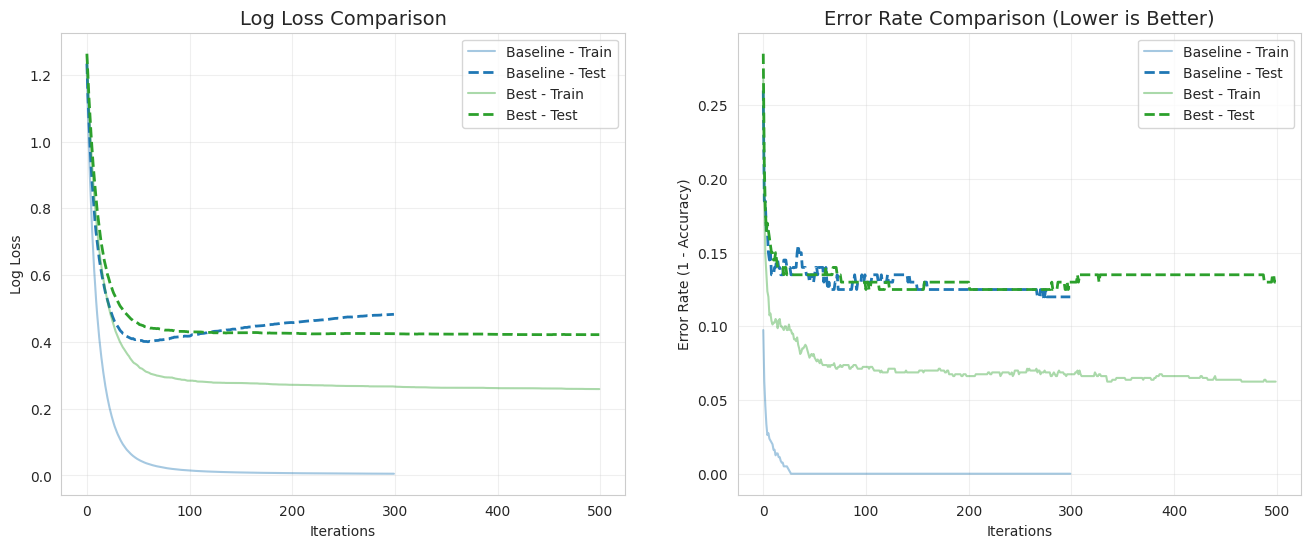

Baseline Validation Accuracy: 0.8800
Best Parameter Validation Accuracy: 0.8700


In [ ]:
# --- Cell: Learning Curves Visualization (Baseline vs Best Parameters) ---
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from xgboost import XGBClassifier
from scipy import sparse

# 1. Prepare Data for Plotting
print("Preparing data for learning curves...")

# Preprocessing: Log1p + Dense
if sparse.issparse(X):
    X_dense = X.toarray()
else:
    X_dense = X
X_log = np.log1p(X_dense)

# Feature selection (fixed k=1000 for visualization)
selector = SelectKBest(f_classif, k=1000)
X_selected = selector.fit_transform(X_log, y_encoded)

# Split into train and validation set (80% train, 20% validation)
X_tr, X_val, y_tr, y_val = train_test_split(
    X_selected, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# 2. Define Models

# Baseline Model: simulate overfitting (high learning rate, deep trees)
model_baseline = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    gamma=0,
    reg_lambda=1.0,
    eval_metric=['mlogloss', 'merror'],
    use_label_encoder=False,
    n_jobs=-1
)

# Best Parameter Model: your specified best parameters
model_best = XGBClassifier(
    learning_rate=0.1,
    n_estimators=500,
    max_depth=4,
    min_child_weight=6,
    gamma=2.0,
    reg_lambda=5.0,
    reg_alpha=1.0,
    subsample=0.7,
    colsample_bytree=0.5,
    eval_metric=['mlogloss', 'merror'],
    use_label_encoder=False,
    n_jobs=-1
)

# 3. Train models and record evaluation metrics
print("Training Baseline model...")
model_baseline.fit(X_tr, y_tr, eval_set=[(X_tr, y_tr), (X_val, y_val)], verbose=False)

print("Training Best Parameter model...")
model_best.fit(X_tr, y_tr, eval_set=[(X_tr, y_tr), (X_val, y_val)], verbose=False)

# 4. Collect evaluation results
results_base = model_baseline.evals_result()
results_best = model_best.evals_result()

# 5. Prepare x-axis (number of iterations)
x_base = range(len(results_base['validation_0']['mlogloss']))
x_best = range(len(results_best['validation_0']['mlogloss']))

# 6. Plot Learning Curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# --- Left Plot: Log Loss ---
ax1.plot(x_base, results_base['validation_0']['mlogloss'], label='Baseline - Train', color='tab:blue', alpha=0.4)
ax1.plot(x_base, results_base['validation_1']['mlogloss'], label='Baseline - Test', color='tab:blue', linestyle='--', linewidth=2)

ax1.plot(x_best, results_best['validation_0']['mlogloss'], label='Best - Train', color='tab:green', alpha=0.4)
ax1.plot(x_best, results_best['validation_1']['mlogloss'], label='Best - Test', color='tab:green', linestyle='--', linewidth=2)

ax1.set_title('Log Loss Comparison', fontsize=14)
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Log Loss')
ax1.legend()
ax1.grid(True, alpha=0.3)

# --- Right Plot: Error Rate ---
ax2.plot(x_base, results_base['validation_0']['merror'], label='Baseline - Train', color='tab:blue', alpha=0.4)
ax2.plot(x_base, results_base['validation_1']['merror'], label='Baseline - Test', color='tab:blue', linestyle='--', linewidth=2)

ax2.plot(x_best, results_best['validation_0']['merror'], label='Best - Train', color='tab:green', alpha=0.4)
ax2.plot(x_best, results_best['validation_1']['merror'], label='Best - Test', color='tab:green', linestyle='--', linewidth=2)

ax2.set_title('Error Rate Comparison (Lower is Better)', fontsize=14)
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Error Rate (1 - Accuracy)')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.show()

# 7. Print final validation accuracy
final_acc_base = 1 - results_base['validation_1']['merror'][-1]
final_acc_best = 1 - results_best['validation_1']['merror'][-1]

print(f"Baseline Validation Accuracy: {final_acc_base:.4f}")
print(f"Best Parameter Validation Accuracy: {final_acc_best:.4f}")


Successfully retrieved test data
Data shape check: (500, 14059)
Label count check: 500
Data count confirmed: 500 samples.

Making predictions...
Test set Accuracy: 0.8400
Total samples in confusion matrix: 500


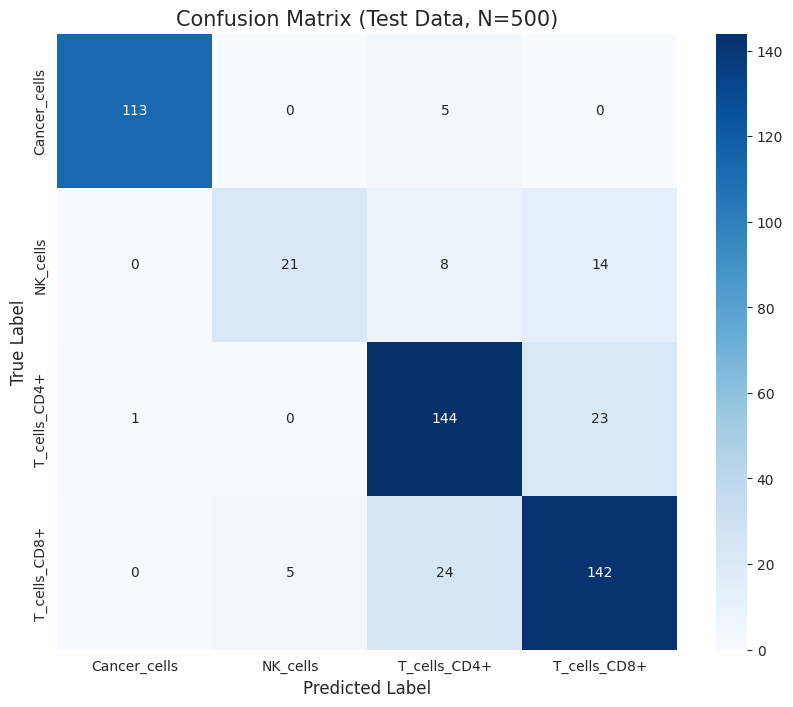


Classification Report:
              precision    recall  f1-score   support

Cancer_cells       0.99      0.96      0.97       118
    NK_cells       0.81      0.49      0.61        43
T_cells_CD4+       0.80      0.86      0.83       168
T_cells_CD8+       0.79      0.83      0.81       171

    accuracy                           0.84       500
   macro avg       0.85      0.78      0.80       500
weighted avg       0.84      0.84      0.84       500



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import numpy as np

# ==========================================
# 1. Retrieve the 500 test samples
# ==========================================
# Assume get_test_data() returns a tuple (X, y)
# If it returns an AnnData object, modify as: X = adata.X, y = adata.obs['cell_type']
try:
    X_test_500, y_test_500 = get_test_data()
    print("Successfully retrieved test data")
except NameError:
    print("Error: get_test_data() function not found. Please make sure it is defined.")
    # Placeholder to prevent code from breaking; ignore in actual run
    raise

# --- Double-check the data size ---
n_samples = X_test_500.shape[0]
print(f"Data shape check: {X_test_500.shape}")
print(f"Label count check: {len(y_test_500)}")

if n_samples != 500:
    print(f"Warning: get_test_data() returned {n_samples} samples, not 500!")
else:
    print("Data count confirmed: 500 samples.")

# ==========================================
# 2. Make predictions using the trained model
# ==========================================
# Ensure clf is your previously trained model instance
print("\nMaking predictions...")
y_pred_500 = clf.predict(X_test_500)

# ==========================================
# 3. Plot the confusion matrix
# ==========================================
# Compute accuracy
acc = accuracy_score(y_test_500, y_pred_500)
print(f"Test set Accuracy: {acc:.4f}")

# Get class names
class_names = clf.le.classes_

# Generate confusion matrix
cm = confusion_matrix(y_test_500, y_pred_500, labels=class_names)

# Double-check total samples in the matrix
print(f"Total samples in confusion matrix: {np.sum(cm)}")  # Should be 500

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',        # 'd' means integer display (actual counts out of 500)
    cmap='Blues',   # Blue color map
    xticklabels=class_names,
    yticklabels=class_names
)
plt.title(f'Confusion Matrix (Test Data, N={np.sum(cm)})', fontsize=15)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()

# (Optional) Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test_500, y_pred_500, target_names=class_names))
